In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sklearn.decomposition
import sys

CURRENT_DIR = os.getcwd()
PARENT_DIR = os.path.dirname(CURRENT_DIR)
sys.path.append(PARENT_DIR)

from FDApy.univariate_functional import UnivariateFunctionalData
from FDApy.irregular_functional import IrregularFunctionalData
from FDApy.multivariate_functional import MultivariateFunctionalData
from FDApy.fpca import UFPCA, MFPCA
from FDApy.local_polynomial import LocalPolynomial
from FDApy.plot import *
from FDApy.utils import *

In [2]:
# Load the data into a Pandas Dataframes
precipitation = pd.read_csv(''.join([CURRENT_DIR, '/canadian_precipitation_monthly.csv']), index_col=0)
temperature = pd.read_csv(''.join([CURRENT_DIR, '/canadian_temperature_daily.csv']), index_col=0)

In [3]:
# Create univariate functional data for the precipitation data
argvals = tuple(pd.factorize(precipitation.columns)[0])
values = np.array(precipitation)
monthlyPrec = UnivariateFunctionalData(argvals, values)

In [4]:
# Create univariate functional data for the daily temperature data.
argvals = tuple(pd.factorize(temperature.columns)[0])
values = np.array(temperature) / 4
dailyTemp = UnivariateFunctionalData(argvals, values)

In [5]:
# Create multivariate functional data for the Canadian weather data.
canadWeather = MultivariateFunctionalData([dailyTemp, monthlyPrec])

In [6]:
# Print example of a UnivariateFunctionalData
dailyTemp

Univariate Functional data objects with 35 observations of 1-dimensional support
argvals:
	0, 1, ... , 364	(365 sampling points)
values:
	array of size (35, 365)

In [7]:
# Print example of a MultivariateFunctionalData
canadWeather

Multivariate Functional data objects with 2 funtions:
- Univariate Functional data objects with 35 observations of 1-dimensional support
argvals:
	0, 1, ... , 364	(365 sampling points)
values:
	array of size (35, 365)
- Univariate Functional data objects with 35 observations of 1-dimensional support
argvals:
	0, 1, ... , 11	(12 sampling points)
values:
	array of size (35, 12)

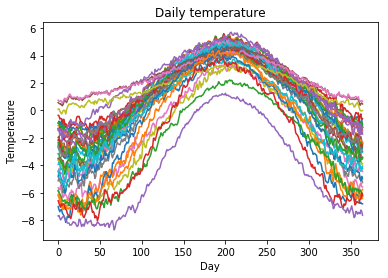

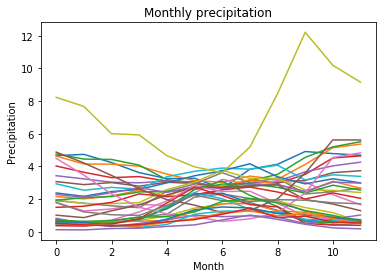

In [8]:
# Plot the MultivariateFunctionalData
fig, ax = plot(canadWeather,
               main=['Daily temperature', 'Monthly precipitation'], 
               xlab=['Day', 'Month'],
               ylab=['Temperature', 'Precipitation'])

In [9]:
# Accessing the attribut of the classes
monthlyPrec.argvals

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)]

In [10]:
# Number of observations for an object
monthlyPrec.nObs()

35

In [11]:
# Mean function of the monthly precipitation
monthlyPrec.mean()

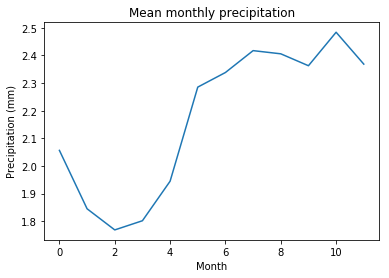

In [12]:
# Plot the mean function of the monthly precipation
fig, ax = plot(monthlyPrec.mean_, main='Mean monthly precipitation', xlab='Month', ylab='Precipitation (mm)')

In [13]:
# Covariance function of the monthly precipitation
monthlyPrec.covariance()

Univariate Functional data objects with 1 observations of 2-dimensional support
argvals:
	0, 1, ... , 11	(12 sampling points)
	0, 1, ... , 11	(12 sampling points)
values:
	array of size (1, 12, 12)

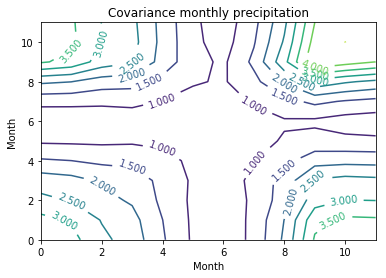

In [14]:
# Plot the covariance function of the monthly precipitation
fig, ax = plot(monthlyPrec.covariance(), main='Covariance monthly precipitation', xlab='Month', ylab='Month')

In [15]:
# Number of sampling points for an object
canadWeather.nObsPoint()

[[365], [12]]

In [16]:
# Mean functions of the canadian weather
canadWeather.mean()

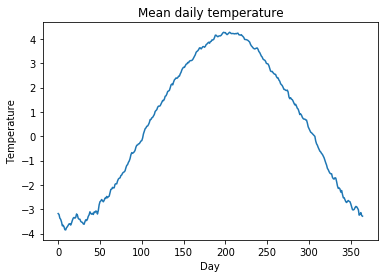

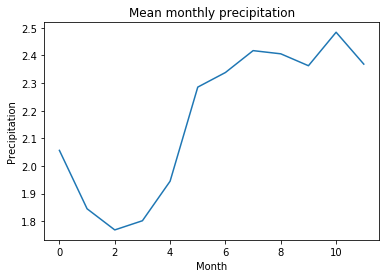

In [17]:
# Plot the mean functions of the multivariate data
fig, ax = plot(canadWeather.mean_, 
               main=['Mean daily temperature', 'Mean monthly precipitation'], 
               xlab=['Day', 'Month'],
               ylab=['Temperature', 'Precipitation'])

In [18]:
# Covariance functions of the canadian weather
canadWeather.covariance()

Multivariate Functional data objects with 2 funtions:
- Univariate Functional data objects with 1 observations of 2-dimensional support
argvals:
	0, 1, ... , 364	(365 sampling points)
	0, 1, ... , 364	(365 sampling points)
values:
	array of size (1, 365, 365)
- Univariate Functional data objects with 1 observations of 2-dimensional support
argvals:
	0, 1, ... , 11	(12 sampling points)
	0, 1, ... , 11	(12 sampling points)
values:
	array of size (1, 12, 12)

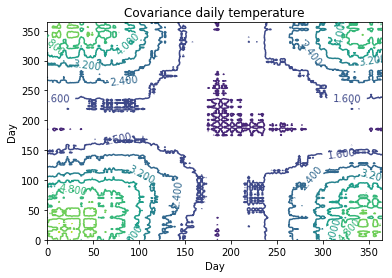

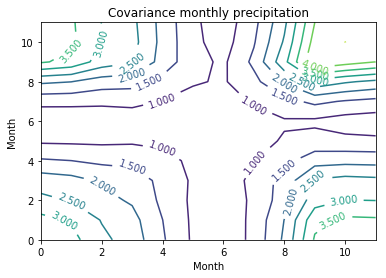

In [19]:
# Plot the covatiance function of the multivariate data
fig, ax = plot(canadWeather.covariance(), 
               main=['Covariance daily temperature', 'Covariance monthly precipitation'], 
               xlab=['Day', 'Month'],
               ylab=['Day', 'Month'])

In [20]:
# Dimension of the domain of observations
dailyTemp.dimension()

1

In [21]:
# Extract observations from UnivariateFunctionalData
dailyTemp[3:6]

Univariate Functional data objects with 3 observations of 1-dimensional support
argvals:
	0, 1, ... , 364	(365 sampling points)
values:
	array of size (3, 365)

In [22]:
# Extract functions from MultivariateFunctionalData
canadWeather[0]

Univariate Functional data objects with 35 observations of 1-dimensional support
argvals:
	0, 1, ... , 364	(365 sampling points)
values:
	array of size (35, 365)

In [23]:
# Convert UnivariateFunctionalData into IrregularFunctionalData.
dailyTemp.asIrregularFunctionalData()

Irregular Functional data objects with 35 observations of 1-dimensional support
argvals:
	Values in 0 ... 364.
values:
	Values in -8.7 ... 5.7.
There are 365 - 365 sampling points per observation.

In [24]:
# Convert UnivariateFunctionalData into MultivariateFunctionalData.
monthlyPrec.asMultivariateFunctionalData()

Multivariate Functional data objects with 1 funtions:
- Univariate Functional data objects with 35 observations of 1-dimensional support
argvals:
	0, 1, ... , 11	(12 sampling points)
values:
	array of size (35, 12)

In [25]:
# Add another function to a MultivariateFunctionalData
#canadWeather.add(dailyTemp)

In [26]:
# Perform a univariate FPCA on dailyTemp.
fpca = UFPCA(n_components=0.99, whiten=True)
fpca.fit(dailyTemp)

In [27]:
# Compute the scores of the dailyTemp data into the eigenfunctions basis.
dailyTemp_proj = fpca.transform(dailyTemp)

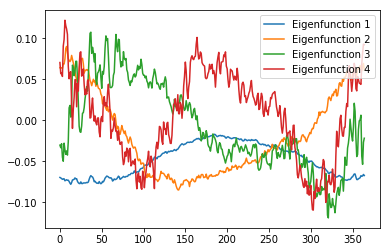

In [28]:
# Plot the results of the FPCA
for idx, eigenfunction in enumerate(fpca.eigenfunctions):
    plt.plot(eigenfunction, label=' '.join(['Eigenfunction', str(idx+1)]))
plt.legend()
plt.show()

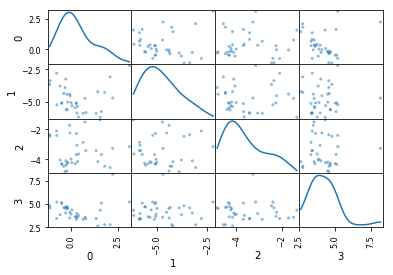

In [29]:
# Plot the projection of the data onto the eigenfunctions
pd.plotting.scatter_matrix(pd.DataFrame(dailyTemp_proj), diagonal='kde')
plt.show()

In [30]:
# Test if the reconstruction is good.
dailyTemp_reconst = fpca.inverse_transform(dailyTemp_proj)

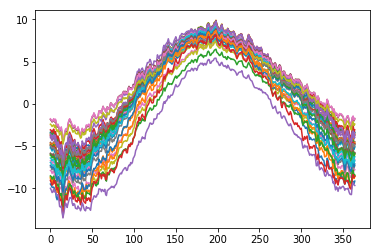

In [31]:
# Plot the reconstructed curves
fig, ax = plot(dailyTemp_reconst)
plt.show()

In [32]:
# Perform a univariate FPCA on monthlyPrec.
fpca = UFPCA(n_components=0.99, whiten=True)
fpca.fit(monthlyPrec)

In [33]:
# Compute the scores of the monthlyPrec data into the eigenfunctions basis.
monthlyPrec_proj = fpca.transform(monthlyPrec)

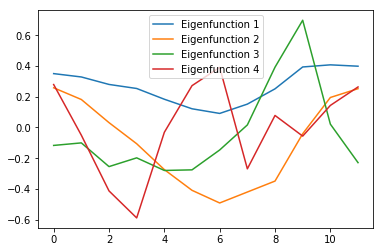

In [34]:
# Plot the results of the FPCA
for idx, eigenfunction in enumerate(fpca.eigenfunctions):
    plt.plot(eigenfunction, label=' '.join(['Eigenfunction', str(idx+1)]))
plt.legend()
plt.show()

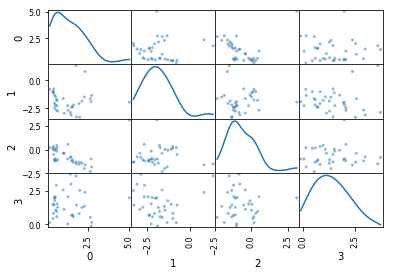

In [35]:
# Plot the projection of the data onto the eigenfunctions
pd.plotting.scatter_matrix(pd.DataFrame(monthlyPrec_proj), diagonal='kde')
plt.show()

In [36]:
# Test if the reconstruction is good.
monthlyPrec_reconst = fpca.inverse_transform(monthlyPrec_proj)

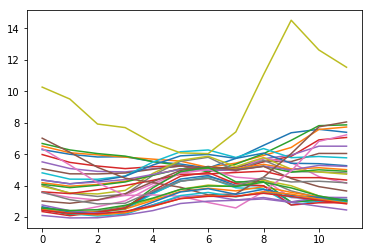

In [37]:
# Plot the reconstructed curves
fig, ax = plot(monthlyPrec_reconst)
plt.show()

In [38]:
# Perform multivariate FPCA
mfpca = MFPCA(n_components=0.99, whiten=False)
mfpca.fit(canadWeather)

In [39]:
# Compute the scores of the canadWeather data into the multivariate eigenfunctions basis.
canadWeather_proj = mfpca.transform(canadWeather)

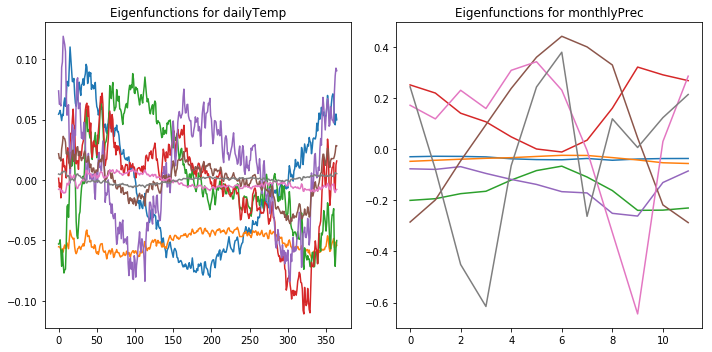

In [40]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(mfpca.basis_[0])
plt.title('Eigenfunctions for dailyTemp')

plt.subplot(1, 2, 2)
plt.plot(mfpca.basis_[1])
plt.title('Eigenfunctions for monthlyPrec')

plt.tight_layout()
plt.show()

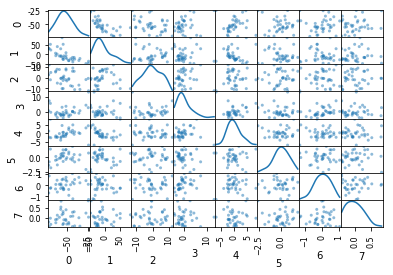

In [41]:
# Plot the projection of the data onto the eigenfunctions
pd.plotting.scatter_matrix(pd.DataFrame(canadWeather_proj), diagonal='kde')
plt.show()

In [42]:
# Test if the reconstruction is good.
canadWheather_reconst = mfpca.inverse_transform(canadWeather_proj)

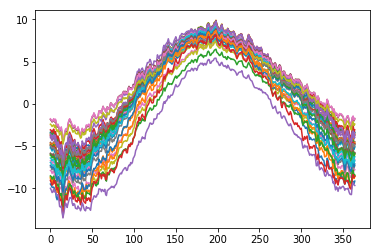

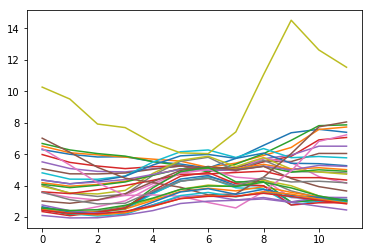

In [43]:
# Plot the reconstructed curves
fig, ax = plot(canadWheather_reconst)
plt.show()

In [44]:
# Smooth the data
points = tuple(i / 10 for i in range(min(dailyTemp.argvals[0]), 10*(max(dailyTemp.argvals[0]) + 1), 1))
dailyTempSmooth = dailyTemp.smooth(points, bandwith=5)

0 fait
1 fait
2 fait
3 fait
4 fait
5 fait
6 fait
7 fait
8 fait
9 fait
10 fait
11 fait
12 fait
13 fait
14 fait
15 fait
16 fait
17 fait
18 fait
19 fait
20 fait
21 fait
22 fait
23 fait
24 fait
25 fait
26 fait
27 fait
28 fait
29 fait
30 fait
31 fait
32 fait
33 fait
34 fait
35 fait
36 fait
37 fait
38 fait
39 fait
40 fait
41 fait
42 fait
43 fait
44 fait
45 fait
46 fait
47 fait
48 fait
49 fait
50 fait
51 fait
52 fait
53 fait
54 fait
55 fait
56 fait
57 fait
58 fait
59 fait
60 fait
61 fait
62 fait
63 fait
64 fait
65 fait
66 fait
67 fait
68 fait
69 fait
70 fait
71 fait
72 fait
73 fait
74 fait
75 fait
76 fait
77 fait
78 fait
79 fait
80 fait
81 fait
82 fait
83 fait
84 fait
85 fait
86 fait
87 fait
88 fait
89 fait
90 fait
91 fait
92 fait
93 fait
94 fait
95 fait
96 fait
97 fait
98 fait
99 fait
100 fait
101 fait
102 fait
103 fait
104 fait
105 fait
106 fait
107 fait
108 fait
109 fait
110 fait
111 fait
112 fait
113 fait
114 fait
115 fait
116 fait
117 fait
118 fait
119 fait
120 fait
121 fait
122 fait
123

62.7 fait
62.8 fait
62.9 fait
63.0 fait
63.1 fait
63.2 fait
63.3 fait
63.4 fait
63.5 fait
63.6 fait
63.7 fait
63.8 fait
63.9 fait
64.0 fait
64.1 fait
64.2 fait
64.3 fait
64.4 fait
64.5 fait
64.6 fait
64.7 fait
64.8 fait
64.9 fait
65.0 fait
65.1 fait
65.2 fait
65.3 fait
65.4 fait
65.5 fait
65.6 fait
65.7 fait
65.8 fait
65.9 fait
66.0 fait
66.1 fait
66.2 fait
66.3 fait
66.4 fait
66.5 fait
66.6 fait
66.7 fait
66.8 fait
66.9 fait
67.0 fait
67.1 fait
67.2 fait
67.3 fait
67.4 fait
67.5 fait
67.6 fait
67.7 fait
67.8 fait
67.9 fait
68.0 fait
68.1 fait
68.2 fait
68.3 fait
68.4 fait
68.5 fait
68.6 fait
68.7 fait
68.8 fait
68.9 fait
69.0 fait
69.1 fait
69.2 fait
69.3 fait
69.4 fait
69.5 fait
69.6 fait
69.7 fait
69.8 fait
69.9 fait
70.0 fait
70.1 fait
70.2 fait
70.3 fait
70.4 fait
70.5 fait
70.6 fait
70.7 fait
70.8 fait
70.9 fait
71.0 fait
71.1 fait
71.2 fait
71.3 fait
71.4 fait
71.5 fait
71.6 fait
71.7 fait
71.8 fait
71.9 fait
72.0 fait
72.1 fait
72.2 fait
72.3 fait
72.4 fait
72.5 fait
72.6 fait


154.4 fait
154.5 fait
154.6 fait
154.7 fait
154.8 fait
154.9 fait
155.0 fait
155.1 fait
155.2 fait
155.3 fait
155.4 fait
155.5 fait
155.6 fait
155.7 fait
155.8 fait
155.9 fait
156.0 fait
156.1 fait
156.2 fait
156.3 fait
156.4 fait
156.5 fait
156.6 fait
156.7 fait
156.8 fait
156.9 fait
157.0 fait
157.1 fait
157.2 fait
157.3 fait
157.4 fait
157.5 fait
157.6 fait
157.7 fait
157.8 fait
157.9 fait
158.0 fait
158.1 fait
158.2 fait
158.3 fait
158.4 fait
158.5 fait
158.6 fait
158.7 fait
158.8 fait
158.9 fait
159.0 fait
159.1 fait
159.2 fait
159.3 fait
159.4 fait
159.5 fait
159.6 fait
159.7 fait
159.8 fait
159.9 fait
160.0 fait
160.1 fait
160.2 fait
160.3 fait
160.4 fait
160.5 fait
160.6 fait
160.7 fait
160.8 fait
160.9 fait
161.0 fait
161.1 fait
161.2 fait
161.3 fait
161.4 fait
161.5 fait
161.6 fait
161.7 fait
161.8 fait
161.9 fait
162.0 fait
162.1 fait
162.2 fait
162.3 fait
162.4 fait
162.5 fait
162.6 fait
162.7 fait
162.8 fait
162.9 fait
163.0 fait
163.1 fait
163.2 fait
163.3 fait
163.4 fait

230.4 fait
230.5 fait
230.6 fait
230.7 fait
230.8 fait
230.9 fait
231.0 fait
231.1 fait
231.2 fait
231.3 fait
231.4 fait
231.5 fait
231.6 fait
231.7 fait
231.8 fait
231.9 fait
232.0 fait
232.1 fait
232.2 fait
232.3 fait
232.4 fait
232.5 fait
232.6 fait
232.7 fait
232.8 fait
232.9 fait
233.0 fait
233.1 fait
233.2 fait
233.3 fait
233.4 fait
233.5 fait
233.6 fait
233.7 fait
233.8 fait
233.9 fait
234.0 fait
234.1 fait
234.2 fait
234.3 fait
234.4 fait
234.5 fait
234.6 fait
234.7 fait
234.8 fait
234.9 fait
235.0 fait
235.1 fait
235.2 fait
235.3 fait
235.4 fait
235.5 fait
235.6 fait
235.7 fait
235.8 fait
235.9 fait
236.0 fait
236.1 fait
236.2 fait
236.3 fait
236.4 fait
236.5 fait
236.6 fait
236.7 fait
236.8 fait
236.9 fait
237.0 fait
237.1 fait
237.2 fait
237.3 fait
237.4 fait
237.5 fait
237.6 fait
237.7 fait
237.8 fait
237.9 fait
238.0 fait
238.1 fait
238.2 fait
238.3 fait
238.4 fait
238.5 fait
238.6 fait
238.7 fait
238.8 fait
238.9 fait
239.0 fait
239.1 fait
239.2 fait
239.3 fait
239.4 fait

305.8 fait
305.9 fait
306.0 fait
306.1 fait
306.2 fait
306.3 fait
306.4 fait
306.5 fait
306.6 fait
306.7 fait
306.8 fait
306.9 fait
307.0 fait
307.1 fait
307.2 fait
307.3 fait
307.4 fait
307.5 fait
307.6 fait
307.7 fait
307.8 fait
307.9 fait
308.0 fait
308.1 fait
308.2 fait
308.3 fait
308.4 fait
308.5 fait
308.6 fait
308.7 fait
308.8 fait
308.9 fait
309.0 fait
309.1 fait
309.2 fait
309.3 fait
309.4 fait
309.5 fait
309.6 fait
309.7 fait
309.8 fait
309.9 fait
310.0 fait
310.1 fait
310.2 fait
310.3 fait
310.4 fait
310.5 fait
310.6 fait
310.7 fait
310.8 fait
310.9 fait
311.0 fait
311.1 fait
311.2 fait
311.3 fait
311.4 fait
311.5 fait
311.6 fait
311.7 fait
311.8 fait
311.9 fait
312.0 fait
312.1 fait
312.2 fait
312.3 fait
312.4 fait
312.5 fait
312.6 fait
312.7 fait
312.8 fait
312.9 fait
313.0 fait
313.1 fait
313.2 fait
313.3 fait
313.4 fait
313.5 fait
313.6 fait
313.7 fait
313.8 fait
313.9 fait
314.0 fait
314.1 fait
314.2 fait
314.3 fait
314.4 fait
314.5 fait
314.6 fait
314.7 fait
314.8 fait

290 fait
291 fait
292 fait
293 fait
294 fait
295 fait
296 fait
297 fait
298 fait
299 fait
300 fait
301 fait
302 fait
303 fait
304 fait
305 fait
306 fait
307 fait
308 fait
309 fait
310 fait
311 fait
312 fait
313 fait
314 fait
315 fait
316 fait
317 fait
318 fait
319 fait
320 fait
321 fait
322 fait
323 fait
324 fait
325 fait
326 fait
327 fait
328 fait
329 fait
330 fait
331 fait
332 fait
333 fait
334 fait
335 fait
336 fait
337 fait
338 fait
339 fait
340 fait
341 fait
342 fait
343 fait
344 fait
345 fait
346 fait
347 fait
348 fait
349 fait
350 fait
351 fait
352 fait
353 fait
354 fait
355 fait
356 fait
357 fait
358 fait
359 fait
360 fait
361 fait
362 fait
363 fait
364 fait
0.0 fait
0.1 fait
0.2 fait
0.3 fait
0.4 fait
0.5 fait
0.6 fait
0.7 fait
0.8 fait
0.9 fait
1.0 fait
1.1 fait
1.2 fait
1.3 fait
1.4 fait
1.5 fait
1.6 fait
1.7 fait
1.8 fait
1.9 fait
2.0 fait
2.1 fait
2.2 fait
2.3 fait
2.4 fait
2.5 fait
2.6 fait
2.7 fait
2.8 fait
2.9 fait
3.0 fait
3.1 fait
3.2 fait
3.3 fait
3.4 fait
3.5 fait
3

89.5 fait
89.6 fait
89.7 fait
89.8 fait
89.9 fait
90.0 fait
90.1 fait
90.2 fait
90.3 fait
90.4 fait
90.5 fait
90.6 fait
90.7 fait
90.8 fait
90.9 fait
91.0 fait
91.1 fait
91.2 fait
91.3 fait
91.4 fait
91.5 fait
91.6 fait
91.7 fait
91.8 fait
91.9 fait
92.0 fait
92.1 fait
92.2 fait
92.3 fait
92.4 fait
92.5 fait
92.6 fait
92.7 fait
92.8 fait
92.9 fait
93.0 fait
93.1 fait
93.2 fait
93.3 fait
93.4 fait
93.5 fait
93.6 fait
93.7 fait
93.8 fait
93.9 fait
94.0 fait
94.1 fait
94.2 fait
94.3 fait
94.4 fait
94.5 fait
94.6 fait
94.7 fait
94.8 fait
94.9 fait
95.0 fait
95.1 fait
95.2 fait
95.3 fait
95.4 fait
95.5 fait
95.6 fait
95.7 fait
95.8 fait
95.9 fait
96.0 fait
96.1 fait
96.2 fait
96.3 fait
96.4 fait
96.5 fait
96.6 fait
96.7 fait
96.8 fait
96.9 fait
97.0 fait
97.1 fait
97.2 fait
97.3 fait
97.4 fait
97.5 fait
97.6 fait
97.7 fait
97.8 fait
97.9 fait
98.0 fait
98.1 fait
98.2 fait
98.3 fait
98.4 fait
98.5 fait
98.6 fait
98.7 fait
98.8 fait
98.9 fait
99.0 fait
99.1 fait
99.2 fait
99.3 fait
99.4 fait


183.6 fait
183.7 fait
183.8 fait
183.9 fait
184.0 fait
184.1 fait
184.2 fait
184.3 fait
184.4 fait
184.5 fait
184.6 fait
184.7 fait
184.8 fait
184.9 fait
185.0 fait
185.1 fait
185.2 fait
185.3 fait
185.4 fait
185.5 fait
185.6 fait
185.7 fait
185.8 fait
185.9 fait
186.0 fait
186.1 fait
186.2 fait
186.3 fait
186.4 fait
186.5 fait
186.6 fait
186.7 fait
186.8 fait
186.9 fait
187.0 fait
187.1 fait
187.2 fait
187.3 fait
187.4 fait
187.5 fait
187.6 fait
187.7 fait
187.8 fait
187.9 fait
188.0 fait
188.1 fait
188.2 fait
188.3 fait
188.4 fait
188.5 fait
188.6 fait
188.7 fait
188.8 fait
188.9 fait
189.0 fait
189.1 fait
189.2 fait
189.3 fait
189.4 fait
189.5 fait
189.6 fait
189.7 fait
189.8 fait
189.9 fait
190.0 fait
190.1 fait
190.2 fait
190.3 fait
190.4 fait
190.5 fait
190.6 fait
190.7 fait
190.8 fait
190.9 fait
191.0 fait
191.1 fait
191.2 fait
191.3 fait
191.4 fait
191.5 fait
191.6 fait
191.7 fait
191.8 fait
191.9 fait
192.0 fait
192.1 fait
192.2 fait
192.3 fait
192.4 fait
192.5 fait
192.6 fait

259.0 fait
259.1 fait
259.2 fait
259.3 fait
259.4 fait
259.5 fait
259.6 fait
259.7 fait
259.8 fait
259.9 fait
260.0 fait
260.1 fait
260.2 fait
260.3 fait
260.4 fait
260.5 fait
260.6 fait
260.7 fait
260.8 fait
260.9 fait
261.0 fait
261.1 fait
261.2 fait
261.3 fait
261.4 fait
261.5 fait
261.6 fait
261.7 fait
261.8 fait
261.9 fait
262.0 fait
262.1 fait
262.2 fait
262.3 fait
262.4 fait
262.5 fait
262.6 fait
262.7 fait
262.8 fait
262.9 fait
263.0 fait
263.1 fait
263.2 fait
263.3 fait
263.4 fait
263.5 fait
263.6 fait
263.7 fait
263.8 fait
263.9 fait
264.0 fait
264.1 fait
264.2 fait
264.3 fait
264.4 fait
264.5 fait
264.6 fait
264.7 fait
264.8 fait
264.9 fait
265.0 fait
265.1 fait
265.2 fait
265.3 fait
265.4 fait
265.5 fait
265.6 fait
265.7 fait
265.8 fait
265.9 fait
266.0 fait
266.1 fait
266.2 fait
266.3 fait
266.4 fait
266.5 fait
266.6 fait
266.7 fait
266.8 fait
266.9 fait
267.0 fait
267.1 fait
267.2 fait
267.3 fait
267.4 fait
267.5 fait
267.6 fait
267.7 fait
267.8 fait
267.9 fait
268.0 fait

337.4 fait
337.5 fait
337.6 fait
337.7 fait
337.8 fait
337.9 fait
338.0 fait
338.1 fait
338.2 fait
338.3 fait
338.4 fait
338.5 fait
338.6 fait
338.7 fait
338.8 fait
338.9 fait
339.0 fait
339.1 fait
339.2 fait
339.3 fait
339.4 fait
339.5 fait
339.6 fait
339.7 fait
339.8 fait
339.9 fait
340.0 fait
340.1 fait
340.2 fait
340.3 fait
340.4 fait
340.5 fait
340.6 fait
340.7 fait
340.8 fait
340.9 fait
341.0 fait
341.1 fait
341.2 fait
341.3 fait
341.4 fait
341.5 fait
341.6 fait
341.7 fait
341.8 fait
341.9 fait
342.0 fait
342.1 fait
342.2 fait
342.3 fait
342.4 fait
342.5 fait
342.6 fait
342.7 fait
342.8 fait
342.9 fait
343.0 fait
343.1 fait
343.2 fait
343.3 fait
343.4 fait
343.5 fait
343.6 fait
343.7 fait
343.8 fait
343.9 fait
344.0 fait
344.1 fait
344.2 fait
344.3 fait
344.4 fait
344.5 fait
344.6 fait
344.7 fait
344.8 fait
344.9 fait
345.0 fait
345.1 fait
345.2 fait
345.3 fait
345.4 fait
345.5 fait
345.6 fait
345.7 fait
345.8 fait
345.9 fait
346.0 fait
346.1 fait
346.2 fait
346.3 fait
346.4 fait

30.2 fait
30.3 fait
30.4 fait
30.5 fait
30.6 fait
30.7 fait
30.8 fait
30.9 fait
31.0 fait
31.1 fait
31.2 fait
31.3 fait
31.4 fait
31.5 fait
31.6 fait
31.7 fait
31.8 fait
31.9 fait
32.0 fait
32.1 fait
32.2 fait
32.3 fait
32.4 fait
32.5 fait
32.6 fait
32.7 fait
32.8 fait
32.9 fait
33.0 fait
33.1 fait
33.2 fait
33.3 fait
33.4 fait
33.5 fait
33.6 fait
33.7 fait
33.8 fait
33.9 fait
34.0 fait
34.1 fait
34.2 fait
34.3 fait
34.4 fait
34.5 fait
34.6 fait
34.7 fait
34.8 fait
34.9 fait
35.0 fait
35.1 fait
35.2 fait
35.3 fait
35.4 fait
35.5 fait
35.6 fait
35.7 fait
35.8 fait
35.9 fait
36.0 fait
36.1 fait
36.2 fait
36.3 fait
36.4 fait
36.5 fait
36.6 fait
36.7 fait
36.8 fait
36.9 fait
37.0 fait
37.1 fait
37.2 fait
37.3 fait
37.4 fait
37.5 fait
37.6 fait
37.7 fait
37.8 fait
37.9 fait
38.0 fait
38.1 fait
38.2 fait
38.3 fait
38.4 fait
38.5 fait
38.6 fait
38.7 fait
38.8 fait
38.9 fait
39.0 fait
39.1 fait
39.2 fait
39.3 fait
39.4 fait
39.5 fait
39.6 fait
39.7 fait
39.8 fait
39.9 fait
40.0 fait
40.1 fait


124.4 fait
124.5 fait
124.6 fait
124.7 fait
124.8 fait
124.9 fait
125.0 fait
125.1 fait
125.2 fait
125.3 fait
125.4 fait
125.5 fait
125.6 fait
125.7 fait
125.8 fait
125.9 fait
126.0 fait
126.1 fait
126.2 fait
126.3 fait
126.4 fait
126.5 fait
126.6 fait
126.7 fait
126.8 fait
126.9 fait
127.0 fait
127.1 fait
127.2 fait
127.3 fait
127.4 fait
127.5 fait
127.6 fait
127.7 fait
127.8 fait
127.9 fait
128.0 fait
128.1 fait
128.2 fait
128.3 fait
128.4 fait
128.5 fait
128.6 fait
128.7 fait
128.8 fait
128.9 fait
129.0 fait
129.1 fait
129.2 fait
129.3 fait
129.4 fait
129.5 fait
129.6 fait
129.7 fait
129.8 fait
129.9 fait
130.0 fait
130.1 fait
130.2 fait
130.3 fait
130.4 fait
130.5 fait
130.6 fait
130.7 fait
130.8 fait
130.9 fait
131.0 fait
131.1 fait
131.2 fait
131.3 fait
131.4 fait
131.5 fait
131.6 fait
131.7 fait
131.8 fait
131.9 fait
132.0 fait
132.1 fait
132.2 fait
132.3 fait
132.4 fait
132.5 fait
132.6 fait
132.7 fait
132.8 fait
132.9 fait
133.0 fait
133.1 fait
133.2 fait
133.3 fait
133.4 fait

202.8 fait
202.9 fait
203.0 fait
203.1 fait
203.2 fait
203.3 fait
203.4 fait
203.5 fait
203.6 fait
203.7 fait
203.8 fait
203.9 fait
204.0 fait
204.1 fait
204.2 fait
204.3 fait
204.4 fait
204.5 fait
204.6 fait
204.7 fait
204.8 fait
204.9 fait
205.0 fait
205.1 fait
205.2 fait
205.3 fait
205.4 fait
205.5 fait
205.6 fait
205.7 fait
205.8 fait
205.9 fait
206.0 fait
206.1 fait
206.2 fait
206.3 fait
206.4 fait
206.5 fait
206.6 fait
206.7 fait
206.8 fait
206.9 fait
207.0 fait
207.1 fait
207.2 fait
207.3 fait
207.4 fait
207.5 fait
207.6 fait
207.7 fait
207.8 fait
207.9 fait
208.0 fait
208.1 fait
208.2 fait
208.3 fait
208.4 fait
208.5 fait
208.6 fait
208.7 fait
208.8 fait
208.9 fait
209.0 fait
209.1 fait
209.2 fait
209.3 fait
209.4 fait
209.5 fait
209.6 fait
209.7 fait
209.8 fait
209.9 fait
210.0 fait
210.1 fait
210.2 fait
210.3 fait
210.4 fait
210.5 fait
210.6 fait
210.7 fait
210.8 fait
210.9 fait
211.0 fait
211.1 fait
211.2 fait
211.3 fait
211.4 fait
211.5 fait
211.6 fait
211.7 fait
211.8 fait

282.2 fait
282.3 fait
282.4 fait
282.5 fait
282.6 fait
282.7 fait
282.8 fait
282.9 fait
283.0 fait
283.1 fait
283.2 fait
283.3 fait
283.4 fait
283.5 fait
283.6 fait
283.7 fait
283.8 fait
283.9 fait
284.0 fait
284.1 fait
284.2 fait
284.3 fait
284.4 fait
284.5 fait
284.6 fait
284.7 fait
284.8 fait
284.9 fait
285.0 fait
285.1 fait
285.2 fait
285.3 fait
285.4 fait
285.5 fait
285.6 fait
285.7 fait
285.8 fait
285.9 fait
286.0 fait
286.1 fait
286.2 fait
286.3 fait
286.4 fait
286.5 fait
286.6 fait
286.7 fait
286.8 fait
286.9 fait
287.0 fait
287.1 fait
287.2 fait
287.3 fait
287.4 fait
287.5 fait
287.6 fait
287.7 fait
287.8 fait
287.9 fait
288.0 fait
288.1 fait
288.2 fait
288.3 fait
288.4 fait
288.5 fait
288.6 fait
288.7 fait
288.8 fait
288.9 fait
289.0 fait
289.1 fait
289.2 fait
289.3 fait
289.4 fait
289.5 fait
289.6 fait
289.7 fait
289.8 fait
289.9 fait
290.0 fait
290.1 fait
290.2 fait
290.3 fait
290.4 fait
290.5 fait
290.6 fait
290.7 fait
290.8 fait
290.9 fait
291.0 fait
291.1 fait
291.2 fait

362.0 fait
362.1 fait
362.2 fait
362.3 fait
362.4 fait
362.5 fait
362.6 fait
362.7 fait
362.8 fait
362.9 fait
363.0 fait
363.1 fait
363.2 fait
363.3 fait
363.4 fait
363.5 fait
363.6 fait
363.7 fait
363.8 fait
363.9 fait
364.0 fait
364.1 fait
364.2 fait
364.3 fait
364.4 fait
364.5 fait
364.6 fait
364.7 fait
364.8 fait
364.9 fait
0 fait
1 fait
2 fait
3 fait
4 fait
5 fait
6 fait
7 fait
8 fait
9 fait
10 fait
11 fait
12 fait
13 fait
14 fait
15 fait
16 fait
17 fait
18 fait
19 fait
20 fait
21 fait
22 fait
23 fait
24 fait
25 fait
26 fait
27 fait
28 fait
29 fait
30 fait
31 fait
32 fait
33 fait
34 fait
35 fait
36 fait
37 fait
38 fait
39 fait
40 fait
41 fait
42 fait
43 fait
44 fait
45 fait
46 fait
47 fait
48 fait
49 fait
50 fait
51 fait
52 fait
53 fait
54 fait
55 fait
56 fait
57 fait
58 fait
59 fait
60 fait
61 fait
62 fait
63 fait
64 fait
65 fait
66 fait
67 fait
68 fait
69 fait
70 fait
71 fait
72 fait
73 fait
74 fait
75 fait
76 fait
77 fait
78 fait
79 fait
80 fait
81 fait
82 fait
83 fait
84 fait


54.8 fait
54.9 fait
55.0 fait
55.1 fait
55.2 fait
55.3 fait
55.4 fait
55.5 fait
55.6 fait
55.7 fait
55.8 fait
55.9 fait
56.0 fait
56.1 fait
56.2 fait
56.3 fait
56.4 fait
56.5 fait
56.6 fait
56.7 fait
56.8 fait
56.9 fait
57.0 fait
57.1 fait
57.2 fait
57.3 fait
57.4 fait
57.5 fait
57.6 fait
57.7 fait
57.8 fait
57.9 fait
58.0 fait
58.1 fait
58.2 fait
58.3 fait
58.4 fait
58.5 fait
58.6 fait
58.7 fait
58.8 fait
58.9 fait
59.0 fait
59.1 fait
59.2 fait
59.3 fait
59.4 fait
59.5 fait
59.6 fait
59.7 fait
59.8 fait
59.9 fait
60.0 fait
60.1 fait
60.2 fait
60.3 fait
60.4 fait
60.5 fait
60.6 fait
60.7 fait
60.8 fait
60.9 fait
61.0 fait
61.1 fait
61.2 fait
61.3 fait
61.4 fait
61.5 fait
61.6 fait
61.7 fait
61.8 fait
61.9 fait
62.0 fait
62.1 fait
62.2 fait
62.3 fait
62.4 fait
62.5 fait
62.6 fait
62.7 fait
62.8 fait
62.9 fait
63.0 fait
63.1 fait
63.2 fait
63.3 fait
63.4 fait
63.5 fait
63.6 fait
63.7 fait
63.8 fait
63.9 fait
64.0 fait
64.1 fait
64.2 fait
64.3 fait
64.4 fait
64.5 fait
64.6 fait
64.7 fait


148.1 fait
148.2 fait
148.3 fait
148.4 fait
148.5 fait
148.6 fait
148.7 fait
148.8 fait
148.9 fait
149.0 fait
149.1 fait
149.2 fait
149.3 fait
149.4 fait
149.5 fait
149.6 fait
149.7 fait
149.8 fait
149.9 fait
150.0 fait
150.1 fait
150.2 fait
150.3 fait
150.4 fait
150.5 fait
150.6 fait
150.7 fait
150.8 fait
150.9 fait
151.0 fait
151.1 fait
151.2 fait
151.3 fait
151.4 fait
151.5 fait
151.6 fait
151.7 fait
151.8 fait
151.9 fait
152.0 fait
152.1 fait
152.2 fait
152.3 fait
152.4 fait
152.5 fait
152.6 fait
152.7 fait
152.8 fait
152.9 fait
153.0 fait
153.1 fait
153.2 fait
153.3 fait
153.4 fait
153.5 fait
153.6 fait
153.7 fait
153.8 fait
153.9 fait
154.0 fait
154.1 fait
154.2 fait
154.3 fait
154.4 fait
154.5 fait
154.6 fait
154.7 fait
154.8 fait
154.9 fait
155.0 fait
155.1 fait
155.2 fait
155.3 fait
155.4 fait
155.5 fait
155.6 fait
155.7 fait
155.8 fait
155.9 fait
156.0 fait
156.1 fait
156.2 fait
156.3 fait
156.4 fait
156.5 fait
156.6 fait
156.7 fait
156.8 fait
156.9 fait
157.0 fait
157.1 fait

239.9 fait
240.0 fait
240.1 fait
240.2 fait
240.3 fait
240.4 fait
240.5 fait
240.6 fait
240.7 fait
240.8 fait
240.9 fait
241.0 fait
241.1 fait
241.2 fait
241.3 fait
241.4 fait
241.5 fait
241.6 fait
241.7 fait
241.8 fait
241.9 fait
242.0 fait
242.1 fait
242.2 fait
242.3 fait
242.4 fait
242.5 fait
242.6 fait
242.7 fait
242.8 fait
242.9 fait
243.0 fait
243.1 fait
243.2 fait
243.3 fait
243.4 fait
243.5 fait
243.6 fait
243.7 fait
243.8 fait
243.9 fait
244.0 fait
244.1 fait
244.2 fait
244.3 fait
244.4 fait
244.5 fait
244.6 fait
244.7 fait
244.8 fait
244.9 fait
245.0 fait
245.1 fait
245.2 fait
245.3 fait
245.4 fait
245.5 fait
245.6 fait
245.7 fait
245.8 fait
245.9 fait
246.0 fait
246.1 fait
246.2 fait
246.3 fait
246.4 fait
246.5 fait
246.6 fait
246.7 fait
246.8 fait
246.9 fait
247.0 fait
247.1 fait
247.2 fait
247.3 fait
247.4 fait
247.5 fait
247.6 fait
247.7 fait
247.8 fait
247.9 fait
248.0 fait
248.1 fait
248.2 fait
248.3 fait
248.4 fait
248.5 fait
248.6 fait
248.7 fait
248.8 fait
248.9 fait

321.8 fait
321.9 fait
322.0 fait
322.1 fait
322.2 fait
322.3 fait
322.4 fait
322.5 fait
322.6 fait
322.7 fait
322.8 fait
322.9 fait
323.0 fait
323.1 fait
323.2 fait
323.3 fait
323.4 fait
323.5 fait
323.6 fait
323.7 fait
323.8 fait
323.9 fait
324.0 fait
324.1 fait
324.2 fait
324.3 fait
324.4 fait
324.5 fait
324.6 fait
324.7 fait
324.8 fait
324.9 fait
325.0 fait
325.1 fait
325.2 fait
325.3 fait
325.4 fait
325.5 fait
325.6 fait
325.7 fait
325.8 fait
325.9 fait
326.0 fait
326.1 fait
326.2 fait
326.3 fait
326.4 fait
326.5 fait
326.6 fait
326.7 fait
326.8 fait
326.9 fait
327.0 fait
327.1 fait
327.2 fait
327.3 fait
327.4 fait
327.5 fait
327.6 fait
327.7 fait
327.8 fait
327.9 fait
328.0 fait
328.1 fait
328.2 fait
328.3 fait
328.4 fait
328.5 fait
328.6 fait
328.7 fait
328.8 fait
328.9 fait
329.0 fait
329.1 fait
329.2 fait
329.3 fait
329.4 fait
329.5 fait
329.6 fait
329.7 fait
329.8 fait
329.9 fait
330.0 fait
330.1 fait
330.2 fait
330.3 fait
330.4 fait
330.5 fait
330.6 fait
330.7 fait
330.8 fait

17.1 fait
17.2 fait
17.3 fait
17.4 fait
17.5 fait
17.6 fait
17.7 fait
17.8 fait
17.9 fait
18.0 fait
18.1 fait
18.2 fait
18.3 fait
18.4 fait
18.5 fait
18.6 fait
18.7 fait
18.8 fait
18.9 fait
19.0 fait
19.1 fait
19.2 fait
19.3 fait
19.4 fait
19.5 fait
19.6 fait
19.7 fait
19.8 fait
19.9 fait
20.0 fait
20.1 fait
20.2 fait
20.3 fait
20.4 fait
20.5 fait
20.6 fait
20.7 fait
20.8 fait
20.9 fait
21.0 fait
21.1 fait
21.2 fait
21.3 fait
21.4 fait
21.5 fait
21.6 fait
21.7 fait
21.8 fait
21.9 fait
22.0 fait
22.1 fait
22.2 fait
22.3 fait
22.4 fait
22.5 fait
22.6 fait
22.7 fait
22.8 fait
22.9 fait
23.0 fait
23.1 fait
23.2 fait
23.3 fait
23.4 fait
23.5 fait
23.6 fait
23.7 fait
23.8 fait
23.9 fait
24.0 fait
24.1 fait
24.2 fait
24.3 fait
24.4 fait
24.5 fait
24.6 fait
24.7 fait
24.8 fait
24.9 fait
25.0 fait
25.1 fait
25.2 fait
25.3 fait
25.4 fait
25.5 fait
25.6 fait
25.7 fait
25.8 fait
25.9 fait
26.0 fait
26.1 fait
26.2 fait
26.3 fait
26.4 fait
26.5 fait
26.6 fait
26.7 fait
26.8 fait
26.9 fait
27.0 fait


110.6 fait
110.7 fait
110.8 fait
110.9 fait
111.0 fait
111.1 fait
111.2 fait
111.3 fait
111.4 fait
111.5 fait
111.6 fait
111.7 fait
111.8 fait
111.9 fait
112.0 fait
112.1 fait
112.2 fait
112.3 fait
112.4 fait
112.5 fait
112.6 fait
112.7 fait
112.8 fait
112.9 fait
113.0 fait
113.1 fait
113.2 fait
113.3 fait
113.4 fait
113.5 fait
113.6 fait
113.7 fait
113.8 fait
113.9 fait
114.0 fait
114.1 fait
114.2 fait
114.3 fait
114.4 fait
114.5 fait
114.6 fait
114.7 fait
114.8 fait
114.9 fait
115.0 fait
115.1 fait
115.2 fait
115.3 fait
115.4 fait
115.5 fait
115.6 fait
115.7 fait
115.8 fait
115.9 fait
116.0 fait
116.1 fait
116.2 fait
116.3 fait
116.4 fait
116.5 fait
116.6 fait
116.7 fait
116.8 fait
116.9 fait
117.0 fait
117.1 fait
117.2 fait
117.3 fait
117.4 fait
117.5 fait
117.6 fait
117.7 fait
117.8 fait
117.9 fait
118.0 fait
118.1 fait
118.2 fait
118.3 fait
118.4 fait
118.5 fait
118.6 fait
118.7 fait
118.8 fait
118.9 fait
119.0 fait
119.1 fait
119.2 fait
119.3 fait
119.4 fait
119.5 fait
119.6 fait

192.2 fait
192.3 fait
192.4 fait
192.5 fait
192.6 fait
192.7 fait
192.8 fait
192.9 fait
193.0 fait
193.1 fait
193.2 fait
193.3 fait
193.4 fait
193.5 fait
193.6 fait
193.7 fait
193.8 fait
193.9 fait
194.0 fait
194.1 fait
194.2 fait
194.3 fait
194.4 fait
194.5 fait
194.6 fait
194.7 fait
194.8 fait
194.9 fait
195.0 fait
195.1 fait
195.2 fait
195.3 fait
195.4 fait
195.5 fait
195.6 fait
195.7 fait
195.8 fait
195.9 fait
196.0 fait
196.1 fait
196.2 fait
196.3 fait
196.4 fait
196.5 fait
196.6 fait
196.7 fait
196.8 fait
196.9 fait
197.0 fait
197.1 fait
197.2 fait
197.3 fait
197.4 fait
197.5 fait
197.6 fait
197.7 fait
197.8 fait
197.9 fait
198.0 fait
198.1 fait
198.2 fait
198.3 fait
198.4 fait
198.5 fait
198.6 fait
198.7 fait
198.8 fait
198.9 fait
199.0 fait
199.1 fait
199.2 fait
199.3 fait
199.4 fait
199.5 fait
199.6 fait
199.7 fait
199.8 fait
199.9 fait
200.0 fait
200.1 fait
200.2 fait
200.3 fait
200.4 fait
200.5 fait
200.6 fait
200.7 fait
200.8 fait
200.9 fait
201.0 fait
201.1 fait
201.2 fait

272.6 fait
272.7 fait
272.8 fait
272.9 fait
273.0 fait
273.1 fait
273.2 fait
273.3 fait
273.4 fait
273.5 fait
273.6 fait
273.7 fait
273.8 fait
273.9 fait
274.0 fait
274.1 fait
274.2 fait
274.3 fait
274.4 fait
274.5 fait
274.6 fait
274.7 fait
274.8 fait
274.9 fait
275.0 fait
275.1 fait
275.2 fait
275.3 fait
275.4 fait
275.5 fait
275.6 fait
275.7 fait
275.8 fait
275.9 fait
276.0 fait
276.1 fait
276.2 fait
276.3 fait
276.4 fait
276.5 fait
276.6 fait
276.7 fait
276.8 fait
276.9 fait
277.0 fait
277.1 fait
277.2 fait
277.3 fait
277.4 fait
277.5 fait
277.6 fait
277.7 fait
277.8 fait
277.9 fait
278.0 fait
278.1 fait
278.2 fait
278.3 fait
278.4 fait
278.5 fait
278.6 fait
278.7 fait
278.8 fait
278.9 fait
279.0 fait
279.1 fait
279.2 fait
279.3 fait
279.4 fait
279.5 fait
279.6 fait
279.7 fait
279.8 fait
279.9 fait
280.0 fait
280.1 fait
280.2 fait
280.3 fait
280.4 fait
280.5 fait
280.6 fait
280.7 fait
280.8 fait
280.9 fait
281.0 fait
281.1 fait
281.2 fait
281.3 fait
281.4 fait
281.5 fait
281.6 fait

351.7 fait
351.8 fait
351.9 fait
352.0 fait
352.1 fait
352.2 fait
352.3 fait
352.4 fait
352.5 fait
352.6 fait
352.7 fait
352.8 fait
352.9 fait
353.0 fait
353.1 fait
353.2 fait
353.3 fait
353.4 fait
353.5 fait
353.6 fait
353.7 fait
353.8 fait
353.9 fait
354.0 fait
354.1 fait
354.2 fait
354.3 fait
354.4 fait
354.5 fait
354.6 fait
354.7 fait
354.8 fait
354.9 fait
355.0 fait
355.1 fait
355.2 fait
355.3 fait
355.4 fait
355.5 fait
355.6 fait
355.7 fait
355.8 fait
355.9 fait
356.0 fait
356.1 fait
356.2 fait
356.3 fait
356.4 fait
356.5 fait
356.6 fait
356.7 fait
356.8 fait
356.9 fait
357.0 fait
357.1 fait
357.2 fait
357.3 fait
357.4 fait
357.5 fait
357.6 fait
357.7 fait
357.8 fait
357.9 fait
358.0 fait
358.1 fait
358.2 fait
358.3 fait
358.4 fait
358.5 fait
358.6 fait
358.7 fait
358.8 fait
358.9 fait
359.0 fait
359.1 fait
359.2 fait
359.3 fait
359.4 fait
359.5 fait
359.6 fait
359.7 fait
359.8 fait
359.9 fait
360.0 fait
360.1 fait
360.2 fait
360.3 fait
360.4 fait
360.5 fait
360.6 fait
360.7 fait

45.1 fait
45.2 fait
45.3 fait
45.4 fait
45.5 fait
45.6 fait
45.7 fait
45.8 fait
45.9 fait
46.0 fait
46.1 fait
46.2 fait
46.3 fait
46.4 fait
46.5 fait
46.6 fait
46.7 fait
46.8 fait
46.9 fait
47.0 fait
47.1 fait
47.2 fait
47.3 fait
47.4 fait
47.5 fait
47.6 fait
47.7 fait
47.8 fait
47.9 fait
48.0 fait
48.1 fait
48.2 fait
48.3 fait
48.4 fait
48.5 fait
48.6 fait
48.7 fait
48.8 fait
48.9 fait
49.0 fait
49.1 fait
49.2 fait
49.3 fait
49.4 fait
49.5 fait
49.6 fait
49.7 fait
49.8 fait
49.9 fait
50.0 fait
50.1 fait
50.2 fait
50.3 fait
50.4 fait
50.5 fait
50.6 fait
50.7 fait
50.8 fait
50.9 fait
51.0 fait
51.1 fait
51.2 fait
51.3 fait
51.4 fait
51.5 fait
51.6 fait
51.7 fait
51.8 fait
51.9 fait
52.0 fait
52.1 fait
52.2 fait
52.3 fait
52.4 fait
52.5 fait
52.6 fait
52.7 fait
52.8 fait
52.9 fait
53.0 fait
53.1 fait
53.2 fait
53.3 fait
53.4 fait
53.5 fait
53.6 fait
53.7 fait
53.8 fait
53.9 fait
54.0 fait
54.1 fait
54.2 fait
54.3 fait
54.4 fait
54.5 fait
54.6 fait
54.7 fait
54.8 fait
54.9 fait
55.0 fait


138.6 fait
138.7 fait
138.8 fait
138.9 fait
139.0 fait
139.1 fait
139.2 fait
139.3 fait
139.4 fait
139.5 fait
139.6 fait
139.7 fait
139.8 fait
139.9 fait
140.0 fait
140.1 fait
140.2 fait
140.3 fait
140.4 fait
140.5 fait
140.6 fait
140.7 fait
140.8 fait
140.9 fait
141.0 fait
141.1 fait
141.2 fait
141.3 fait
141.4 fait
141.5 fait
141.6 fait
141.7 fait
141.8 fait
141.9 fait
142.0 fait
142.1 fait
142.2 fait
142.3 fait
142.4 fait
142.5 fait
142.6 fait
142.7 fait
142.8 fait
142.9 fait
143.0 fait
143.1 fait
143.2 fait
143.3 fait
143.4 fait
143.5 fait
143.6 fait
143.7 fait
143.8 fait
143.9 fait
144.0 fait
144.1 fait
144.2 fait
144.3 fait
144.4 fait
144.5 fait
144.6 fait
144.7 fait
144.8 fait
144.9 fait
145.0 fait
145.1 fait
145.2 fait
145.3 fait
145.4 fait
145.5 fait
145.6 fait
145.7 fait
145.8 fait
145.9 fait
146.0 fait
146.1 fait
146.2 fait
146.3 fait
146.4 fait
146.5 fait
146.6 fait
146.7 fait
146.8 fait
146.9 fait
147.0 fait
147.1 fait
147.2 fait
147.3 fait
147.4 fait
147.5 fait
147.6 fait

221.8 fait
221.9 fait
222.0 fait
222.1 fait
222.2 fait
222.3 fait
222.4 fait
222.5 fait
222.6 fait
222.7 fait
222.8 fait
222.9 fait
223.0 fait
223.1 fait
223.2 fait
223.3 fait
223.4 fait
223.5 fait
223.6 fait
223.7 fait
223.8 fait
223.9 fait
224.0 fait
224.1 fait
224.2 fait
224.3 fait
224.4 fait
224.5 fait
224.6 fait
224.7 fait
224.8 fait
224.9 fait
225.0 fait
225.1 fait
225.2 fait
225.3 fait
225.4 fait
225.5 fait
225.6 fait
225.7 fait
225.8 fait
225.9 fait
226.0 fait
226.1 fait
226.2 fait
226.3 fait
226.4 fait
226.5 fait
226.6 fait
226.7 fait
226.8 fait
226.9 fait
227.0 fait
227.1 fait
227.2 fait
227.3 fait
227.4 fait
227.5 fait
227.6 fait
227.7 fait
227.8 fait
227.9 fait
228.0 fait
228.1 fait
228.2 fait
228.3 fait
228.4 fait
228.5 fait
228.6 fait
228.7 fait
228.8 fait
228.9 fait
229.0 fait
229.1 fait
229.2 fait
229.3 fait
229.4 fait
229.5 fait
229.6 fait
229.7 fait
229.8 fait
229.9 fait
230.0 fait
230.1 fait
230.2 fait
230.3 fait
230.4 fait
230.5 fait
230.6 fait
230.7 fait
230.8 fait

306.3 fait
306.4 fait
306.5 fait
306.6 fait
306.7 fait
306.8 fait
306.9 fait
307.0 fait
307.1 fait
307.2 fait
307.3 fait
307.4 fait
307.5 fait
307.6 fait
307.7 fait
307.8 fait
307.9 fait
308.0 fait
308.1 fait
308.2 fait
308.3 fait
308.4 fait
308.5 fait
308.6 fait
308.7 fait
308.8 fait
308.9 fait
309.0 fait
309.1 fait
309.2 fait
309.3 fait
309.4 fait
309.5 fait
309.6 fait
309.7 fait
309.8 fait
309.9 fait
310.0 fait
310.1 fait
310.2 fait
310.3 fait
310.4 fait
310.5 fait
310.6 fait
310.7 fait
310.8 fait
310.9 fait
311.0 fait
311.1 fait
311.2 fait
311.3 fait
311.4 fait
311.5 fait
311.6 fait
311.7 fait
311.8 fait
311.9 fait
312.0 fait
312.1 fait
312.2 fait
312.3 fait
312.4 fait
312.5 fait
312.6 fait
312.7 fait
312.8 fait
312.9 fait
313.0 fait
313.1 fait
313.2 fait
313.3 fait
313.4 fait
313.5 fait
313.6 fait
313.7 fait
313.8 fait
313.9 fait
314.0 fait
314.1 fait
314.2 fait
314.3 fait
314.4 fait
314.5 fait
314.6 fait
314.7 fait
314.8 fait
314.9 fait
315.0 fait
315.1 fait
315.2 fait
315.3 fait

254 fait
255 fait
256 fait
257 fait
258 fait
259 fait
260 fait
261 fait
262 fait
263 fait
264 fait
265 fait
266 fait
267 fait
268 fait
269 fait
270 fait
271 fait
272 fait
273 fait
274 fait
275 fait
276 fait
277 fait
278 fait
279 fait
280 fait
281 fait
282 fait
283 fait
284 fait
285 fait
286 fait
287 fait
288 fait
289 fait
290 fait
291 fait
292 fait
293 fait
294 fait
295 fait
296 fait
297 fait
298 fait
299 fait
300 fait
301 fait
302 fait
303 fait
304 fait
305 fait
306 fait
307 fait
308 fait
309 fait
310 fait
311 fait
312 fait
313 fait
314 fait
315 fait
316 fait
317 fait
318 fait
319 fait
320 fait
321 fait
322 fait
323 fait
324 fait
325 fait
326 fait
327 fait
328 fait
329 fait
330 fait
331 fait
332 fait
333 fait
334 fait
335 fait
336 fait
337 fait
338 fait
339 fait
340 fait
341 fait
342 fait
343 fait
344 fait
345 fait
346 fait
347 fait
348 fait
349 fait
350 fait
351 fait
352 fait
353 fait
354 fait
355 fait
356 fait
357 fait
358 fait
359 fait
360 fait
361 fait
362 fait
363 fait
364 fait
0

72.9 fait
73.0 fait
73.1 fait
73.2 fait
73.3 fait
73.4 fait
73.5 fait
73.6 fait
73.7 fait
73.8 fait
73.9 fait
74.0 fait
74.1 fait
74.2 fait
74.3 fait
74.4 fait
74.5 fait
74.6 fait
74.7 fait
74.8 fait
74.9 fait
75.0 fait
75.1 fait
75.2 fait
75.3 fait
75.4 fait
75.5 fait
75.6 fait
75.7 fait
75.8 fait
75.9 fait
76.0 fait
76.1 fait
76.2 fait
76.3 fait
76.4 fait
76.5 fait
76.6 fait
76.7 fait
76.8 fait
76.9 fait
77.0 fait
77.1 fait
77.2 fait
77.3 fait
77.4 fait
77.5 fait
77.6 fait
77.7 fait
77.8 fait
77.9 fait
78.0 fait
78.1 fait
78.2 fait
78.3 fait
78.4 fait
78.5 fait
78.6 fait
78.7 fait
78.8 fait
78.9 fait
79.0 fait
79.1 fait
79.2 fait
79.3 fait
79.4 fait
79.5 fait
79.6 fait
79.7 fait
79.8 fait
79.9 fait
80.0 fait
80.1 fait
80.2 fait
80.3 fait
80.4 fait
80.5 fait
80.6 fait
80.7 fait
80.8 fait
80.9 fait
81.0 fait
81.1 fait
81.2 fait
81.3 fait
81.4 fait
81.5 fait
81.6 fait
81.7 fait
81.8 fait
81.9 fait
82.0 fait
82.1 fait
82.2 fait
82.3 fait
82.4 fait
82.5 fait
82.6 fait
82.7 fait
82.8 fait


158.8 fait
158.9 fait
159.0 fait
159.1 fait
159.2 fait
159.3 fait
159.4 fait
159.5 fait
159.6 fait
159.7 fait
159.8 fait
159.9 fait
160.0 fait
160.1 fait
160.2 fait
160.3 fait
160.4 fait
160.5 fait
160.6 fait
160.7 fait
160.8 fait
160.9 fait
161.0 fait
161.1 fait
161.2 fait
161.3 fait
161.4 fait
161.5 fait
161.6 fait
161.7 fait
161.8 fait
161.9 fait
162.0 fait
162.1 fait
162.2 fait
162.3 fait
162.4 fait
162.5 fait
162.6 fait
162.7 fait
162.8 fait
162.9 fait
163.0 fait
163.1 fait
163.2 fait
163.3 fait
163.4 fait
163.5 fait
163.6 fait
163.7 fait
163.8 fait
163.9 fait
164.0 fait
164.1 fait
164.2 fait
164.3 fait
164.4 fait
164.5 fait
164.6 fait
164.7 fait
164.8 fait
164.9 fait
165.0 fait
165.1 fait
165.2 fait
165.3 fait
165.4 fait
165.5 fait
165.6 fait
165.7 fait
165.8 fait
165.9 fait
166.0 fait
166.1 fait
166.2 fait
166.3 fait
166.4 fait
166.5 fait
166.6 fait
166.7 fait
166.8 fait
166.9 fait
167.0 fait
167.1 fait
167.2 fait
167.3 fait
167.4 fait
167.5 fait
167.6 fait
167.7 fait
167.8 fait

243.5 fait
243.6 fait
243.7 fait
243.8 fait
243.9 fait
244.0 fait
244.1 fait
244.2 fait
244.3 fait
244.4 fait
244.5 fait
244.6 fait
244.7 fait
244.8 fait
244.9 fait
245.0 fait
245.1 fait
245.2 fait
245.3 fait
245.4 fait
245.5 fait
245.6 fait
245.7 fait
245.8 fait
245.9 fait
246.0 fait
246.1 fait
246.2 fait
246.3 fait
246.4 fait
246.5 fait
246.6 fait
246.7 fait
246.8 fait
246.9 fait
247.0 fait
247.1 fait
247.2 fait
247.3 fait
247.4 fait
247.5 fait
247.6 fait
247.7 fait
247.8 fait
247.9 fait
248.0 fait
248.1 fait
248.2 fait
248.3 fait
248.4 fait
248.5 fait
248.6 fait
248.7 fait
248.8 fait
248.9 fait
249.0 fait
249.1 fait
249.2 fait
249.3 fait
249.4 fait
249.5 fait
249.6 fait
249.7 fait
249.8 fait
249.9 fait
250.0 fait
250.1 fait
250.2 fait
250.3 fait
250.4 fait
250.5 fait
250.6 fait
250.7 fait
250.8 fait
250.9 fait
251.0 fait
251.1 fait
251.2 fait
251.3 fait
251.4 fait
251.5 fait
251.6 fait
251.7 fait
251.8 fait
251.9 fait
252.0 fait
252.1 fait
252.2 fait
252.3 fait
252.4 fait
252.5 fait

325.6 fait
325.7 fait
325.8 fait
325.9 fait
326.0 fait
326.1 fait
326.2 fait
326.3 fait
326.4 fait
326.5 fait
326.6 fait
326.7 fait
326.8 fait
326.9 fait
327.0 fait
327.1 fait
327.2 fait
327.3 fait
327.4 fait
327.5 fait
327.6 fait
327.7 fait
327.8 fait
327.9 fait
328.0 fait
328.1 fait
328.2 fait
328.3 fait
328.4 fait
328.5 fait
328.6 fait
328.7 fait
328.8 fait
328.9 fait
329.0 fait
329.1 fait
329.2 fait
329.3 fait
329.4 fait
329.5 fait
329.6 fait
329.7 fait
329.8 fait
329.9 fait
330.0 fait
330.1 fait
330.2 fait
330.3 fait
330.4 fait
330.5 fait
330.6 fait
330.7 fait
330.8 fait
330.9 fait
331.0 fait
331.1 fait
331.2 fait
331.3 fait
331.4 fait
331.5 fait
331.6 fait
331.7 fait
331.8 fait
331.9 fait
332.0 fait
332.1 fait
332.2 fait
332.3 fait
332.4 fait
332.5 fait
332.6 fait
332.7 fait
332.8 fait
332.9 fait
333.0 fait
333.1 fait
333.2 fait
333.3 fait
333.4 fait
333.5 fait
333.6 fait
333.7 fait
333.8 fait
333.9 fait
334.0 fait
334.1 fait
334.2 fait
334.3 fait
334.4 fait
334.5 fait
334.6 fait

26.2 fait
26.3 fait
26.4 fait
26.5 fait
26.6 fait
26.7 fait
26.8 fait
26.9 fait
27.0 fait
27.1 fait
27.2 fait
27.3 fait
27.4 fait
27.5 fait
27.6 fait
27.7 fait
27.8 fait
27.9 fait
28.0 fait
28.1 fait
28.2 fait
28.3 fait
28.4 fait
28.5 fait
28.6 fait
28.7 fait
28.8 fait
28.9 fait
29.0 fait
29.1 fait
29.2 fait
29.3 fait
29.4 fait
29.5 fait
29.6 fait
29.7 fait
29.8 fait
29.9 fait
30.0 fait
30.1 fait
30.2 fait
30.3 fait
30.4 fait
30.5 fait
30.6 fait
30.7 fait
30.8 fait
30.9 fait
31.0 fait
31.1 fait
31.2 fait
31.3 fait
31.4 fait
31.5 fait
31.6 fait
31.7 fait
31.8 fait
31.9 fait
32.0 fait
32.1 fait
32.2 fait
32.3 fait
32.4 fait
32.5 fait
32.6 fait
32.7 fait
32.8 fait
32.9 fait
33.0 fait
33.1 fait
33.2 fait
33.3 fait
33.4 fait
33.5 fait
33.6 fait
33.7 fait
33.8 fait
33.9 fait
34.0 fait
34.1 fait
34.2 fait
34.3 fait
34.4 fait
34.5 fait
34.6 fait
34.7 fait
34.8 fait
34.9 fait
35.0 fait
35.1 fait
35.2 fait
35.3 fait
35.4 fait
35.5 fait
35.6 fait
35.7 fait
35.8 fait
35.9 fait
36.0 fait
36.1 fait


110.8 fait
110.9 fait
111.0 fait
111.1 fait
111.2 fait
111.3 fait
111.4 fait
111.5 fait
111.6 fait
111.7 fait
111.8 fait
111.9 fait
112.0 fait
112.1 fait
112.2 fait
112.3 fait
112.4 fait
112.5 fait
112.6 fait
112.7 fait
112.8 fait
112.9 fait
113.0 fait
113.1 fait
113.2 fait
113.3 fait
113.4 fait
113.5 fait
113.6 fait
113.7 fait
113.8 fait
113.9 fait
114.0 fait
114.1 fait
114.2 fait
114.3 fait
114.4 fait
114.5 fait
114.6 fait
114.7 fait
114.8 fait
114.9 fait
115.0 fait
115.1 fait
115.2 fait
115.3 fait
115.4 fait
115.5 fait
115.6 fait
115.7 fait
115.8 fait
115.9 fait
116.0 fait
116.1 fait
116.2 fait
116.3 fait
116.4 fait
116.5 fait
116.6 fait
116.7 fait
116.8 fait
116.9 fait
117.0 fait
117.1 fait
117.2 fait
117.3 fait
117.4 fait
117.5 fait
117.6 fait
117.7 fait
117.8 fait
117.9 fait
118.0 fait
118.1 fait
118.2 fait
118.3 fait
118.4 fait
118.5 fait
118.6 fait
118.7 fait
118.8 fait
118.9 fait
119.0 fait
119.1 fait
119.2 fait
119.3 fait
119.4 fait
119.5 fait
119.6 fait
119.7 fait
119.8 fait

193.9 fait
194.0 fait
194.1 fait
194.2 fait
194.3 fait
194.4 fait
194.5 fait
194.6 fait
194.7 fait
194.8 fait
194.9 fait
195.0 fait
195.1 fait
195.2 fait
195.3 fait
195.4 fait
195.5 fait
195.6 fait
195.7 fait
195.8 fait
195.9 fait
196.0 fait
196.1 fait
196.2 fait
196.3 fait
196.4 fait
196.5 fait
196.6 fait
196.7 fait
196.8 fait
196.9 fait
197.0 fait
197.1 fait
197.2 fait
197.3 fait
197.4 fait
197.5 fait
197.6 fait
197.7 fait
197.8 fait
197.9 fait
198.0 fait
198.1 fait
198.2 fait
198.3 fait
198.4 fait
198.5 fait
198.6 fait
198.7 fait
198.8 fait
198.9 fait
199.0 fait
199.1 fait
199.2 fait
199.3 fait
199.4 fait
199.5 fait
199.6 fait
199.7 fait
199.8 fait
199.9 fait
200.0 fait
200.1 fait
200.2 fait
200.3 fait
200.4 fait
200.5 fait
200.6 fait
200.7 fait
200.8 fait
200.9 fait
201.0 fait
201.1 fait
201.2 fait
201.3 fait
201.4 fait
201.5 fait
201.6 fait
201.7 fait
201.8 fait
201.9 fait
202.0 fait
202.1 fait
202.2 fait
202.3 fait
202.4 fait
202.5 fait
202.6 fait
202.7 fait
202.8 fait
202.9 fait

271.7 fait
271.8 fait
271.9 fait
272.0 fait
272.1 fait
272.2 fait
272.3 fait
272.4 fait
272.5 fait
272.6 fait
272.7 fait
272.8 fait
272.9 fait
273.0 fait
273.1 fait
273.2 fait
273.3 fait
273.4 fait
273.5 fait
273.6 fait
273.7 fait
273.8 fait
273.9 fait
274.0 fait
274.1 fait
274.2 fait
274.3 fait
274.4 fait
274.5 fait
274.6 fait
274.7 fait
274.8 fait
274.9 fait
275.0 fait
275.1 fait
275.2 fait
275.3 fait
275.4 fait
275.5 fait
275.6 fait
275.7 fait
275.8 fait
275.9 fait
276.0 fait
276.1 fait
276.2 fait
276.3 fait
276.4 fait
276.5 fait
276.6 fait
276.7 fait
276.8 fait
276.9 fait
277.0 fait
277.1 fait
277.2 fait
277.3 fait
277.4 fait
277.5 fait
277.6 fait
277.7 fait
277.8 fait
277.9 fait
278.0 fait
278.1 fait
278.2 fait
278.3 fait
278.4 fait
278.5 fait
278.6 fait
278.7 fait
278.8 fait
278.9 fait
279.0 fait
279.1 fait
279.2 fait
279.3 fait
279.4 fait
279.5 fait
279.6 fait
279.7 fait
279.8 fait
279.9 fait
280.0 fait
280.1 fait
280.2 fait
280.3 fait
280.4 fait
280.5 fait
280.6 fait
280.7 fait

355.8 fait
355.9 fait
356.0 fait
356.1 fait
356.2 fait
356.3 fait
356.4 fait
356.5 fait
356.6 fait
356.7 fait
356.8 fait
356.9 fait
357.0 fait
357.1 fait
357.2 fait
357.3 fait
357.4 fait
357.5 fait
357.6 fait
357.7 fait
357.8 fait
357.9 fait
358.0 fait
358.1 fait
358.2 fait
358.3 fait
358.4 fait
358.5 fait
358.6 fait
358.7 fait
358.8 fait
358.9 fait
359.0 fait
359.1 fait
359.2 fait
359.3 fait
359.4 fait
359.5 fait
359.6 fait
359.7 fait
359.8 fait
359.9 fait
360.0 fait
360.1 fait
360.2 fait
360.3 fait
360.4 fait
360.5 fait
360.6 fait
360.7 fait
360.8 fait
360.9 fait
361.0 fait
361.1 fait
361.2 fait
361.3 fait
361.4 fait
361.5 fait
361.6 fait
361.7 fait
361.8 fait
361.9 fait
362.0 fait
362.1 fait
362.2 fait
362.3 fait
362.4 fait
362.5 fait
362.6 fait
362.7 fait
362.8 fait
362.9 fait
363.0 fait
363.1 fait
363.2 fait
363.3 fait
363.4 fait
363.5 fait
363.6 fait
363.7 fait
363.8 fait
363.9 fait
364.0 fait
364.1 fait
364.2 fait
364.3 fait
364.4 fait
364.5 fait
364.6 fait
364.7 fait
364.8 fait

52.8 fait
52.9 fait
53.0 fait
53.1 fait
53.2 fait
53.3 fait
53.4 fait
53.5 fait
53.6 fait
53.7 fait
53.8 fait
53.9 fait
54.0 fait
54.1 fait
54.2 fait
54.3 fait
54.4 fait
54.5 fait
54.6 fait
54.7 fait
54.8 fait
54.9 fait
55.0 fait
55.1 fait
55.2 fait
55.3 fait
55.4 fait
55.5 fait
55.6 fait
55.7 fait
55.8 fait
55.9 fait
56.0 fait
56.1 fait
56.2 fait
56.3 fait
56.4 fait
56.5 fait
56.6 fait
56.7 fait
56.8 fait
56.9 fait
57.0 fait
57.1 fait
57.2 fait
57.3 fait
57.4 fait
57.5 fait
57.6 fait
57.7 fait
57.8 fait
57.9 fait
58.0 fait
58.1 fait
58.2 fait
58.3 fait
58.4 fait
58.5 fait
58.6 fait
58.7 fait
58.8 fait
58.9 fait
59.0 fait
59.1 fait
59.2 fait
59.3 fait
59.4 fait
59.5 fait
59.6 fait
59.7 fait
59.8 fait
59.9 fait
60.0 fait
60.1 fait
60.2 fait
60.3 fait
60.4 fait
60.5 fait
60.6 fait
60.7 fait
60.8 fait
60.9 fait
61.0 fait
61.1 fait
61.2 fait
61.3 fait
61.4 fait
61.5 fait
61.6 fait
61.7 fait
61.8 fait
61.9 fait
62.0 fait
62.1 fait
62.2 fait
62.3 fait
62.4 fait
62.5 fait
62.6 fait
62.7 fait


135.5 fait
135.6 fait
135.7 fait
135.8 fait
135.9 fait
136.0 fait
136.1 fait
136.2 fait
136.3 fait
136.4 fait
136.5 fait
136.6 fait
136.7 fait
136.8 fait
136.9 fait
137.0 fait
137.1 fait
137.2 fait
137.3 fait
137.4 fait
137.5 fait
137.6 fait
137.7 fait
137.8 fait
137.9 fait
138.0 fait
138.1 fait
138.2 fait
138.3 fait
138.4 fait
138.5 fait
138.6 fait
138.7 fait
138.8 fait
138.9 fait
139.0 fait
139.1 fait
139.2 fait
139.3 fait
139.4 fait
139.5 fait
139.6 fait
139.7 fait
139.8 fait
139.9 fait
140.0 fait
140.1 fait
140.2 fait
140.3 fait
140.4 fait
140.5 fait
140.6 fait
140.7 fait
140.8 fait
140.9 fait
141.0 fait
141.1 fait
141.2 fait
141.3 fait
141.4 fait
141.5 fait
141.6 fait
141.7 fait
141.8 fait
141.9 fait
142.0 fait
142.1 fait
142.2 fait
142.3 fait
142.4 fait
142.5 fait
142.6 fait
142.7 fait
142.8 fait
142.9 fait
143.0 fait
143.1 fait
143.2 fait
143.3 fait
143.4 fait
143.5 fait
143.6 fait
143.7 fait
143.8 fait
143.9 fait
144.0 fait
144.1 fait
144.2 fait
144.3 fait
144.4 fait
144.5 fait

216.2 fait
216.3 fait
216.4 fait
216.5 fait
216.6 fait
216.7 fait
216.8 fait
216.9 fait
217.0 fait
217.1 fait
217.2 fait
217.3 fait
217.4 fait
217.5 fait
217.6 fait
217.7 fait
217.8 fait
217.9 fait
218.0 fait
218.1 fait
218.2 fait
218.3 fait
218.4 fait
218.5 fait
218.6 fait
218.7 fait
218.8 fait
218.9 fait
219.0 fait
219.1 fait
219.2 fait
219.3 fait
219.4 fait
219.5 fait
219.6 fait
219.7 fait
219.8 fait
219.9 fait
220.0 fait
220.1 fait
220.2 fait
220.3 fait
220.4 fait
220.5 fait
220.6 fait
220.7 fait
220.8 fait
220.9 fait
221.0 fait
221.1 fait
221.2 fait
221.3 fait
221.4 fait
221.5 fait
221.6 fait
221.7 fait
221.8 fait
221.9 fait
222.0 fait
222.1 fait
222.2 fait
222.3 fait
222.4 fait
222.5 fait
222.6 fait
222.7 fait
222.8 fait
222.9 fait
223.0 fait
223.1 fait
223.2 fait
223.3 fait
223.4 fait
223.5 fait
223.6 fait
223.7 fait
223.8 fait
223.9 fait
224.0 fait
224.1 fait
224.2 fait
224.3 fait
224.4 fait
224.5 fait
224.6 fait
224.7 fait
224.8 fait
224.9 fait
225.0 fait
225.1 fait
225.2 fait

298.8 fait
298.9 fait
299.0 fait
299.1 fait
299.2 fait
299.3 fait
299.4 fait
299.5 fait
299.6 fait
299.7 fait
299.8 fait
299.9 fait
300.0 fait
300.1 fait
300.2 fait
300.3 fait
300.4 fait
300.5 fait
300.6 fait
300.7 fait
300.8 fait
300.9 fait
301.0 fait
301.1 fait
301.2 fait
301.3 fait
301.4 fait
301.5 fait
301.6 fait
301.7 fait
301.8 fait
301.9 fait
302.0 fait
302.1 fait
302.2 fait
302.3 fait
302.4 fait
302.5 fait
302.6 fait
302.7 fait
302.8 fait
302.9 fait
303.0 fait
303.1 fait
303.2 fait
303.3 fait
303.4 fait
303.5 fait
303.6 fait
303.7 fait
303.8 fait
303.9 fait
304.0 fait
304.1 fait
304.2 fait
304.3 fait
304.4 fait
304.5 fait
304.6 fait
304.7 fait
304.8 fait
304.9 fait
305.0 fait
305.1 fait
305.2 fait
305.3 fait
305.4 fait
305.5 fait
305.6 fait
305.7 fait
305.8 fait
305.9 fait
306.0 fait
306.1 fait
306.2 fait
306.3 fait
306.4 fait
306.5 fait
306.6 fait
306.7 fait
306.8 fait
306.9 fait
307.0 fait
307.1 fait
307.2 fait
307.3 fait
307.4 fait
307.5 fait
307.6 fait
307.7 fait
307.8 fait

287 fait
288 fait
289 fait
290 fait
291 fait
292 fait
293 fait
294 fait
295 fait
296 fait
297 fait
298 fait
299 fait
300 fait
301 fait
302 fait
303 fait
304 fait
305 fait
306 fait
307 fait
308 fait
309 fait
310 fait
311 fait
312 fait
313 fait
314 fait
315 fait
316 fait
317 fait
318 fait
319 fait
320 fait
321 fait
322 fait
323 fait
324 fait
325 fait
326 fait
327 fait
328 fait
329 fait
330 fait
331 fait
332 fait
333 fait
334 fait
335 fait
336 fait
337 fait
338 fait
339 fait
340 fait
341 fait
342 fait
343 fait
344 fait
345 fait
346 fait
347 fait
348 fait
349 fait
350 fait
351 fait
352 fait
353 fait
354 fait
355 fait
356 fait
357 fait
358 fait
359 fait
360 fait
361 fait
362 fait
363 fait
364 fait
0.0 fait
0.1 fait
0.2 fait
0.3 fait
0.4 fait
0.5 fait
0.6 fait
0.7 fait
0.8 fait
0.9 fait
1.0 fait
1.1 fait
1.2 fait
1.3 fait
1.4 fait
1.5 fait
1.6 fait
1.7 fait
1.8 fait
1.9 fait
2.0 fait
2.1 fait
2.2 fait
2.3 fait
2.4 fait
2.5 fait
2.6 fait
2.7 fait
2.8 fait
2.9 fait
3.0 fait
3.1 fait
3.2 fait
3

77.5 fait
77.6 fait
77.7 fait
77.8 fait
77.9 fait
78.0 fait
78.1 fait
78.2 fait
78.3 fait
78.4 fait
78.5 fait
78.6 fait
78.7 fait
78.8 fait
78.9 fait
79.0 fait
79.1 fait
79.2 fait
79.3 fait
79.4 fait
79.5 fait
79.6 fait
79.7 fait
79.8 fait
79.9 fait
80.0 fait
80.1 fait
80.2 fait
80.3 fait
80.4 fait
80.5 fait
80.6 fait
80.7 fait
80.8 fait
80.9 fait
81.0 fait
81.1 fait
81.2 fait
81.3 fait
81.4 fait
81.5 fait
81.6 fait
81.7 fait
81.8 fait
81.9 fait
82.0 fait
82.1 fait
82.2 fait
82.3 fait
82.4 fait
82.5 fait
82.6 fait
82.7 fait
82.8 fait
82.9 fait
83.0 fait
83.1 fait
83.2 fait
83.3 fait
83.4 fait
83.5 fait
83.6 fait
83.7 fait
83.8 fait
83.9 fait
84.0 fait
84.1 fait
84.2 fait
84.3 fait
84.4 fait
84.5 fait
84.6 fait
84.7 fait
84.8 fait
84.9 fait
85.0 fait
85.1 fait
85.2 fait
85.3 fait
85.4 fait
85.5 fait
85.6 fait
85.7 fait
85.8 fait
85.9 fait
86.0 fait
86.1 fait
86.2 fait
86.3 fait
86.4 fait
86.5 fait
86.6 fait
86.7 fait
86.8 fait
86.9 fait
87.0 fait
87.1 fait
87.2 fait
87.3 fait
87.4 fait


162.9 fait
163.0 fait
163.1 fait
163.2 fait
163.3 fait
163.4 fait
163.5 fait
163.6 fait
163.7 fait
163.8 fait
163.9 fait
164.0 fait
164.1 fait
164.2 fait
164.3 fait
164.4 fait
164.5 fait
164.6 fait
164.7 fait
164.8 fait
164.9 fait
165.0 fait
165.1 fait
165.2 fait
165.3 fait
165.4 fait
165.5 fait
165.6 fait
165.7 fait
165.8 fait
165.9 fait
166.0 fait
166.1 fait
166.2 fait
166.3 fait
166.4 fait
166.5 fait
166.6 fait
166.7 fait
166.8 fait
166.9 fait
167.0 fait
167.1 fait
167.2 fait
167.3 fait
167.4 fait
167.5 fait
167.6 fait
167.7 fait
167.8 fait
167.9 fait
168.0 fait
168.1 fait
168.2 fait
168.3 fait
168.4 fait
168.5 fait
168.6 fait
168.7 fait
168.8 fait
168.9 fait
169.0 fait
169.1 fait
169.2 fait
169.3 fait
169.4 fait
169.5 fait
169.6 fait
169.7 fait
169.8 fait
169.9 fait
170.0 fait
170.1 fait
170.2 fait
170.3 fait
170.4 fait
170.5 fait
170.6 fait
170.7 fait
170.8 fait
170.9 fait
171.0 fait
171.1 fait
171.2 fait
171.3 fait
171.4 fait
171.5 fait
171.6 fait
171.7 fait
171.8 fait
171.9 fait

243.7 fait
243.8 fait
243.9 fait
244.0 fait
244.1 fait
244.2 fait
244.3 fait
244.4 fait
244.5 fait
244.6 fait
244.7 fait
244.8 fait
244.9 fait
245.0 fait
245.1 fait
245.2 fait
245.3 fait
245.4 fait
245.5 fait
245.6 fait
245.7 fait
245.8 fait
245.9 fait
246.0 fait
246.1 fait
246.2 fait
246.3 fait
246.4 fait
246.5 fait
246.6 fait
246.7 fait
246.8 fait
246.9 fait
247.0 fait
247.1 fait
247.2 fait
247.3 fait
247.4 fait
247.5 fait
247.6 fait
247.7 fait
247.8 fait
247.9 fait
248.0 fait
248.1 fait
248.2 fait
248.3 fait
248.4 fait
248.5 fait
248.6 fait
248.7 fait
248.8 fait
248.9 fait
249.0 fait
249.1 fait
249.2 fait
249.3 fait
249.4 fait
249.5 fait
249.6 fait
249.7 fait
249.8 fait
249.9 fait
250.0 fait
250.1 fait
250.2 fait
250.3 fait
250.4 fait
250.5 fait
250.6 fait
250.7 fait
250.8 fait
250.9 fait
251.0 fait
251.1 fait
251.2 fait
251.3 fait
251.4 fait
251.5 fait
251.6 fait
251.7 fait
251.8 fait
251.9 fait
252.0 fait
252.1 fait
252.2 fait
252.3 fait
252.4 fait
252.5 fait
252.6 fait
252.7 fait

322.2 fait
322.3 fait
322.4 fait
322.5 fait
322.6 fait
322.7 fait
322.8 fait
322.9 fait
323.0 fait
323.1 fait
323.2 fait
323.3 fait
323.4 fait
323.5 fait
323.6 fait
323.7 fait
323.8 fait
323.9 fait
324.0 fait
324.1 fait
324.2 fait
324.3 fait
324.4 fait
324.5 fait
324.6 fait
324.7 fait
324.8 fait
324.9 fait
325.0 fait
325.1 fait
325.2 fait
325.3 fait
325.4 fait
325.5 fait
325.6 fait
325.7 fait
325.8 fait
325.9 fait
326.0 fait
326.1 fait
326.2 fait
326.3 fait
326.4 fait
326.5 fait
326.6 fait
326.7 fait
326.8 fait
326.9 fait
327.0 fait
327.1 fait
327.2 fait
327.3 fait
327.4 fait
327.5 fait
327.6 fait
327.7 fait
327.8 fait
327.9 fait
328.0 fait
328.1 fait
328.2 fait
328.3 fait
328.4 fait
328.5 fait
328.6 fait
328.7 fait
328.8 fait
328.9 fait
329.0 fait
329.1 fait
329.2 fait
329.3 fait
329.4 fait
329.5 fait
329.6 fait
329.7 fait
329.8 fait
329.9 fait
330.0 fait
330.1 fait
330.2 fait
330.3 fait
330.4 fait
330.5 fait
330.6 fait
330.7 fait
330.8 fait
330.9 fait
331.0 fait
331.1 fait
331.2 fait

5.3 fait
5.4 fait
5.5 fait
5.6 fait
5.7 fait
5.8 fait
5.9 fait
6.0 fait
6.1 fait
6.2 fait
6.3 fait
6.4 fait
6.5 fait
6.6 fait
6.7 fait
6.8 fait
6.9 fait
7.0 fait
7.1 fait
7.2 fait
7.3 fait
7.4 fait
7.5 fait
7.6 fait
7.7 fait
7.8 fait
7.9 fait
8.0 fait
8.1 fait
8.2 fait
8.3 fait
8.4 fait
8.5 fait
8.6 fait
8.7 fait
8.8 fait
8.9 fait
9.0 fait
9.1 fait
9.2 fait
9.3 fait
9.4 fait
9.5 fait
9.6 fait
9.7 fait
9.8 fait
9.9 fait
10.0 fait
10.1 fait
10.2 fait
10.3 fait
10.4 fait
10.5 fait
10.6 fait
10.7 fait
10.8 fait
10.9 fait
11.0 fait
11.1 fait
11.2 fait
11.3 fait
11.4 fait
11.5 fait
11.6 fait
11.7 fait
11.8 fait
11.9 fait
12.0 fait
12.1 fait
12.2 fait
12.3 fait
12.4 fait
12.5 fait
12.6 fait
12.7 fait
12.8 fait
12.9 fait
13.0 fait
13.1 fait
13.2 fait
13.3 fait
13.4 fait
13.5 fait
13.6 fait
13.7 fait
13.8 fait
13.9 fait
14.0 fait
14.1 fait
14.2 fait
14.3 fait
14.4 fait
14.5 fait
14.6 fait
14.7 fait
14.8 fait
14.9 fait
15.0 fait
15.1 fait
15.2 fait
15.3 fait
15.4 fait
15.5 fait
15.6 fait
15.7 fa

87.8 fait
87.9 fait
88.0 fait
88.1 fait
88.2 fait
88.3 fait
88.4 fait
88.5 fait
88.6 fait
88.7 fait
88.8 fait
88.9 fait
89.0 fait
89.1 fait
89.2 fait
89.3 fait
89.4 fait
89.5 fait
89.6 fait
89.7 fait
89.8 fait
89.9 fait
90.0 fait
90.1 fait
90.2 fait
90.3 fait
90.4 fait
90.5 fait
90.6 fait
90.7 fait
90.8 fait
90.9 fait
91.0 fait
91.1 fait
91.2 fait
91.3 fait
91.4 fait
91.5 fait
91.6 fait
91.7 fait
91.8 fait
91.9 fait
92.0 fait
92.1 fait
92.2 fait
92.3 fait
92.4 fait
92.5 fait
92.6 fait
92.7 fait
92.8 fait
92.9 fait
93.0 fait
93.1 fait
93.2 fait
93.3 fait
93.4 fait
93.5 fait
93.6 fait
93.7 fait
93.8 fait
93.9 fait
94.0 fait
94.1 fait
94.2 fait
94.3 fait
94.4 fait
94.5 fait
94.6 fait
94.7 fait
94.8 fait
94.9 fait
95.0 fait
95.1 fait
95.2 fait
95.3 fait
95.4 fait
95.5 fait
95.6 fait
95.7 fait
95.8 fait
95.9 fait
96.0 fait
96.1 fait
96.2 fait
96.3 fait
96.4 fait
96.5 fait
96.6 fait
96.7 fait
96.8 fait
96.9 fait
97.0 fait
97.1 fait
97.2 fait
97.3 fait
97.4 fait
97.5 fait
97.6 fait
97.7 fait


170.2 fait
170.3 fait
170.4 fait
170.5 fait
170.6 fait
170.7 fait
170.8 fait
170.9 fait
171.0 fait
171.1 fait
171.2 fait
171.3 fait
171.4 fait
171.5 fait
171.6 fait
171.7 fait
171.8 fait
171.9 fait
172.0 fait
172.1 fait
172.2 fait
172.3 fait
172.4 fait
172.5 fait
172.6 fait
172.7 fait
172.8 fait
172.9 fait
173.0 fait
173.1 fait
173.2 fait
173.3 fait
173.4 fait
173.5 fait
173.6 fait
173.7 fait
173.8 fait
173.9 fait
174.0 fait
174.1 fait
174.2 fait
174.3 fait
174.4 fait
174.5 fait
174.6 fait
174.7 fait
174.8 fait
174.9 fait
175.0 fait
175.1 fait
175.2 fait
175.3 fait
175.4 fait
175.5 fait
175.6 fait
175.7 fait
175.8 fait
175.9 fait
176.0 fait
176.1 fait
176.2 fait
176.3 fait
176.4 fait
176.5 fait
176.6 fait
176.7 fait
176.8 fait
176.9 fait
177.0 fait
177.1 fait
177.2 fait
177.3 fait
177.4 fait
177.5 fait
177.6 fait
177.7 fait
177.8 fait
177.9 fait
178.0 fait
178.1 fait
178.2 fait
178.3 fait
178.4 fait
178.5 fait
178.6 fait
178.7 fait
178.8 fait
178.9 fait
179.0 fait
179.1 fait
179.2 fait

257.9 fait
258.0 fait
258.1 fait
258.2 fait
258.3 fait
258.4 fait
258.5 fait
258.6 fait
258.7 fait
258.8 fait
258.9 fait
259.0 fait
259.1 fait
259.2 fait
259.3 fait
259.4 fait
259.5 fait
259.6 fait
259.7 fait
259.8 fait
259.9 fait
260.0 fait
260.1 fait
260.2 fait
260.3 fait
260.4 fait
260.5 fait
260.6 fait
260.7 fait
260.8 fait
260.9 fait
261.0 fait
261.1 fait
261.2 fait
261.3 fait
261.4 fait
261.5 fait
261.6 fait
261.7 fait
261.8 fait
261.9 fait
262.0 fait
262.1 fait
262.2 fait
262.3 fait
262.4 fait
262.5 fait
262.6 fait
262.7 fait
262.8 fait
262.9 fait
263.0 fait
263.1 fait
263.2 fait
263.3 fait
263.4 fait
263.5 fait
263.6 fait
263.7 fait
263.8 fait
263.9 fait
264.0 fait
264.1 fait
264.2 fait
264.3 fait
264.4 fait
264.5 fait
264.6 fait
264.7 fait
264.8 fait
264.9 fait
265.0 fait
265.1 fait
265.2 fait
265.3 fait
265.4 fait
265.5 fait
265.6 fait
265.7 fait
265.8 fait
265.9 fait
266.0 fait
266.1 fait
266.2 fait
266.3 fait
266.4 fait
266.5 fait
266.6 fait
266.7 fait
266.8 fait
266.9 fait

338.6 fait
338.7 fait
338.8 fait
338.9 fait
339.0 fait
339.1 fait
339.2 fait
339.3 fait
339.4 fait
339.5 fait
339.6 fait
339.7 fait
339.8 fait
339.9 fait
340.0 fait
340.1 fait
340.2 fait
340.3 fait
340.4 fait
340.5 fait
340.6 fait
340.7 fait
340.8 fait
340.9 fait
341.0 fait
341.1 fait
341.2 fait
341.3 fait
341.4 fait
341.5 fait
341.6 fait
341.7 fait
341.8 fait
341.9 fait
342.0 fait
342.1 fait
342.2 fait
342.3 fait
342.4 fait
342.5 fait
342.6 fait
342.7 fait
342.8 fait
342.9 fait
343.0 fait
343.1 fait
343.2 fait
343.3 fait
343.4 fait
343.5 fait
343.6 fait
343.7 fait
343.8 fait
343.9 fait
344.0 fait
344.1 fait
344.2 fait
344.3 fait
344.4 fait
344.5 fait
344.6 fait
344.7 fait
344.8 fait
344.9 fait
345.0 fait
345.1 fait
345.2 fait
345.3 fait
345.4 fait
345.5 fait
345.6 fait
345.7 fait
345.8 fait
345.9 fait
346.0 fait
346.1 fait
346.2 fait
346.3 fait
346.4 fait
346.5 fait
346.6 fait
346.7 fait
346.8 fait
346.9 fait
347.0 fait
347.1 fait
347.2 fait
347.3 fait
347.4 fait
347.5 fait
347.6 fait

22.5 fait
22.6 fait
22.7 fait
22.8 fait
22.9 fait
23.0 fait
23.1 fait
23.2 fait
23.3 fait
23.4 fait
23.5 fait
23.6 fait
23.7 fait
23.8 fait
23.9 fait
24.0 fait
24.1 fait
24.2 fait
24.3 fait
24.4 fait
24.5 fait
24.6 fait
24.7 fait
24.8 fait
24.9 fait
25.0 fait
25.1 fait
25.2 fait
25.3 fait
25.4 fait
25.5 fait
25.6 fait
25.7 fait
25.8 fait
25.9 fait
26.0 fait
26.1 fait
26.2 fait
26.3 fait
26.4 fait
26.5 fait
26.6 fait
26.7 fait
26.8 fait
26.9 fait
27.0 fait
27.1 fait
27.2 fait
27.3 fait
27.4 fait
27.5 fait
27.6 fait
27.7 fait
27.8 fait
27.9 fait
28.0 fait
28.1 fait
28.2 fait
28.3 fait
28.4 fait
28.5 fait
28.6 fait
28.7 fait
28.8 fait
28.9 fait
29.0 fait
29.1 fait
29.2 fait
29.3 fait
29.4 fait
29.5 fait
29.6 fait
29.7 fait
29.8 fait
29.9 fait
30.0 fait
30.1 fait
30.2 fait
30.3 fait
30.4 fait
30.5 fait
30.6 fait
30.7 fait
30.8 fait
30.9 fait
31.0 fait
31.1 fait
31.2 fait
31.3 fait
31.4 fait
31.5 fait
31.6 fait
31.7 fait
31.8 fait
31.9 fait
32.0 fait
32.1 fait
32.2 fait
32.3 fait
32.4 fait


118.9 fait
119.0 fait
119.1 fait
119.2 fait
119.3 fait
119.4 fait
119.5 fait
119.6 fait
119.7 fait
119.8 fait
119.9 fait
120.0 fait
120.1 fait
120.2 fait
120.3 fait
120.4 fait
120.5 fait
120.6 fait
120.7 fait
120.8 fait
120.9 fait
121.0 fait
121.1 fait
121.2 fait
121.3 fait
121.4 fait
121.5 fait
121.6 fait
121.7 fait
121.8 fait
121.9 fait
122.0 fait
122.1 fait
122.2 fait
122.3 fait
122.4 fait
122.5 fait
122.6 fait
122.7 fait
122.8 fait
122.9 fait
123.0 fait
123.1 fait
123.2 fait
123.3 fait
123.4 fait
123.5 fait
123.6 fait
123.7 fait
123.8 fait
123.9 fait
124.0 fait
124.1 fait
124.2 fait
124.3 fait
124.4 fait
124.5 fait
124.6 fait
124.7 fait
124.8 fait
124.9 fait
125.0 fait
125.1 fait
125.2 fait
125.3 fait
125.4 fait
125.5 fait
125.6 fait
125.7 fait
125.8 fait
125.9 fait
126.0 fait
126.1 fait
126.2 fait
126.3 fait
126.4 fait
126.5 fait
126.6 fait
126.7 fait
126.8 fait
126.9 fait
127.0 fait
127.1 fait
127.2 fait
127.3 fait
127.4 fait
127.5 fait
127.6 fait
127.7 fait
127.8 fait
127.9 fait

194.3 fait
194.4 fait
194.5 fait
194.6 fait
194.7 fait
194.8 fait
194.9 fait
195.0 fait
195.1 fait
195.2 fait
195.3 fait
195.4 fait
195.5 fait
195.6 fait
195.7 fait
195.8 fait
195.9 fait
196.0 fait
196.1 fait
196.2 fait
196.3 fait
196.4 fait
196.5 fait
196.6 fait
196.7 fait
196.8 fait
196.9 fait
197.0 fait
197.1 fait
197.2 fait
197.3 fait
197.4 fait
197.5 fait
197.6 fait
197.7 fait
197.8 fait
197.9 fait
198.0 fait
198.1 fait
198.2 fait
198.3 fait
198.4 fait
198.5 fait
198.6 fait
198.7 fait
198.8 fait
198.9 fait
199.0 fait
199.1 fait
199.2 fait
199.3 fait
199.4 fait
199.5 fait
199.6 fait
199.7 fait
199.8 fait
199.9 fait
200.0 fait
200.1 fait
200.2 fait
200.3 fait
200.4 fait
200.5 fait
200.6 fait
200.7 fait
200.8 fait
200.9 fait
201.0 fait
201.1 fait
201.2 fait
201.3 fait
201.4 fait
201.5 fait
201.6 fait
201.7 fait
201.8 fait
201.9 fait
202.0 fait
202.1 fait
202.2 fait
202.3 fait
202.4 fait
202.5 fait
202.6 fait
202.7 fait
202.8 fait
202.9 fait
203.0 fait
203.1 fait
203.2 fait
203.3 fait

275.5 fait
275.6 fait
275.7 fait
275.8 fait
275.9 fait
276.0 fait
276.1 fait
276.2 fait
276.3 fait
276.4 fait
276.5 fait
276.6 fait
276.7 fait
276.8 fait
276.9 fait
277.0 fait
277.1 fait
277.2 fait
277.3 fait
277.4 fait
277.5 fait
277.6 fait
277.7 fait
277.8 fait
277.9 fait
278.0 fait
278.1 fait
278.2 fait
278.3 fait
278.4 fait
278.5 fait
278.6 fait
278.7 fait
278.8 fait
278.9 fait
279.0 fait
279.1 fait
279.2 fait
279.3 fait
279.4 fait
279.5 fait
279.6 fait
279.7 fait
279.8 fait
279.9 fait
280.0 fait
280.1 fait
280.2 fait
280.3 fait
280.4 fait
280.5 fait
280.6 fait
280.7 fait
280.8 fait
280.9 fait
281.0 fait
281.1 fait
281.2 fait
281.3 fait
281.4 fait
281.5 fait
281.6 fait
281.7 fait
281.8 fait
281.9 fait
282.0 fait
282.1 fait
282.2 fait
282.3 fait
282.4 fait
282.5 fait
282.6 fait
282.7 fait
282.8 fait
282.9 fait
283.0 fait
283.1 fait
283.2 fait
283.3 fait
283.4 fait
283.5 fait
283.6 fait
283.7 fait
283.8 fait
283.9 fait
284.0 fait
284.1 fait
284.2 fait
284.3 fait
284.4 fait
284.5 fait

354.5 fait
354.6 fait
354.7 fait
354.8 fait
354.9 fait
355.0 fait
355.1 fait
355.2 fait
355.3 fait
355.4 fait
355.5 fait
355.6 fait
355.7 fait
355.8 fait
355.9 fait
356.0 fait
356.1 fait
356.2 fait
356.3 fait
356.4 fait
356.5 fait
356.6 fait
356.7 fait
356.8 fait
356.9 fait
357.0 fait
357.1 fait
357.2 fait
357.3 fait
357.4 fait
357.5 fait
357.6 fait
357.7 fait
357.8 fait
357.9 fait
358.0 fait
358.1 fait
358.2 fait
358.3 fait
358.4 fait
358.5 fait
358.6 fait
358.7 fait
358.8 fait
358.9 fait
359.0 fait
359.1 fait
359.2 fait
359.3 fait
359.4 fait
359.5 fait
359.6 fait
359.7 fait
359.8 fait
359.9 fait
360.0 fait
360.1 fait
360.2 fait
360.3 fait
360.4 fait
360.5 fait
360.6 fait
360.7 fait
360.8 fait
360.9 fait
361.0 fait
361.1 fait
361.2 fait
361.3 fait
361.4 fait
361.5 fait
361.6 fait
361.7 fait
361.8 fait
361.9 fait
362.0 fait
362.1 fait
362.2 fait
362.3 fait
362.4 fait
362.5 fait
362.6 fait
362.7 fait
362.8 fait
362.9 fait
363.0 fait
363.1 fait
363.2 fait
363.3 fait
363.4 fait
363.5 fait

46.2 fait
46.3 fait
46.4 fait
46.5 fait
46.6 fait
46.7 fait
46.8 fait
46.9 fait
47.0 fait
47.1 fait
47.2 fait
47.3 fait
47.4 fait
47.5 fait
47.6 fait
47.7 fait
47.8 fait
47.9 fait
48.0 fait
48.1 fait
48.2 fait
48.3 fait
48.4 fait
48.5 fait
48.6 fait
48.7 fait
48.8 fait
48.9 fait
49.0 fait
49.1 fait
49.2 fait
49.3 fait
49.4 fait
49.5 fait
49.6 fait
49.7 fait
49.8 fait
49.9 fait
50.0 fait
50.1 fait
50.2 fait
50.3 fait
50.4 fait
50.5 fait
50.6 fait
50.7 fait
50.8 fait
50.9 fait
51.0 fait
51.1 fait
51.2 fait
51.3 fait
51.4 fait
51.5 fait
51.6 fait
51.7 fait
51.8 fait
51.9 fait
52.0 fait
52.1 fait
52.2 fait
52.3 fait
52.4 fait
52.5 fait
52.6 fait
52.7 fait
52.8 fait
52.9 fait
53.0 fait
53.1 fait
53.2 fait
53.3 fait
53.4 fait
53.5 fait
53.6 fait
53.7 fait
53.8 fait
53.9 fait
54.0 fait
54.1 fait
54.2 fait
54.3 fait
54.4 fait
54.5 fait
54.6 fait
54.7 fait
54.8 fait
54.9 fait
55.0 fait
55.1 fait
55.2 fait
55.3 fait
55.4 fait
55.5 fait
55.6 fait
55.7 fait
55.8 fait
55.9 fait
56.0 fait
56.1 fait


133.1 fait
133.2 fait
133.3 fait
133.4 fait
133.5 fait
133.6 fait
133.7 fait
133.8 fait
133.9 fait
134.0 fait
134.1 fait
134.2 fait
134.3 fait
134.4 fait
134.5 fait
134.6 fait
134.7 fait
134.8 fait
134.9 fait
135.0 fait
135.1 fait
135.2 fait
135.3 fait
135.4 fait
135.5 fait
135.6 fait
135.7 fait
135.8 fait
135.9 fait
136.0 fait
136.1 fait
136.2 fait
136.3 fait
136.4 fait
136.5 fait
136.6 fait
136.7 fait
136.8 fait
136.9 fait
137.0 fait
137.1 fait
137.2 fait
137.3 fait
137.4 fait
137.5 fait
137.6 fait
137.7 fait
137.8 fait
137.9 fait
138.0 fait
138.1 fait
138.2 fait
138.3 fait
138.4 fait
138.5 fait
138.6 fait
138.7 fait
138.8 fait
138.9 fait
139.0 fait
139.1 fait
139.2 fait
139.3 fait
139.4 fait
139.5 fait
139.6 fait
139.7 fait
139.8 fait
139.9 fait
140.0 fait
140.1 fait
140.2 fait
140.3 fait
140.4 fait
140.5 fait
140.6 fait
140.7 fait
140.8 fait
140.9 fait
141.0 fait
141.1 fait
141.2 fait
141.3 fait
141.4 fait
141.5 fait
141.6 fait
141.7 fait
141.8 fait
141.9 fait
142.0 fait
142.1 fait

216.1 fait
216.2 fait
216.3 fait
216.4 fait
216.5 fait
216.6 fait
216.7 fait
216.8 fait
216.9 fait
217.0 fait
217.1 fait
217.2 fait
217.3 fait
217.4 fait
217.5 fait
217.6 fait
217.7 fait
217.8 fait
217.9 fait
218.0 fait
218.1 fait
218.2 fait
218.3 fait
218.4 fait
218.5 fait
218.6 fait
218.7 fait
218.8 fait
218.9 fait
219.0 fait
219.1 fait
219.2 fait
219.3 fait
219.4 fait
219.5 fait
219.6 fait
219.7 fait
219.8 fait
219.9 fait
220.0 fait
220.1 fait
220.2 fait
220.3 fait
220.4 fait
220.5 fait
220.6 fait
220.7 fait
220.8 fait
220.9 fait
221.0 fait
221.1 fait
221.2 fait
221.3 fait
221.4 fait
221.5 fait
221.6 fait
221.7 fait
221.8 fait
221.9 fait
222.0 fait
222.1 fait
222.2 fait
222.3 fait
222.4 fait
222.5 fait
222.6 fait
222.7 fait
222.8 fait
222.9 fait
223.0 fait
223.1 fait
223.2 fait
223.3 fait
223.4 fait
223.5 fait
223.6 fait
223.7 fait
223.8 fait
223.9 fait
224.0 fait
224.1 fait
224.2 fait
224.3 fait
224.4 fait
224.5 fait
224.6 fait
224.7 fait
224.8 fait
224.9 fait
225.0 fait
225.1 fait

295.3 fait
295.4 fait
295.5 fait
295.6 fait
295.7 fait
295.8 fait
295.9 fait
296.0 fait
296.1 fait
296.2 fait
296.3 fait
296.4 fait
296.5 fait
296.6 fait
296.7 fait
296.8 fait
296.9 fait
297.0 fait
297.1 fait
297.2 fait
297.3 fait
297.4 fait
297.5 fait
297.6 fait
297.7 fait
297.8 fait
297.9 fait
298.0 fait
298.1 fait
298.2 fait
298.3 fait
298.4 fait
298.5 fait
298.6 fait
298.7 fait
298.8 fait
298.9 fait
299.0 fait
299.1 fait
299.2 fait
299.3 fait
299.4 fait
299.5 fait
299.6 fait
299.7 fait
299.8 fait
299.9 fait
300.0 fait
300.1 fait
300.2 fait
300.3 fait
300.4 fait
300.5 fait
300.6 fait
300.7 fait
300.8 fait
300.9 fait
301.0 fait
301.1 fait
301.2 fait
301.3 fait
301.4 fait
301.5 fait
301.6 fait
301.7 fait
301.8 fait
301.9 fait
302.0 fait
302.1 fait
302.2 fait
302.3 fait
302.4 fait
302.5 fait
302.6 fait
302.7 fait
302.8 fait
302.9 fait
303.0 fait
303.1 fait
303.2 fait
303.3 fait
303.4 fait
303.5 fait
303.6 fait
303.7 fait
303.8 fait
303.9 fait
304.0 fait
304.1 fait
304.2 fait
304.3 fait

167 fait
168 fait
169 fait
170 fait
171 fait
172 fait
173 fait
174 fait
175 fait
176 fait
177 fait
178 fait
179 fait
180 fait
181 fait
182 fait
183 fait
184 fait
185 fait
186 fait
187 fait
188 fait
189 fait
190 fait
191 fait
192 fait
193 fait
194 fait
195 fait
196 fait
197 fait
198 fait
199 fait
200 fait
201 fait
202 fait
203 fait
204 fait
205 fait
206 fait
207 fait
208 fait
209 fait
210 fait
211 fait
212 fait
213 fait
214 fait
215 fait
216 fait
217 fait
218 fait
219 fait
220 fait
221 fait
222 fait
223 fait
224 fait
225 fait
226 fait
227 fait
228 fait
229 fait
230 fait
231 fait
232 fait
233 fait
234 fait
235 fait
236 fait
237 fait
238 fait
239 fait
240 fait
241 fait
242 fait
243 fait
244 fait
245 fait
246 fait
247 fait
248 fait
249 fait
250 fait
251 fait
252 fait
253 fait
254 fait
255 fait
256 fait
257 fait
258 fait
259 fait
260 fait
261 fait
262 fait
263 fait
264 fait
265 fait
266 fait
267 fait
268 fait
269 fait
270 fait
271 fait
272 fait
273 fait
274 fait
275 fait
276 fait
277 fait
2

65.9 fait
66.0 fait
66.1 fait
66.2 fait
66.3 fait
66.4 fait
66.5 fait
66.6 fait
66.7 fait
66.8 fait
66.9 fait
67.0 fait
67.1 fait
67.2 fait
67.3 fait
67.4 fait
67.5 fait
67.6 fait
67.7 fait
67.8 fait
67.9 fait
68.0 fait
68.1 fait
68.2 fait
68.3 fait
68.4 fait
68.5 fait
68.6 fait
68.7 fait
68.8 fait
68.9 fait
69.0 fait
69.1 fait
69.2 fait
69.3 fait
69.4 fait
69.5 fait
69.6 fait
69.7 fait
69.8 fait
69.9 fait
70.0 fait
70.1 fait
70.2 fait
70.3 fait
70.4 fait
70.5 fait
70.6 fait
70.7 fait
70.8 fait
70.9 fait
71.0 fait
71.1 fait
71.2 fait
71.3 fait
71.4 fait
71.5 fait
71.6 fait
71.7 fait
71.8 fait
71.9 fait
72.0 fait
72.1 fait
72.2 fait
72.3 fait
72.4 fait
72.5 fait
72.6 fait
72.7 fait
72.8 fait
72.9 fait
73.0 fait
73.1 fait
73.2 fait
73.3 fait
73.4 fait
73.5 fait
73.6 fait
73.7 fait
73.8 fait
73.9 fait
74.0 fait
74.1 fait
74.2 fait
74.3 fait
74.4 fait
74.5 fait
74.6 fait
74.7 fait
74.8 fait
74.9 fait
75.0 fait
75.1 fait
75.2 fait
75.3 fait
75.4 fait
75.5 fait
75.6 fait
75.7 fait
75.8 fait


143.4 fait
143.5 fait
143.6 fait
143.7 fait
143.8 fait
143.9 fait
144.0 fait
144.1 fait
144.2 fait
144.3 fait
144.4 fait
144.5 fait
144.6 fait
144.7 fait
144.8 fait
144.9 fait
145.0 fait
145.1 fait
145.2 fait
145.3 fait
145.4 fait
145.5 fait
145.6 fait
145.7 fait
145.8 fait
145.9 fait
146.0 fait
146.1 fait
146.2 fait
146.3 fait
146.4 fait
146.5 fait
146.6 fait
146.7 fait
146.8 fait
146.9 fait
147.0 fait
147.1 fait
147.2 fait
147.3 fait
147.4 fait
147.5 fait
147.6 fait
147.7 fait
147.8 fait
147.9 fait
148.0 fait
148.1 fait
148.2 fait
148.3 fait
148.4 fait
148.5 fait
148.6 fait
148.7 fait
148.8 fait
148.9 fait
149.0 fait
149.1 fait
149.2 fait
149.3 fait
149.4 fait
149.5 fait
149.6 fait
149.7 fait
149.8 fait
149.9 fait
150.0 fait
150.1 fait
150.2 fait
150.3 fait
150.4 fait
150.5 fait
150.6 fait
150.7 fait
150.8 fait
150.9 fait
151.0 fait
151.1 fait
151.2 fait
151.3 fait
151.4 fait
151.5 fait
151.6 fait
151.7 fait
151.8 fait
151.9 fait
152.0 fait
152.1 fait
152.2 fait
152.3 fait
152.4 fait

228.3 fait
228.4 fait
228.5 fait
228.6 fait
228.7 fait
228.8 fait
228.9 fait
229.0 fait
229.1 fait
229.2 fait
229.3 fait
229.4 fait
229.5 fait
229.6 fait
229.7 fait
229.8 fait
229.9 fait
230.0 fait
230.1 fait
230.2 fait
230.3 fait
230.4 fait
230.5 fait
230.6 fait
230.7 fait
230.8 fait
230.9 fait
231.0 fait
231.1 fait
231.2 fait
231.3 fait
231.4 fait
231.5 fait
231.6 fait
231.7 fait
231.8 fait
231.9 fait
232.0 fait
232.1 fait
232.2 fait
232.3 fait
232.4 fait
232.5 fait
232.6 fait
232.7 fait
232.8 fait
232.9 fait
233.0 fait
233.1 fait
233.2 fait
233.3 fait
233.4 fait
233.5 fait
233.6 fait
233.7 fait
233.8 fait
233.9 fait
234.0 fait
234.1 fait
234.2 fait
234.3 fait
234.4 fait
234.5 fait
234.6 fait
234.7 fait
234.8 fait
234.9 fait
235.0 fait
235.1 fait
235.2 fait
235.3 fait
235.4 fait
235.5 fait
235.6 fait
235.7 fait
235.8 fait
235.9 fait
236.0 fait
236.1 fait
236.2 fait
236.3 fait
236.4 fait
236.5 fait
236.6 fait
236.7 fait
236.8 fait
236.9 fait
237.0 fait
237.1 fait
237.2 fait
237.3 fait

314.9 fait
315.0 fait
315.1 fait
315.2 fait
315.3 fait
315.4 fait
315.5 fait
315.6 fait
315.7 fait
315.8 fait
315.9 fait
316.0 fait
316.1 fait
316.2 fait
316.3 fait
316.4 fait
316.5 fait
316.6 fait
316.7 fait
316.8 fait
316.9 fait
317.0 fait
317.1 fait
317.2 fait
317.3 fait
317.4 fait
317.5 fait
317.6 fait
317.7 fait
317.8 fait
317.9 fait
318.0 fait
318.1 fait
318.2 fait
318.3 fait
318.4 fait
318.5 fait
318.6 fait
318.7 fait
318.8 fait
318.9 fait
319.0 fait
319.1 fait
319.2 fait
319.3 fait
319.4 fait
319.5 fait
319.6 fait
319.7 fait
319.8 fait
319.9 fait
320.0 fait
320.1 fait
320.2 fait
320.3 fait
320.4 fait
320.5 fait
320.6 fait
320.7 fait
320.8 fait
320.9 fait
321.0 fait
321.1 fait
321.2 fait
321.3 fait
321.4 fait
321.5 fait
321.6 fait
321.7 fait
321.8 fait
321.9 fait
322.0 fait
322.1 fait
322.2 fait
322.3 fait
322.4 fait
322.5 fait
322.6 fait
322.7 fait
322.8 fait
322.9 fait
323.0 fait
323.1 fait
323.2 fait
323.3 fait
323.4 fait
323.5 fait
323.6 fait
323.7 fait
323.8 fait
323.9 fait

1.0 fait
1.1 fait
1.2 fait
1.3 fait
1.4 fait
1.5 fait
1.6 fait
1.7 fait
1.8 fait
1.9 fait
2.0 fait
2.1 fait
2.2 fait
2.3 fait
2.4 fait
2.5 fait
2.6 fait
2.7 fait
2.8 fait
2.9 fait
3.0 fait
3.1 fait
3.2 fait
3.3 fait
3.4 fait
3.5 fait
3.6 fait
3.7 fait
3.8 fait
3.9 fait
4.0 fait
4.1 fait
4.2 fait
4.3 fait
4.4 fait
4.5 fait
4.6 fait
4.7 fait
4.8 fait
4.9 fait
5.0 fait
5.1 fait
5.2 fait
5.3 fait
5.4 fait
5.5 fait
5.6 fait
5.7 fait
5.8 fait
5.9 fait
6.0 fait
6.1 fait
6.2 fait
6.3 fait
6.4 fait
6.5 fait
6.6 fait
6.7 fait
6.8 fait
6.9 fait
7.0 fait
7.1 fait
7.2 fait
7.3 fait
7.4 fait
7.5 fait
7.6 fait
7.7 fait
7.8 fait
7.9 fait
8.0 fait
8.1 fait
8.2 fait
8.3 fait
8.4 fait
8.5 fait
8.6 fait
8.7 fait
8.8 fait
8.9 fait
9.0 fait
9.1 fait
9.2 fait
9.3 fait
9.4 fait
9.5 fait
9.6 fait
9.7 fait
9.8 fait
9.9 fait
10.0 fait
10.1 fait
10.2 fait
10.3 fait
10.4 fait
10.5 fait
10.6 fait
10.7 fait
10.8 fait
10.9 fait
11.0 fait
11.1 fait
11.2 fait
11.3 fait
11.4 fait
11.5 fait
11.6 fait
11.7 fait
11.8 fait


90.5 fait
90.6 fait
90.7 fait
90.8 fait
90.9 fait
91.0 fait
91.1 fait
91.2 fait
91.3 fait
91.4 fait
91.5 fait
91.6 fait
91.7 fait
91.8 fait
91.9 fait
92.0 fait
92.1 fait
92.2 fait
92.3 fait
92.4 fait
92.5 fait
92.6 fait
92.7 fait
92.8 fait
92.9 fait
93.0 fait
93.1 fait
93.2 fait
93.3 fait
93.4 fait
93.5 fait
93.6 fait
93.7 fait
93.8 fait
93.9 fait
94.0 fait
94.1 fait
94.2 fait
94.3 fait
94.4 fait
94.5 fait
94.6 fait
94.7 fait
94.8 fait
94.9 fait
95.0 fait
95.1 fait
95.2 fait
95.3 fait
95.4 fait
95.5 fait
95.6 fait
95.7 fait
95.8 fait
95.9 fait
96.0 fait
96.1 fait
96.2 fait
96.3 fait
96.4 fait
96.5 fait
96.6 fait
96.7 fait
96.8 fait
96.9 fait
97.0 fait
97.1 fait
97.2 fait
97.3 fait
97.4 fait
97.5 fait
97.6 fait
97.7 fait
97.8 fait
97.9 fait
98.0 fait
98.1 fait
98.2 fait
98.3 fait
98.4 fait
98.5 fait
98.6 fait
98.7 fait
98.8 fait
98.9 fait
99.0 fait
99.1 fait
99.2 fait
99.3 fait
99.4 fait
99.5 fait
99.6 fait
99.7 fait
99.8 fait
99.9 fait
100.0 fait
100.1 fait
100.2 fait
100.3 fait
100.4 

169.8 fait
169.9 fait
170.0 fait
170.1 fait
170.2 fait
170.3 fait
170.4 fait
170.5 fait
170.6 fait
170.7 fait
170.8 fait
170.9 fait
171.0 fait
171.1 fait
171.2 fait
171.3 fait
171.4 fait
171.5 fait
171.6 fait
171.7 fait
171.8 fait
171.9 fait
172.0 fait
172.1 fait
172.2 fait
172.3 fait
172.4 fait
172.5 fait
172.6 fait
172.7 fait
172.8 fait
172.9 fait
173.0 fait
173.1 fait
173.2 fait
173.3 fait
173.4 fait
173.5 fait
173.6 fait
173.7 fait
173.8 fait
173.9 fait
174.0 fait
174.1 fait
174.2 fait
174.3 fait
174.4 fait
174.5 fait
174.6 fait
174.7 fait
174.8 fait
174.9 fait
175.0 fait
175.1 fait
175.2 fait
175.3 fait
175.4 fait
175.5 fait
175.6 fait
175.7 fait
175.8 fait
175.9 fait
176.0 fait
176.1 fait
176.2 fait
176.3 fait
176.4 fait
176.5 fait
176.6 fait
176.7 fait
176.8 fait
176.9 fait
177.0 fait
177.1 fait
177.2 fait
177.3 fait
177.4 fait
177.5 fait
177.6 fait
177.7 fait
177.8 fait
177.9 fait
178.0 fait
178.1 fait
178.2 fait
178.3 fait
178.4 fait
178.5 fait
178.6 fait
178.7 fait
178.8 fait

258.6 fait
258.7 fait
258.8 fait
258.9 fait
259.0 fait
259.1 fait
259.2 fait
259.3 fait
259.4 fait
259.5 fait
259.6 fait
259.7 fait
259.8 fait
259.9 fait
260.0 fait
260.1 fait
260.2 fait
260.3 fait
260.4 fait
260.5 fait
260.6 fait
260.7 fait
260.8 fait
260.9 fait
261.0 fait
261.1 fait
261.2 fait
261.3 fait
261.4 fait
261.5 fait
261.6 fait
261.7 fait
261.8 fait
261.9 fait
262.0 fait
262.1 fait
262.2 fait
262.3 fait
262.4 fait
262.5 fait
262.6 fait
262.7 fait
262.8 fait
262.9 fait
263.0 fait
263.1 fait
263.2 fait
263.3 fait
263.4 fait
263.5 fait
263.6 fait
263.7 fait
263.8 fait
263.9 fait
264.0 fait
264.1 fait
264.2 fait
264.3 fait
264.4 fait
264.5 fait
264.6 fait
264.7 fait
264.8 fait
264.9 fait
265.0 fait
265.1 fait
265.2 fait
265.3 fait
265.4 fait
265.5 fait
265.6 fait
265.7 fait
265.8 fait
265.9 fait
266.0 fait
266.1 fait
266.2 fait
266.3 fait
266.4 fait
266.5 fait
266.6 fait
266.7 fait
266.8 fait
266.9 fait
267.0 fait
267.1 fait
267.2 fait
267.3 fait
267.4 fait
267.5 fait
267.6 fait

334.4 fait
334.5 fait
334.6 fait
334.7 fait
334.8 fait
334.9 fait
335.0 fait
335.1 fait
335.2 fait
335.3 fait
335.4 fait
335.5 fait
335.6 fait
335.7 fait
335.8 fait
335.9 fait
336.0 fait
336.1 fait
336.2 fait
336.3 fait
336.4 fait
336.5 fait
336.6 fait
336.7 fait
336.8 fait
336.9 fait
337.0 fait
337.1 fait
337.2 fait
337.3 fait
337.4 fait
337.5 fait
337.6 fait
337.7 fait
337.8 fait
337.9 fait
338.0 fait
338.1 fait
338.2 fait
338.3 fait
338.4 fait
338.5 fait
338.6 fait
338.7 fait
338.8 fait
338.9 fait
339.0 fait
339.1 fait
339.2 fait
339.3 fait
339.4 fait
339.5 fait
339.6 fait
339.7 fait
339.8 fait
339.9 fait
340.0 fait
340.1 fait
340.2 fait
340.3 fait
340.4 fait
340.5 fait
340.6 fait
340.7 fait
340.8 fait
340.9 fait
341.0 fait
341.1 fait
341.2 fait
341.3 fait
341.4 fait
341.5 fait
341.6 fait
341.7 fait
341.8 fait
341.9 fait
342.0 fait
342.1 fait
342.2 fait
342.3 fait
342.4 fait
342.5 fait
342.6 fait
342.7 fait
342.8 fait
342.9 fait
343.0 fait
343.1 fait
343.2 fait
343.3 fait
343.4 fait

28.9 fait
29.0 fait
29.1 fait
29.2 fait
29.3 fait
29.4 fait
29.5 fait
29.6 fait
29.7 fait
29.8 fait
29.9 fait
30.0 fait
30.1 fait
30.2 fait
30.3 fait
30.4 fait
30.5 fait
30.6 fait
30.7 fait
30.8 fait
30.9 fait
31.0 fait
31.1 fait
31.2 fait
31.3 fait
31.4 fait
31.5 fait
31.6 fait
31.7 fait
31.8 fait
31.9 fait
32.0 fait
32.1 fait
32.2 fait
32.3 fait
32.4 fait
32.5 fait
32.6 fait
32.7 fait
32.8 fait
32.9 fait
33.0 fait
33.1 fait
33.2 fait
33.3 fait
33.4 fait
33.5 fait
33.6 fait
33.7 fait
33.8 fait
33.9 fait
34.0 fait
34.1 fait
34.2 fait
34.3 fait
34.4 fait
34.5 fait
34.6 fait
34.7 fait
34.8 fait
34.9 fait
35.0 fait
35.1 fait
35.2 fait
35.3 fait
35.4 fait
35.5 fait
35.6 fait
35.7 fait
35.8 fait
35.9 fait
36.0 fait
36.1 fait
36.2 fait
36.3 fait
36.4 fait
36.5 fait
36.6 fait
36.7 fait
36.8 fait
36.9 fait
37.0 fait
37.1 fait
37.2 fait
37.3 fait
37.4 fait
37.5 fait
37.6 fait
37.7 fait
37.8 fait
37.9 fait
38.0 fait
38.1 fait
38.2 fait
38.3 fait
38.4 fait
38.5 fait
38.6 fait
38.7 fait
38.8 fait


117.6 fait
117.7 fait
117.8 fait
117.9 fait
118.0 fait
118.1 fait
118.2 fait
118.3 fait
118.4 fait
118.5 fait
118.6 fait
118.7 fait
118.8 fait
118.9 fait
119.0 fait
119.1 fait
119.2 fait
119.3 fait
119.4 fait
119.5 fait
119.6 fait
119.7 fait
119.8 fait
119.9 fait
120.0 fait
120.1 fait
120.2 fait
120.3 fait
120.4 fait
120.5 fait
120.6 fait
120.7 fait
120.8 fait
120.9 fait
121.0 fait
121.1 fait
121.2 fait
121.3 fait
121.4 fait
121.5 fait
121.6 fait
121.7 fait
121.8 fait
121.9 fait
122.0 fait
122.1 fait
122.2 fait
122.3 fait
122.4 fait
122.5 fait
122.6 fait
122.7 fait
122.8 fait
122.9 fait
123.0 fait
123.1 fait
123.2 fait
123.3 fait
123.4 fait
123.5 fait
123.6 fait
123.7 fait
123.8 fait
123.9 fait
124.0 fait
124.1 fait
124.2 fait
124.3 fait
124.4 fait
124.5 fait
124.6 fait
124.7 fait
124.8 fait
124.9 fait
125.0 fait
125.1 fait
125.2 fait
125.3 fait
125.4 fait
125.5 fait
125.6 fait
125.7 fait
125.8 fait
125.9 fait
126.0 fait
126.1 fait
126.2 fait
126.3 fait
126.4 fait
126.5 fait
126.6 fait

206.0 fait
206.1 fait
206.2 fait
206.3 fait
206.4 fait
206.5 fait
206.6 fait
206.7 fait
206.8 fait
206.9 fait
207.0 fait
207.1 fait
207.2 fait
207.3 fait
207.4 fait
207.5 fait
207.6 fait
207.7 fait
207.8 fait
207.9 fait
208.0 fait
208.1 fait
208.2 fait
208.3 fait
208.4 fait
208.5 fait
208.6 fait
208.7 fait
208.8 fait
208.9 fait
209.0 fait
209.1 fait
209.2 fait
209.3 fait
209.4 fait
209.5 fait
209.6 fait
209.7 fait
209.8 fait
209.9 fait
210.0 fait
210.1 fait
210.2 fait
210.3 fait
210.4 fait
210.5 fait
210.6 fait
210.7 fait
210.8 fait
210.9 fait
211.0 fait
211.1 fait
211.2 fait
211.3 fait
211.4 fait
211.5 fait
211.6 fait
211.7 fait
211.8 fait
211.9 fait
212.0 fait
212.1 fait
212.2 fait
212.3 fait
212.4 fait
212.5 fait
212.6 fait
212.7 fait
212.8 fait
212.9 fait
213.0 fait
213.1 fait
213.2 fait
213.3 fait
213.4 fait
213.5 fait
213.6 fait
213.7 fait
213.8 fait
213.9 fait
214.0 fait
214.1 fait
214.2 fait
214.3 fait
214.4 fait
214.5 fait
214.6 fait
214.7 fait
214.8 fait
214.9 fait
215.0 fait

281.2 fait
281.3 fait
281.4 fait
281.5 fait
281.6 fait
281.7 fait
281.8 fait
281.9 fait
282.0 fait
282.1 fait
282.2 fait
282.3 fait
282.4 fait
282.5 fait
282.6 fait
282.7 fait
282.8 fait
282.9 fait
283.0 fait
283.1 fait
283.2 fait
283.3 fait
283.4 fait
283.5 fait
283.6 fait
283.7 fait
283.8 fait
283.9 fait
284.0 fait
284.1 fait
284.2 fait
284.3 fait
284.4 fait
284.5 fait
284.6 fait
284.7 fait
284.8 fait
284.9 fait
285.0 fait
285.1 fait
285.2 fait
285.3 fait
285.4 fait
285.5 fait
285.6 fait
285.7 fait
285.8 fait
285.9 fait
286.0 fait
286.1 fait
286.2 fait
286.3 fait
286.4 fait
286.5 fait
286.6 fait
286.7 fait
286.8 fait
286.9 fait
287.0 fait
287.1 fait
287.2 fait
287.3 fait
287.4 fait
287.5 fait
287.6 fait
287.7 fait
287.8 fait
287.9 fait
288.0 fait
288.1 fait
288.2 fait
288.3 fait
288.4 fait
288.5 fait
288.6 fait
288.7 fait
288.8 fait
288.9 fait
289.0 fait
289.1 fait
289.2 fait
289.3 fait
289.4 fait
289.5 fait
289.6 fait
289.7 fait
289.8 fait
289.9 fait
290.0 fait
290.1 fait
290.2 fait

364.4 fait
364.5 fait
364.6 fait
364.7 fait
364.8 fait
364.9 fait
0 fait
1 fait
2 fait
3 fait
4 fait
5 fait
6 fait
7 fait
8 fait
9 fait
10 fait
11 fait
12 fait
13 fait
14 fait
15 fait
16 fait
17 fait
18 fait
19 fait
20 fait
21 fait
22 fait
23 fait
24 fait
25 fait
26 fait
27 fait
28 fait
29 fait
30 fait
31 fait
32 fait
33 fait
34 fait
35 fait
36 fait
37 fait
38 fait
39 fait
40 fait
41 fait
42 fait
43 fait
44 fait
45 fait
46 fait
47 fait
48 fait
49 fait
50 fait
51 fait
52 fait
53 fait
54 fait
55 fait
56 fait
57 fait
58 fait
59 fait
60 fait
61 fait
62 fait
63 fait
64 fait
65 fait
66 fait
67 fait
68 fait
69 fait
70 fait
71 fait
72 fait
73 fait
74 fait
75 fait
76 fait
77 fait
78 fait
79 fait
80 fait
81 fait
82 fait
83 fait
84 fait
85 fait
86 fait
87 fait
88 fait
89 fait
90 fait
91 fait
92 fait
93 fait
94 fait
95 fait
96 fait
97 fait
98 fait
99 fait
100 fait
101 fait
102 fait
103 fait
104 fait
105 fait
106 fait
107 fait
108 fait
109 fait
110 fait
111 fait
112 fait
113 fait
114 fait
115 fait


55.8 fait
55.9 fait
56.0 fait
56.1 fait
56.2 fait
56.3 fait
56.4 fait
56.5 fait
56.6 fait
56.7 fait
56.8 fait
56.9 fait
57.0 fait
57.1 fait
57.2 fait
57.3 fait
57.4 fait
57.5 fait
57.6 fait
57.7 fait
57.8 fait
57.9 fait
58.0 fait
58.1 fait
58.2 fait
58.3 fait
58.4 fait
58.5 fait
58.6 fait
58.7 fait
58.8 fait
58.9 fait
59.0 fait
59.1 fait
59.2 fait
59.3 fait
59.4 fait
59.5 fait
59.6 fait
59.7 fait
59.8 fait
59.9 fait
60.0 fait
60.1 fait
60.2 fait
60.3 fait
60.4 fait
60.5 fait
60.6 fait
60.7 fait
60.8 fait
60.9 fait
61.0 fait
61.1 fait
61.2 fait
61.3 fait
61.4 fait
61.5 fait
61.6 fait
61.7 fait
61.8 fait
61.9 fait
62.0 fait
62.1 fait
62.2 fait
62.3 fait
62.4 fait
62.5 fait
62.6 fait
62.7 fait
62.8 fait
62.9 fait
63.0 fait
63.1 fait
63.2 fait
63.3 fait
63.4 fait
63.5 fait
63.6 fait
63.7 fait
63.8 fait
63.9 fait
64.0 fait
64.1 fait
64.2 fait
64.3 fait
64.4 fait
64.5 fait
64.6 fait
64.7 fait
64.8 fait
64.9 fait
65.0 fait
65.1 fait
65.2 fait
65.3 fait
65.4 fait
65.5 fait
65.6 fait
65.7 fait


145.8 fait
145.9 fait
146.0 fait
146.1 fait
146.2 fait
146.3 fait
146.4 fait
146.5 fait
146.6 fait
146.7 fait
146.8 fait
146.9 fait
147.0 fait
147.1 fait
147.2 fait
147.3 fait
147.4 fait
147.5 fait
147.6 fait
147.7 fait
147.8 fait
147.9 fait
148.0 fait
148.1 fait
148.2 fait
148.3 fait
148.4 fait
148.5 fait
148.6 fait
148.7 fait
148.8 fait
148.9 fait
149.0 fait
149.1 fait
149.2 fait
149.3 fait
149.4 fait
149.5 fait
149.6 fait
149.7 fait
149.8 fait
149.9 fait
150.0 fait
150.1 fait
150.2 fait
150.3 fait
150.4 fait
150.5 fait
150.6 fait
150.7 fait
150.8 fait
150.9 fait
151.0 fait
151.1 fait
151.2 fait
151.3 fait
151.4 fait
151.5 fait
151.6 fait
151.7 fait
151.8 fait
151.9 fait
152.0 fait
152.1 fait
152.2 fait
152.3 fait
152.4 fait
152.5 fait
152.6 fait
152.7 fait
152.8 fait
152.9 fait
153.0 fait
153.1 fait
153.2 fait
153.3 fait
153.4 fait
153.5 fait
153.6 fait
153.7 fait
153.8 fait
153.9 fait
154.0 fait
154.1 fait
154.2 fait
154.3 fait
154.4 fait
154.5 fait
154.6 fait
154.7 fait
154.8 fait

235.1 fait
235.2 fait
235.3 fait
235.4 fait
235.5 fait
235.6 fait
235.7 fait
235.8 fait
235.9 fait
236.0 fait
236.1 fait
236.2 fait
236.3 fait
236.4 fait
236.5 fait
236.6 fait
236.7 fait
236.8 fait
236.9 fait
237.0 fait
237.1 fait
237.2 fait
237.3 fait
237.4 fait
237.5 fait
237.6 fait
237.7 fait
237.8 fait
237.9 fait
238.0 fait
238.1 fait
238.2 fait
238.3 fait
238.4 fait
238.5 fait
238.6 fait
238.7 fait
238.8 fait
238.9 fait
239.0 fait
239.1 fait
239.2 fait
239.3 fait
239.4 fait
239.5 fait
239.6 fait
239.7 fait
239.8 fait
239.9 fait
240.0 fait
240.1 fait
240.2 fait
240.3 fait
240.4 fait
240.5 fait
240.6 fait
240.7 fait
240.8 fait
240.9 fait
241.0 fait
241.1 fait
241.2 fait
241.3 fait
241.4 fait
241.5 fait
241.6 fait
241.7 fait
241.8 fait
241.9 fait
242.0 fait
242.1 fait
242.2 fait
242.3 fait
242.4 fait
242.5 fait
242.6 fait
242.7 fait
242.8 fait
242.9 fait
243.0 fait
243.1 fait
243.2 fait
243.3 fait
243.4 fait
243.5 fait
243.6 fait
243.7 fait
243.8 fait
243.9 fait
244.0 fait
244.1 fait

321.4 fait
321.5 fait
321.6 fait
321.7 fait
321.8 fait
321.9 fait
322.0 fait
322.1 fait
322.2 fait
322.3 fait
322.4 fait
322.5 fait
322.6 fait
322.7 fait
322.8 fait
322.9 fait
323.0 fait
323.1 fait
323.2 fait
323.3 fait
323.4 fait
323.5 fait
323.6 fait
323.7 fait
323.8 fait
323.9 fait
324.0 fait
324.1 fait
324.2 fait
324.3 fait
324.4 fait
324.5 fait
324.6 fait
324.7 fait
324.8 fait
324.9 fait
325.0 fait
325.1 fait
325.2 fait
325.3 fait
325.4 fait
325.5 fait
325.6 fait
325.7 fait
325.8 fait
325.9 fait
326.0 fait
326.1 fait
326.2 fait
326.3 fait
326.4 fait
326.5 fait
326.6 fait
326.7 fait
326.8 fait
326.9 fait
327.0 fait
327.1 fait
327.2 fait
327.3 fait
327.4 fait
327.5 fait
327.6 fait
327.7 fait
327.8 fait
327.9 fait
328.0 fait
328.1 fait
328.2 fait
328.3 fait
328.4 fait
328.5 fait
328.6 fait
328.7 fait
328.8 fait
328.9 fait
329.0 fait
329.1 fait
329.2 fait
329.3 fait
329.4 fait
329.5 fait
329.6 fait
329.7 fait
329.8 fait
329.9 fait
330.0 fait
330.1 fait
330.2 fait
330.3 fait
330.4 fait

7.8 fait
7.9 fait
8.0 fait
8.1 fait
8.2 fait
8.3 fait
8.4 fait
8.5 fait
8.6 fait
8.7 fait
8.8 fait
8.9 fait
9.0 fait
9.1 fait
9.2 fait
9.3 fait
9.4 fait
9.5 fait
9.6 fait
9.7 fait
9.8 fait
9.9 fait
10.0 fait
10.1 fait
10.2 fait
10.3 fait
10.4 fait
10.5 fait
10.6 fait
10.7 fait
10.8 fait
10.9 fait
11.0 fait
11.1 fait
11.2 fait
11.3 fait
11.4 fait
11.5 fait
11.6 fait
11.7 fait
11.8 fait
11.9 fait
12.0 fait
12.1 fait
12.2 fait
12.3 fait
12.4 fait
12.5 fait
12.6 fait
12.7 fait
12.8 fait
12.9 fait
13.0 fait
13.1 fait
13.2 fait
13.3 fait
13.4 fait
13.5 fait
13.6 fait
13.7 fait
13.8 fait
13.9 fait
14.0 fait
14.1 fait
14.2 fait
14.3 fait
14.4 fait
14.5 fait
14.6 fait
14.7 fait
14.8 fait
14.9 fait
15.0 fait
15.1 fait
15.2 fait
15.3 fait
15.4 fait
15.5 fait
15.6 fait
15.7 fait
15.8 fait
15.9 fait
16.0 fait
16.1 fait
16.2 fait
16.3 fait
16.4 fait
16.5 fait
16.6 fait
16.7 fait
16.8 fait
16.9 fait
17.0 fait
17.1 fait
17.2 fait
17.3 fait
17.4 fait
17.5 fait
17.6 fait
17.7 fait
17.8 fait
17.9 fait
18

94.1 fait
94.2 fait
94.3 fait
94.4 fait
94.5 fait
94.6 fait
94.7 fait
94.8 fait
94.9 fait
95.0 fait
95.1 fait
95.2 fait
95.3 fait
95.4 fait
95.5 fait
95.6 fait
95.7 fait
95.8 fait
95.9 fait
96.0 fait
96.1 fait
96.2 fait
96.3 fait
96.4 fait
96.5 fait
96.6 fait
96.7 fait
96.8 fait
96.9 fait
97.0 fait
97.1 fait
97.2 fait
97.3 fait
97.4 fait
97.5 fait
97.6 fait
97.7 fait
97.8 fait
97.9 fait
98.0 fait
98.1 fait
98.2 fait
98.3 fait
98.4 fait
98.5 fait
98.6 fait
98.7 fait
98.8 fait
98.9 fait
99.0 fait
99.1 fait
99.2 fait
99.3 fait
99.4 fait
99.5 fait
99.6 fait
99.7 fait
99.8 fait
99.9 fait
100.0 fait
100.1 fait
100.2 fait
100.3 fait
100.4 fait
100.5 fait
100.6 fait
100.7 fait
100.8 fait
100.9 fait
101.0 fait
101.1 fait
101.2 fait
101.3 fait
101.4 fait
101.5 fait
101.6 fait
101.7 fait
101.8 fait
101.9 fait
102.0 fait
102.1 fait
102.2 fait
102.3 fait
102.4 fait
102.5 fait
102.6 fait
102.7 fait
102.8 fait
102.9 fait
103.0 fait
103.1 fait
103.2 fait
103.3 fait
103.4 fait
103.5 fait
103.6 fait
103

183.3 fait
183.4 fait
183.5 fait
183.6 fait
183.7 fait
183.8 fait
183.9 fait
184.0 fait
184.1 fait
184.2 fait
184.3 fait
184.4 fait
184.5 fait
184.6 fait
184.7 fait
184.8 fait
184.9 fait
185.0 fait
185.1 fait
185.2 fait
185.3 fait
185.4 fait
185.5 fait
185.6 fait
185.7 fait
185.8 fait
185.9 fait
186.0 fait
186.1 fait
186.2 fait
186.3 fait
186.4 fait
186.5 fait
186.6 fait
186.7 fait
186.8 fait
186.9 fait
187.0 fait
187.1 fait
187.2 fait
187.3 fait
187.4 fait
187.5 fait
187.6 fait
187.7 fait
187.8 fait
187.9 fait
188.0 fait
188.1 fait
188.2 fait
188.3 fait
188.4 fait
188.5 fait
188.6 fait
188.7 fait
188.8 fait
188.9 fait
189.0 fait
189.1 fait
189.2 fait
189.3 fait
189.4 fait
189.5 fait
189.6 fait
189.7 fait
189.8 fait
189.9 fait
190.0 fait
190.1 fait
190.2 fait
190.3 fait
190.4 fait
190.5 fait
190.6 fait
190.7 fait
190.8 fait
190.9 fait
191.0 fait
191.1 fait
191.2 fait
191.3 fait
191.4 fait
191.5 fait
191.6 fait
191.7 fait
191.8 fait
191.9 fait
192.0 fait
192.1 fait
192.2 fait
192.3 fait

274.5 fait
274.6 fait
274.7 fait
274.8 fait
274.9 fait
275.0 fait
275.1 fait
275.2 fait
275.3 fait
275.4 fait
275.5 fait
275.6 fait
275.7 fait
275.8 fait
275.9 fait
276.0 fait
276.1 fait
276.2 fait
276.3 fait
276.4 fait
276.5 fait
276.6 fait
276.7 fait
276.8 fait
276.9 fait
277.0 fait
277.1 fait
277.2 fait
277.3 fait
277.4 fait
277.5 fait
277.6 fait
277.7 fait
277.8 fait
277.9 fait
278.0 fait
278.1 fait
278.2 fait
278.3 fait
278.4 fait
278.5 fait
278.6 fait
278.7 fait
278.8 fait
278.9 fait
279.0 fait
279.1 fait
279.2 fait
279.3 fait
279.4 fait
279.5 fait
279.6 fait
279.7 fait
279.8 fait
279.9 fait
280.0 fait
280.1 fait
280.2 fait
280.3 fait
280.4 fait
280.5 fait
280.6 fait
280.7 fait
280.8 fait
280.9 fait
281.0 fait
281.1 fait
281.2 fait
281.3 fait
281.4 fait
281.5 fait
281.6 fait
281.7 fait
281.8 fait
281.9 fait
282.0 fait
282.1 fait
282.2 fait
282.3 fait
282.4 fait
282.5 fait
282.6 fait
282.7 fait
282.8 fait
282.9 fait
283.0 fait
283.1 fait
283.2 fait
283.3 fait
283.4 fait
283.5 fait

362.9 fait
363.0 fait
363.1 fait
363.2 fait
363.3 fait
363.4 fait
363.5 fait
363.6 fait
363.7 fait
363.8 fait
363.9 fait
364.0 fait
364.1 fait
364.2 fait
364.3 fait
364.4 fait
364.5 fait
364.6 fait
364.7 fait
364.8 fait
364.9 fait
0 fait
1 fait
2 fait
3 fait
4 fait
5 fait
6 fait
7 fait
8 fait
9 fait
10 fait
11 fait
12 fait
13 fait
14 fait
15 fait
16 fait
17 fait
18 fait
19 fait
20 fait
21 fait
22 fait
23 fait
24 fait
25 fait
26 fait
27 fait
28 fait
29 fait
30 fait
31 fait
32 fait
33 fait
34 fait
35 fait
36 fait
37 fait
38 fait
39 fait
40 fait
41 fait
42 fait
43 fait
44 fait
45 fait
46 fait
47 fait
48 fait
49 fait
50 fait
51 fait
52 fait
53 fait
54 fait
55 fait
56 fait
57 fait
58 fait
59 fait
60 fait
61 fait
62 fait
63 fait
64 fait
65 fait
66 fait
67 fait
68 fait
69 fait
70 fait
71 fait
72 fait
73 fait
74 fait
75 fait
76 fait
77 fait
78 fait
79 fait
80 fait
81 fait
82 fait
83 fait
84 fait
85 fait
86 fait
87 fait
88 fait
89 fait
90 fait
91 fait
92 fait
93 fait
94 fait
95 fait
96 fait
97 

54.0 fait
54.1 fait
54.2 fait
54.3 fait
54.4 fait
54.5 fait
54.6 fait
54.7 fait
54.8 fait
54.9 fait
55.0 fait
55.1 fait
55.2 fait
55.3 fait
55.4 fait
55.5 fait
55.6 fait
55.7 fait
55.8 fait
55.9 fait
56.0 fait
56.1 fait
56.2 fait
56.3 fait
56.4 fait
56.5 fait
56.6 fait
56.7 fait
56.8 fait
56.9 fait
57.0 fait
57.1 fait
57.2 fait
57.3 fait
57.4 fait
57.5 fait
57.6 fait
57.7 fait
57.8 fait
57.9 fait
58.0 fait
58.1 fait
58.2 fait
58.3 fait
58.4 fait
58.5 fait
58.6 fait
58.7 fait
58.8 fait
58.9 fait
59.0 fait
59.1 fait
59.2 fait
59.3 fait
59.4 fait
59.5 fait
59.6 fait
59.7 fait
59.8 fait
59.9 fait
60.0 fait
60.1 fait
60.2 fait
60.3 fait
60.4 fait
60.5 fait
60.6 fait
60.7 fait
60.8 fait
60.9 fait
61.0 fait
61.1 fait
61.2 fait
61.3 fait
61.4 fait
61.5 fait
61.6 fait
61.7 fait
61.8 fait
61.9 fait
62.0 fait
62.1 fait
62.2 fait
62.3 fait
62.4 fait
62.5 fait
62.6 fait
62.7 fait
62.8 fait
62.9 fait
63.0 fait
63.1 fait
63.2 fait
63.3 fait
63.4 fait
63.5 fait
63.6 fait
63.7 fait
63.8 fait
63.9 fait


143.5 fait
143.6 fait
143.7 fait
143.8 fait
143.9 fait
144.0 fait
144.1 fait
144.2 fait
144.3 fait
144.4 fait
144.5 fait
144.6 fait
144.7 fait
144.8 fait
144.9 fait
145.0 fait
145.1 fait
145.2 fait
145.3 fait
145.4 fait
145.5 fait
145.6 fait
145.7 fait
145.8 fait
145.9 fait
146.0 fait
146.1 fait
146.2 fait
146.3 fait
146.4 fait
146.5 fait
146.6 fait
146.7 fait
146.8 fait
146.9 fait
147.0 fait
147.1 fait
147.2 fait
147.3 fait
147.4 fait
147.5 fait
147.6 fait
147.7 fait
147.8 fait
147.9 fait
148.0 fait
148.1 fait
148.2 fait
148.3 fait
148.4 fait
148.5 fait
148.6 fait
148.7 fait
148.8 fait
148.9 fait
149.0 fait
149.1 fait
149.2 fait
149.3 fait
149.4 fait
149.5 fait
149.6 fait
149.7 fait
149.8 fait
149.9 fait
150.0 fait
150.1 fait
150.2 fait
150.3 fait
150.4 fait
150.5 fait
150.6 fait
150.7 fait
150.8 fait
150.9 fait
151.0 fait
151.1 fait
151.2 fait
151.3 fait
151.4 fait
151.5 fait
151.6 fait
151.7 fait
151.8 fait
151.9 fait
152.0 fait
152.1 fait
152.2 fait
152.3 fait
152.4 fait
152.5 fait

219.3 fait
219.4 fait
219.5 fait
219.6 fait
219.7 fait
219.8 fait
219.9 fait
220.0 fait
220.1 fait
220.2 fait
220.3 fait
220.4 fait
220.5 fait
220.6 fait
220.7 fait
220.8 fait
220.9 fait
221.0 fait
221.1 fait
221.2 fait
221.3 fait
221.4 fait
221.5 fait
221.6 fait
221.7 fait
221.8 fait
221.9 fait
222.0 fait
222.1 fait
222.2 fait
222.3 fait
222.4 fait
222.5 fait
222.6 fait
222.7 fait
222.8 fait
222.9 fait
223.0 fait
223.1 fait
223.2 fait
223.3 fait
223.4 fait
223.5 fait
223.6 fait
223.7 fait
223.8 fait
223.9 fait
224.0 fait
224.1 fait
224.2 fait
224.3 fait
224.4 fait
224.5 fait
224.6 fait
224.7 fait
224.8 fait
224.9 fait
225.0 fait
225.1 fait
225.2 fait
225.3 fait
225.4 fait
225.5 fait
225.6 fait
225.7 fait
225.8 fait
225.9 fait
226.0 fait
226.1 fait
226.2 fait
226.3 fait
226.4 fait
226.5 fait
226.6 fait
226.7 fait
226.8 fait
226.9 fait
227.0 fait
227.1 fait
227.2 fait
227.3 fait
227.4 fait
227.5 fait
227.6 fait
227.7 fait
227.8 fait
227.9 fait
228.0 fait
228.1 fait
228.2 fait
228.3 fait

310.5 fait
310.6 fait
310.7 fait
310.8 fait
310.9 fait
311.0 fait
311.1 fait
311.2 fait
311.3 fait
311.4 fait
311.5 fait
311.6 fait
311.7 fait
311.8 fait
311.9 fait
312.0 fait
312.1 fait
312.2 fait
312.3 fait
312.4 fait
312.5 fait
312.6 fait
312.7 fait
312.8 fait
312.9 fait
313.0 fait
313.1 fait
313.2 fait
313.3 fait
313.4 fait
313.5 fait
313.6 fait
313.7 fait
313.8 fait
313.9 fait
314.0 fait
314.1 fait
314.2 fait
314.3 fait
314.4 fait
314.5 fait
314.6 fait
314.7 fait
314.8 fait
314.9 fait
315.0 fait
315.1 fait
315.2 fait
315.3 fait
315.4 fait
315.5 fait
315.6 fait
315.7 fait
315.8 fait
315.9 fait
316.0 fait
316.1 fait
316.2 fait
316.3 fait
316.4 fait
316.5 fait
316.6 fait
316.7 fait
316.8 fait
316.9 fait
317.0 fait
317.1 fait
317.2 fait
317.3 fait
317.4 fait
317.5 fait
317.6 fait
317.7 fait
317.8 fait
317.9 fait
318.0 fait
318.1 fait
318.2 fait
318.3 fait
318.4 fait
318.5 fait
318.6 fait
318.7 fait
318.8 fait
318.9 fait
319.0 fait
319.1 fait
319.2 fait
319.3 fait
319.4 fait
319.5 fait

348 fait
349 fait
350 fait
351 fait
352 fait
353 fait
354 fait
355 fait
356 fait
357 fait
358 fait
359 fait
360 fait
361 fait
362 fait
363 fait
364 fait
0.0 fait
0.1 fait
0.2 fait
0.3 fait
0.4 fait
0.5 fait
0.6 fait
0.7 fait
0.8 fait
0.9 fait
1.0 fait
1.1 fait
1.2 fait
1.3 fait
1.4 fait
1.5 fait
1.6 fait
1.7 fait
1.8 fait
1.9 fait
2.0 fait
2.1 fait
2.2 fait
2.3 fait
2.4 fait
2.5 fait
2.6 fait
2.7 fait
2.8 fait
2.9 fait
3.0 fait
3.1 fait
3.2 fait
3.3 fait
3.4 fait
3.5 fait
3.6 fait
3.7 fait
3.8 fait
3.9 fait
4.0 fait
4.1 fait
4.2 fait
4.3 fait
4.4 fait
4.5 fait
4.6 fait
4.7 fait
4.8 fait
4.9 fait
5.0 fait
5.1 fait
5.2 fait
5.3 fait
5.4 fait
5.5 fait
5.6 fait
5.7 fait
5.8 fait
5.9 fait
6.0 fait
6.1 fait
6.2 fait
6.3 fait
6.4 fait
6.5 fait
6.6 fait
6.7 fait
6.8 fait
6.9 fait
7.0 fait
7.1 fait
7.2 fait
7.3 fait
7.4 fait
7.5 fait
7.6 fait
7.7 fait
7.8 fait
7.9 fait
8.0 fait
8.1 fait
8.2 fait
8.3 fait
8.4 fait
8.5 fait
8.6 fait
8.7 fait
8.8 fait
8.9 fait
9.0 fait
9.1 fait
9.2 fait
9.3 fait
9

83.7 fait
83.8 fait
83.9 fait
84.0 fait
84.1 fait
84.2 fait
84.3 fait
84.4 fait
84.5 fait
84.6 fait
84.7 fait
84.8 fait
84.9 fait
85.0 fait
85.1 fait
85.2 fait
85.3 fait
85.4 fait
85.5 fait
85.6 fait
85.7 fait
85.8 fait
85.9 fait
86.0 fait
86.1 fait
86.2 fait
86.3 fait
86.4 fait
86.5 fait
86.6 fait
86.7 fait
86.8 fait
86.9 fait
87.0 fait
87.1 fait
87.2 fait
87.3 fait
87.4 fait
87.5 fait
87.6 fait
87.7 fait
87.8 fait
87.9 fait
88.0 fait
88.1 fait
88.2 fait
88.3 fait
88.4 fait
88.5 fait
88.6 fait
88.7 fait
88.8 fait
88.9 fait
89.0 fait
89.1 fait
89.2 fait
89.3 fait
89.4 fait
89.5 fait
89.6 fait
89.7 fait
89.8 fait
89.9 fait
90.0 fait
90.1 fait
90.2 fait
90.3 fait
90.4 fait
90.5 fait
90.6 fait
90.7 fait
90.8 fait
90.9 fait
91.0 fait
91.1 fait
91.2 fait
91.3 fait
91.4 fait
91.5 fait
91.6 fait
91.7 fait
91.8 fait
91.9 fait
92.0 fait
92.1 fait
92.2 fait
92.3 fait
92.4 fait
92.5 fait
92.6 fait
92.7 fait
92.8 fait
92.9 fait
93.0 fait
93.1 fait
93.2 fait
93.3 fait
93.4 fait
93.5 fait
93.6 fait


171.7 fait
171.8 fait
171.9 fait
172.0 fait
172.1 fait
172.2 fait
172.3 fait
172.4 fait
172.5 fait
172.6 fait
172.7 fait
172.8 fait
172.9 fait
173.0 fait
173.1 fait
173.2 fait
173.3 fait
173.4 fait
173.5 fait
173.6 fait
173.7 fait
173.8 fait
173.9 fait
174.0 fait
174.1 fait
174.2 fait
174.3 fait
174.4 fait
174.5 fait
174.6 fait
174.7 fait
174.8 fait
174.9 fait
175.0 fait
175.1 fait
175.2 fait
175.3 fait
175.4 fait
175.5 fait
175.6 fait
175.7 fait
175.8 fait
175.9 fait
176.0 fait
176.1 fait
176.2 fait
176.3 fait
176.4 fait
176.5 fait
176.6 fait
176.7 fait
176.8 fait
176.9 fait
177.0 fait
177.1 fait
177.2 fait
177.3 fait
177.4 fait
177.5 fait
177.6 fait
177.7 fait
177.8 fait
177.9 fait
178.0 fait
178.1 fait
178.2 fait
178.3 fait
178.4 fait
178.5 fait
178.6 fait
178.7 fait
178.8 fait
178.9 fait
179.0 fait
179.1 fait
179.2 fait
179.3 fait
179.4 fait
179.5 fait
179.6 fait
179.7 fait
179.8 fait
179.9 fait
180.0 fait
180.1 fait
180.2 fait
180.3 fait
180.4 fait
180.5 fait
180.6 fait
180.7 fait

248.6 fait
248.7 fait
248.8 fait
248.9 fait
249.0 fait
249.1 fait
249.2 fait
249.3 fait
249.4 fait
249.5 fait
249.6 fait
249.7 fait
249.8 fait
249.9 fait
250.0 fait
250.1 fait
250.2 fait
250.3 fait
250.4 fait
250.5 fait
250.6 fait
250.7 fait
250.8 fait
250.9 fait
251.0 fait
251.1 fait
251.2 fait
251.3 fait
251.4 fait
251.5 fait
251.6 fait
251.7 fait
251.8 fait
251.9 fait
252.0 fait
252.1 fait
252.2 fait
252.3 fait
252.4 fait
252.5 fait
252.6 fait
252.7 fait
252.8 fait
252.9 fait
253.0 fait
253.1 fait
253.2 fait
253.3 fait
253.4 fait
253.5 fait
253.6 fait
253.7 fait
253.8 fait
253.9 fait
254.0 fait
254.1 fait
254.2 fait
254.3 fait
254.4 fait
254.5 fait
254.6 fait
254.7 fait
254.8 fait
254.9 fait
255.0 fait
255.1 fait
255.2 fait
255.3 fait
255.4 fait
255.5 fait
255.6 fait
255.7 fait
255.8 fait
255.9 fait
256.0 fait
256.1 fait
256.2 fait
256.3 fait
256.4 fait
256.5 fait
256.6 fait
256.7 fait
256.8 fait
256.9 fait
257.0 fait
257.1 fait
257.2 fait
257.3 fait
257.4 fait
257.5 fait
257.6 fait

333.0 fait
333.1 fait
333.2 fait
333.3 fait
333.4 fait
333.5 fait
333.6 fait
333.7 fait
333.8 fait
333.9 fait
334.0 fait
334.1 fait
334.2 fait
334.3 fait
334.4 fait
334.5 fait
334.6 fait
334.7 fait
334.8 fait
334.9 fait
335.0 fait
335.1 fait
335.2 fait
335.3 fait
335.4 fait
335.5 fait
335.6 fait
335.7 fait
335.8 fait
335.9 fait
336.0 fait
336.1 fait
336.2 fait
336.3 fait
336.4 fait
336.5 fait
336.6 fait
336.7 fait
336.8 fait
336.9 fait
337.0 fait
337.1 fait
337.2 fait
337.3 fait
337.4 fait
337.5 fait
337.6 fait
337.7 fait
337.8 fait
337.9 fait
338.0 fait
338.1 fait
338.2 fait
338.3 fait
338.4 fait
338.5 fait
338.6 fait
338.7 fait
338.8 fait
338.9 fait
339.0 fait
339.1 fait
339.2 fait
339.3 fait
339.4 fait
339.5 fait
339.6 fait
339.7 fait
339.8 fait
339.9 fait
340.0 fait
340.1 fait
340.2 fait
340.3 fait
340.4 fait
340.5 fait
340.6 fait
340.7 fait
340.8 fait
340.9 fait
341.0 fait
341.1 fait
341.2 fait
341.3 fait
341.4 fait
341.5 fait
341.6 fait
341.7 fait
341.8 fait
341.9 fait
342.0 fait

23.3 fait
23.4 fait
23.5 fait
23.6 fait
23.7 fait
23.8 fait
23.9 fait
24.0 fait
24.1 fait
24.2 fait
24.3 fait
24.4 fait
24.5 fait
24.6 fait
24.7 fait
24.8 fait
24.9 fait
25.0 fait
25.1 fait
25.2 fait
25.3 fait
25.4 fait
25.5 fait
25.6 fait
25.7 fait
25.8 fait
25.9 fait
26.0 fait
26.1 fait
26.2 fait
26.3 fait
26.4 fait
26.5 fait
26.6 fait
26.7 fait
26.8 fait
26.9 fait
27.0 fait
27.1 fait
27.2 fait
27.3 fait
27.4 fait
27.5 fait
27.6 fait
27.7 fait
27.8 fait
27.9 fait
28.0 fait
28.1 fait
28.2 fait
28.3 fait
28.4 fait
28.5 fait
28.6 fait
28.7 fait
28.8 fait
28.9 fait
29.0 fait
29.1 fait
29.2 fait
29.3 fait
29.4 fait
29.5 fait
29.6 fait
29.7 fait
29.8 fait
29.9 fait
30.0 fait
30.1 fait
30.2 fait
30.3 fait
30.4 fait
30.5 fait
30.6 fait
30.7 fait
30.8 fait
30.9 fait
31.0 fait
31.1 fait
31.2 fait
31.3 fait
31.4 fait
31.5 fait
31.6 fait
31.7 fait
31.8 fait
31.9 fait
32.0 fait
32.1 fait
32.2 fait
32.3 fait
32.4 fait
32.5 fait
32.6 fait
32.7 fait
32.8 fait
32.9 fait
33.0 fait
33.1 fait
33.2 fait


108.4 fait
108.5 fait
108.6 fait
108.7 fait
108.8 fait
108.9 fait
109.0 fait
109.1 fait
109.2 fait
109.3 fait
109.4 fait
109.5 fait
109.6 fait
109.7 fait
109.8 fait
109.9 fait
110.0 fait
110.1 fait
110.2 fait
110.3 fait
110.4 fait
110.5 fait
110.6 fait
110.7 fait
110.8 fait
110.9 fait
111.0 fait
111.1 fait
111.2 fait
111.3 fait
111.4 fait
111.5 fait
111.6 fait
111.7 fait
111.8 fait
111.9 fait
112.0 fait
112.1 fait
112.2 fait
112.3 fait
112.4 fait
112.5 fait
112.6 fait
112.7 fait
112.8 fait
112.9 fait
113.0 fait
113.1 fait
113.2 fait
113.3 fait
113.4 fait
113.5 fait
113.6 fait
113.7 fait
113.8 fait
113.9 fait
114.0 fait
114.1 fait
114.2 fait
114.3 fait
114.4 fait
114.5 fait
114.6 fait
114.7 fait
114.8 fait
114.9 fait
115.0 fait
115.1 fait
115.2 fait
115.3 fait
115.4 fait
115.5 fait
115.6 fait
115.7 fait
115.8 fait
115.9 fait
116.0 fait
116.1 fait
116.2 fait
116.3 fait
116.4 fait
116.5 fait
116.6 fait
116.7 fait
116.8 fait
116.9 fait
117.0 fait
117.1 fait
117.2 fait
117.3 fait
117.4 fait

193.6 fait
193.7 fait
193.8 fait
193.9 fait
194.0 fait
194.1 fait
194.2 fait
194.3 fait
194.4 fait
194.5 fait
194.6 fait
194.7 fait
194.8 fait
194.9 fait
195.0 fait
195.1 fait
195.2 fait
195.3 fait
195.4 fait
195.5 fait
195.6 fait
195.7 fait
195.8 fait
195.9 fait
196.0 fait
196.1 fait
196.2 fait
196.3 fait
196.4 fait
196.5 fait
196.6 fait
196.7 fait
196.8 fait
196.9 fait
197.0 fait
197.1 fait
197.2 fait
197.3 fait
197.4 fait
197.5 fait
197.6 fait
197.7 fait
197.8 fait
197.9 fait
198.0 fait
198.1 fait
198.2 fait
198.3 fait
198.4 fait
198.5 fait
198.6 fait
198.7 fait
198.8 fait
198.9 fait
199.0 fait
199.1 fait
199.2 fait
199.3 fait
199.4 fait
199.5 fait
199.6 fait
199.7 fait
199.8 fait
199.9 fait
200.0 fait
200.1 fait
200.2 fait
200.3 fait
200.4 fait
200.5 fait
200.6 fait
200.7 fait
200.8 fait
200.9 fait
201.0 fait
201.1 fait
201.2 fait
201.3 fait
201.4 fait
201.5 fait
201.6 fait
201.7 fait
201.8 fait
201.9 fait
202.0 fait
202.1 fait
202.2 fait
202.3 fait
202.4 fait
202.5 fait
202.6 fait

272.5 fait
272.6 fait
272.7 fait
272.8 fait
272.9 fait
273.0 fait
273.1 fait
273.2 fait
273.3 fait
273.4 fait
273.5 fait
273.6 fait
273.7 fait
273.8 fait
273.9 fait
274.0 fait
274.1 fait
274.2 fait
274.3 fait
274.4 fait
274.5 fait
274.6 fait
274.7 fait
274.8 fait
274.9 fait
275.0 fait
275.1 fait
275.2 fait
275.3 fait
275.4 fait
275.5 fait
275.6 fait
275.7 fait
275.8 fait
275.9 fait
276.0 fait
276.1 fait
276.2 fait
276.3 fait
276.4 fait
276.5 fait
276.6 fait
276.7 fait
276.8 fait
276.9 fait
277.0 fait
277.1 fait
277.2 fait
277.3 fait
277.4 fait
277.5 fait
277.6 fait
277.7 fait
277.8 fait
277.9 fait
278.0 fait
278.1 fait
278.2 fait
278.3 fait
278.4 fait
278.5 fait
278.6 fait
278.7 fait
278.8 fait
278.9 fait
279.0 fait
279.1 fait
279.2 fait
279.3 fait
279.4 fait
279.5 fait
279.6 fait
279.7 fait
279.8 fait
279.9 fait
280.0 fait
280.1 fait
280.2 fait
280.3 fait
280.4 fait
280.5 fait
280.6 fait
280.7 fait
280.8 fait
280.9 fait
281.0 fait
281.1 fait
281.2 fait
281.3 fait
281.4 fait
281.5 fait

354.3 fait
354.4 fait
354.5 fait
354.6 fait
354.7 fait
354.8 fait
354.9 fait
355.0 fait
355.1 fait
355.2 fait
355.3 fait
355.4 fait
355.5 fait
355.6 fait
355.7 fait
355.8 fait
355.9 fait
356.0 fait
356.1 fait
356.2 fait
356.3 fait
356.4 fait
356.5 fait
356.6 fait
356.7 fait
356.8 fait
356.9 fait
357.0 fait
357.1 fait
357.2 fait
357.3 fait
357.4 fait
357.5 fait
357.6 fait
357.7 fait
357.8 fait
357.9 fait
358.0 fait
358.1 fait
358.2 fait
358.3 fait
358.4 fait
358.5 fait
358.6 fait
358.7 fait
358.8 fait
358.9 fait
359.0 fait
359.1 fait
359.2 fait
359.3 fait
359.4 fait
359.5 fait
359.6 fait
359.7 fait
359.8 fait
359.9 fait
360.0 fait
360.1 fait
360.2 fait
360.3 fait
360.4 fait
360.5 fait
360.6 fait
360.7 fait
360.8 fait
360.9 fait
361.0 fait
361.1 fait
361.2 fait
361.3 fait
361.4 fait
361.5 fait
361.6 fait
361.7 fait
361.8 fait
361.9 fait
362.0 fait
362.1 fait
362.2 fait
362.3 fait
362.4 fait
362.5 fait
362.6 fait
362.7 fait
362.8 fait
362.9 fait
363.0 fait
363.1 fait
363.2 fait
363.3 fait

53.9 fait
54.0 fait
54.1 fait
54.2 fait
54.3 fait
54.4 fait
54.5 fait
54.6 fait
54.7 fait
54.8 fait
54.9 fait
55.0 fait
55.1 fait
55.2 fait
55.3 fait
55.4 fait
55.5 fait
55.6 fait
55.7 fait
55.8 fait
55.9 fait
56.0 fait
56.1 fait
56.2 fait
56.3 fait
56.4 fait
56.5 fait
56.6 fait
56.7 fait
56.8 fait
56.9 fait
57.0 fait
57.1 fait
57.2 fait
57.3 fait
57.4 fait
57.5 fait
57.6 fait
57.7 fait
57.8 fait
57.9 fait
58.0 fait
58.1 fait
58.2 fait
58.3 fait
58.4 fait
58.5 fait
58.6 fait
58.7 fait
58.8 fait
58.9 fait
59.0 fait
59.1 fait
59.2 fait
59.3 fait
59.4 fait
59.5 fait
59.6 fait
59.7 fait
59.8 fait
59.9 fait
60.0 fait
60.1 fait
60.2 fait
60.3 fait
60.4 fait
60.5 fait
60.6 fait
60.7 fait
60.8 fait
60.9 fait
61.0 fait
61.1 fait
61.2 fait
61.3 fait
61.4 fait
61.5 fait
61.6 fait
61.7 fait
61.8 fait
61.9 fait
62.0 fait
62.1 fait
62.2 fait
62.3 fait
62.4 fait
62.5 fait
62.6 fait
62.7 fait
62.8 fait
62.9 fait
63.0 fait
63.1 fait
63.2 fait
63.3 fait
63.4 fait
63.5 fait
63.6 fait
63.7 fait
63.8 fait


145.2 fait
145.3 fait
145.4 fait
145.5 fait
145.6 fait
145.7 fait
145.8 fait
145.9 fait
146.0 fait
146.1 fait
146.2 fait
146.3 fait
146.4 fait
146.5 fait
146.6 fait
146.7 fait
146.8 fait
146.9 fait
147.0 fait
147.1 fait
147.2 fait
147.3 fait
147.4 fait
147.5 fait
147.6 fait
147.7 fait
147.8 fait
147.9 fait
148.0 fait
148.1 fait
148.2 fait
148.3 fait
148.4 fait
148.5 fait
148.6 fait
148.7 fait
148.8 fait
148.9 fait
149.0 fait
149.1 fait
149.2 fait
149.3 fait
149.4 fait
149.5 fait
149.6 fait
149.7 fait
149.8 fait
149.9 fait
150.0 fait
150.1 fait
150.2 fait
150.3 fait
150.4 fait
150.5 fait
150.6 fait
150.7 fait
150.8 fait
150.9 fait
151.0 fait
151.1 fait
151.2 fait
151.3 fait
151.4 fait
151.5 fait
151.6 fait
151.7 fait
151.8 fait
151.9 fait
152.0 fait
152.1 fait
152.2 fait
152.3 fait
152.4 fait
152.5 fait
152.6 fait
152.7 fait
152.8 fait
152.9 fait
153.0 fait
153.1 fait
153.2 fait
153.3 fait
153.4 fait
153.5 fait
153.6 fait
153.7 fait
153.8 fait
153.9 fait
154.0 fait
154.1 fait
154.2 fait

222.3 fait
222.4 fait
222.5 fait
222.6 fait
222.7 fait
222.8 fait
222.9 fait
223.0 fait
223.1 fait
223.2 fait
223.3 fait
223.4 fait
223.5 fait
223.6 fait
223.7 fait
223.8 fait
223.9 fait
224.0 fait
224.1 fait
224.2 fait
224.3 fait
224.4 fait
224.5 fait
224.6 fait
224.7 fait
224.8 fait
224.9 fait
225.0 fait
225.1 fait
225.2 fait
225.3 fait
225.4 fait
225.5 fait
225.6 fait
225.7 fait
225.8 fait
225.9 fait
226.0 fait
226.1 fait
226.2 fait
226.3 fait
226.4 fait
226.5 fait
226.6 fait
226.7 fait
226.8 fait
226.9 fait
227.0 fait
227.1 fait
227.2 fait
227.3 fait
227.4 fait
227.5 fait
227.6 fait
227.7 fait
227.8 fait
227.9 fait
228.0 fait
228.1 fait
228.2 fait
228.3 fait
228.4 fait
228.5 fait
228.6 fait
228.7 fait
228.8 fait
228.9 fait
229.0 fait
229.1 fait
229.2 fait
229.3 fait
229.4 fait
229.5 fait
229.6 fait
229.7 fait
229.8 fait
229.9 fait
230.0 fait
230.1 fait
230.2 fait
230.3 fait
230.4 fait
230.5 fait
230.6 fait
230.7 fait
230.8 fait
230.9 fait
231.0 fait
231.1 fait
231.2 fait
231.3 fait

297.2 fait
297.3 fait
297.4 fait
297.5 fait
297.6 fait
297.7 fait
297.8 fait
297.9 fait
298.0 fait
298.1 fait
298.2 fait
298.3 fait
298.4 fait
298.5 fait
298.6 fait
298.7 fait
298.8 fait
298.9 fait
299.0 fait
299.1 fait
299.2 fait
299.3 fait
299.4 fait
299.5 fait
299.6 fait
299.7 fait
299.8 fait
299.9 fait
300.0 fait
300.1 fait
300.2 fait
300.3 fait
300.4 fait
300.5 fait
300.6 fait
300.7 fait
300.8 fait
300.9 fait
301.0 fait
301.1 fait
301.2 fait
301.3 fait
301.4 fait
301.5 fait
301.6 fait
301.7 fait
301.8 fait
301.9 fait
302.0 fait
302.1 fait
302.2 fait
302.3 fait
302.4 fait
302.5 fait
302.6 fait
302.7 fait
302.8 fait
302.9 fait
303.0 fait
303.1 fait
303.2 fait
303.3 fait
303.4 fait
303.5 fait
303.6 fait
303.7 fait
303.8 fait
303.9 fait
304.0 fait
304.1 fait
304.2 fait
304.3 fait
304.4 fait
304.5 fait
304.6 fait
304.7 fait
304.8 fait
304.9 fait
305.0 fait
305.1 fait
305.2 fait
305.3 fait
305.4 fait
305.5 fait
305.6 fait
305.7 fait
305.8 fait
305.9 fait
306.0 fait
306.1 fait
306.2 fait

193 fait
194 fait
195 fait
196 fait
197 fait
198 fait
199 fait
200 fait
201 fait
202 fait
203 fait
204 fait
205 fait
206 fait
207 fait
208 fait
209 fait
210 fait
211 fait
212 fait
213 fait
214 fait
215 fait
216 fait
217 fait
218 fait
219 fait
220 fait
221 fait
222 fait
223 fait
224 fait
225 fait
226 fait
227 fait
228 fait
229 fait
230 fait
231 fait
232 fait
233 fait
234 fait
235 fait
236 fait
237 fait
238 fait
239 fait
240 fait
241 fait
242 fait
243 fait
244 fait
245 fait
246 fait
247 fait
248 fait
249 fait
250 fait
251 fait
252 fait
253 fait
254 fait
255 fait
256 fait
257 fait
258 fait
259 fait
260 fait
261 fait
262 fait
263 fait
264 fait
265 fait
266 fait
267 fait
268 fait
269 fait
270 fait
271 fait
272 fait
273 fait
274 fait
275 fait
276 fait
277 fait
278 fait
279 fait
280 fait
281 fait
282 fait
283 fait
284 fait
285 fait
286 fait
287 fait
288 fait
289 fait
290 fait
291 fait
292 fait
293 fait
294 fait
295 fait
296 fait
297 fait
298 fait
299 fait
300 fait
301 fait
302 fait
303 fait
3

74.0 fait
74.1 fait
74.2 fait
74.3 fait
74.4 fait
74.5 fait
74.6 fait
74.7 fait
74.8 fait
74.9 fait
75.0 fait
75.1 fait
75.2 fait
75.3 fait
75.4 fait
75.5 fait
75.6 fait
75.7 fait
75.8 fait
75.9 fait
76.0 fait
76.1 fait
76.2 fait
76.3 fait
76.4 fait
76.5 fait
76.6 fait
76.7 fait
76.8 fait
76.9 fait
77.0 fait
77.1 fait
77.2 fait
77.3 fait
77.4 fait
77.5 fait
77.6 fait
77.7 fait
77.8 fait
77.9 fait
78.0 fait
78.1 fait
78.2 fait
78.3 fait
78.4 fait
78.5 fait
78.6 fait
78.7 fait
78.8 fait
78.9 fait
79.0 fait
79.1 fait
79.2 fait
79.3 fait
79.4 fait
79.5 fait
79.6 fait
79.7 fait
79.8 fait
79.9 fait
80.0 fait
80.1 fait
80.2 fait
80.3 fait
80.4 fait
80.5 fait
80.6 fait
80.7 fait
80.8 fait
80.9 fait
81.0 fait
81.1 fait
81.2 fait
81.3 fait
81.4 fait
81.5 fait
81.6 fait
81.7 fait
81.8 fait
81.9 fait
82.0 fait
82.1 fait
82.2 fait
82.3 fait
82.4 fait
82.5 fait
82.6 fait
82.7 fait
82.8 fait
82.9 fait
83.0 fait
83.1 fait
83.2 fait
83.3 fait
83.4 fait
83.5 fait
83.6 fait
83.7 fait
83.8 fait
83.9 fait


162.3 fait
162.4 fait
162.5 fait
162.6 fait
162.7 fait
162.8 fait
162.9 fait
163.0 fait
163.1 fait
163.2 fait
163.3 fait
163.4 fait
163.5 fait
163.6 fait
163.7 fait
163.8 fait
163.9 fait
164.0 fait
164.1 fait
164.2 fait
164.3 fait
164.4 fait
164.5 fait
164.6 fait
164.7 fait
164.8 fait
164.9 fait
165.0 fait
165.1 fait
165.2 fait
165.3 fait
165.4 fait
165.5 fait
165.6 fait
165.7 fait
165.8 fait
165.9 fait
166.0 fait
166.1 fait
166.2 fait
166.3 fait
166.4 fait
166.5 fait
166.6 fait
166.7 fait
166.8 fait
166.9 fait
167.0 fait
167.1 fait
167.2 fait
167.3 fait
167.4 fait
167.5 fait
167.6 fait
167.7 fait
167.8 fait
167.9 fait
168.0 fait
168.1 fait
168.2 fait
168.3 fait
168.4 fait
168.5 fait
168.6 fait
168.7 fait
168.8 fait
168.9 fait
169.0 fait
169.1 fait
169.2 fait
169.3 fait
169.4 fait
169.5 fait
169.6 fait
169.7 fait
169.8 fait
169.9 fait
170.0 fait
170.1 fait
170.2 fait
170.3 fait
170.4 fait
170.5 fait
170.6 fait
170.7 fait
170.8 fait
170.9 fait
171.0 fait
171.1 fait
171.2 fait
171.3 fait

238.1 fait
238.2 fait
238.3 fait
238.4 fait
238.5 fait
238.6 fait
238.7 fait
238.8 fait
238.9 fait
239.0 fait
239.1 fait
239.2 fait
239.3 fait
239.4 fait
239.5 fait
239.6 fait
239.7 fait
239.8 fait
239.9 fait
240.0 fait
240.1 fait
240.2 fait
240.3 fait
240.4 fait
240.5 fait
240.6 fait
240.7 fait
240.8 fait
240.9 fait
241.0 fait
241.1 fait
241.2 fait
241.3 fait
241.4 fait
241.5 fait
241.6 fait
241.7 fait
241.8 fait
241.9 fait
242.0 fait
242.1 fait
242.2 fait
242.3 fait
242.4 fait
242.5 fait
242.6 fait
242.7 fait
242.8 fait
242.9 fait
243.0 fait
243.1 fait
243.2 fait
243.3 fait
243.4 fait
243.5 fait
243.6 fait
243.7 fait
243.8 fait
243.9 fait
244.0 fait
244.1 fait
244.2 fait
244.3 fait
244.4 fait
244.5 fait
244.6 fait
244.7 fait
244.8 fait
244.9 fait
245.0 fait
245.1 fait
245.2 fait
245.3 fait
245.4 fait
245.5 fait
245.6 fait
245.7 fait
245.8 fait
245.9 fait
246.0 fait
246.1 fait
246.2 fait
246.3 fait
246.4 fait
246.5 fait
246.6 fait
246.7 fait
246.8 fait
246.9 fait
247.0 fait
247.1 fait

315.4 fait
315.5 fait
315.6 fait
315.7 fait
315.8 fait
315.9 fait
316.0 fait
316.1 fait
316.2 fait
316.3 fait
316.4 fait
316.5 fait
316.6 fait
316.7 fait
316.8 fait
316.9 fait
317.0 fait
317.1 fait
317.2 fait
317.3 fait
317.4 fait
317.5 fait
317.6 fait
317.7 fait
317.8 fait
317.9 fait
318.0 fait
318.1 fait
318.2 fait
318.3 fait
318.4 fait
318.5 fait
318.6 fait
318.7 fait
318.8 fait
318.9 fait
319.0 fait
319.1 fait
319.2 fait
319.3 fait
319.4 fait
319.5 fait
319.6 fait
319.7 fait
319.8 fait
319.9 fait
320.0 fait
320.1 fait
320.2 fait
320.3 fait
320.4 fait
320.5 fait
320.6 fait
320.7 fait
320.8 fait
320.9 fait
321.0 fait
321.1 fait
321.2 fait
321.3 fait
321.4 fait
321.5 fait
321.6 fait
321.7 fait
321.8 fait
321.9 fait
322.0 fait
322.1 fait
322.2 fait
322.3 fait
322.4 fait
322.5 fait
322.6 fait
322.7 fait
322.8 fait
322.9 fait
323.0 fait
323.1 fait
323.2 fait
323.3 fait
323.4 fait
323.5 fait
323.6 fait
323.7 fait
323.8 fait
323.9 fait
324.0 fait
324.1 fait
324.2 fait
324.3 fait
324.4 fait

359 fait
360 fait
361 fait
362 fait
363 fait
364 fait
0.0 fait
0.1 fait
0.2 fait
0.3 fait
0.4 fait
0.5 fait
0.6 fait
0.7 fait
0.8 fait
0.9 fait
1.0 fait
1.1 fait
1.2 fait
1.3 fait
1.4 fait
1.5 fait
1.6 fait
1.7 fait
1.8 fait
1.9 fait
2.0 fait
2.1 fait
2.2 fait
2.3 fait
2.4 fait
2.5 fait
2.6 fait
2.7 fait
2.8 fait
2.9 fait
3.0 fait
3.1 fait
3.2 fait
3.3 fait
3.4 fait
3.5 fait
3.6 fait
3.7 fait
3.8 fait
3.9 fait
4.0 fait
4.1 fait
4.2 fait
4.3 fait
4.4 fait
4.5 fait
4.6 fait
4.7 fait
4.8 fait
4.9 fait
5.0 fait
5.1 fait
5.2 fait
5.3 fait
5.4 fait
5.5 fait
5.6 fait
5.7 fait
5.8 fait
5.9 fait
6.0 fait
6.1 fait
6.2 fait
6.3 fait
6.4 fait
6.5 fait
6.6 fait
6.7 fait
6.8 fait
6.9 fait
7.0 fait
7.1 fait
7.2 fait
7.3 fait
7.4 fait
7.5 fait
7.6 fait
7.7 fait
7.8 fait
7.9 fait
8.0 fait
8.1 fait
8.2 fait
8.3 fait
8.4 fait
8.5 fait
8.6 fait
8.7 fait
8.8 fait
8.9 fait
9.0 fait
9.1 fait
9.2 fait
9.3 fait
9.4 fait
9.5 fait
9.6 fait
9.7 fait
9.8 fait
9.9 fait
10.0 fait
10.1 fait
10.2 fait
10.3 fait
10.4 f

84.3 fait
84.4 fait
84.5 fait
84.6 fait
84.7 fait
84.8 fait
84.9 fait
85.0 fait
85.1 fait
85.2 fait
85.3 fait
85.4 fait
85.5 fait
85.6 fait
85.7 fait
85.8 fait
85.9 fait
86.0 fait
86.1 fait
86.2 fait
86.3 fait
86.4 fait
86.5 fait
86.6 fait
86.7 fait
86.8 fait
86.9 fait
87.0 fait
87.1 fait
87.2 fait
87.3 fait
87.4 fait
87.5 fait
87.6 fait
87.7 fait
87.8 fait
87.9 fait
88.0 fait
88.1 fait
88.2 fait
88.3 fait
88.4 fait
88.5 fait
88.6 fait
88.7 fait
88.8 fait
88.9 fait
89.0 fait
89.1 fait
89.2 fait
89.3 fait
89.4 fait
89.5 fait
89.6 fait
89.7 fait
89.8 fait
89.9 fait
90.0 fait
90.1 fait
90.2 fait
90.3 fait
90.4 fait
90.5 fait
90.6 fait
90.7 fait
90.8 fait
90.9 fait
91.0 fait
91.1 fait
91.2 fait
91.3 fait
91.4 fait
91.5 fait
91.6 fait
91.7 fait
91.8 fait
91.9 fait
92.0 fait
92.1 fait
92.2 fait
92.3 fait
92.4 fait
92.5 fait
92.6 fait
92.7 fait
92.8 fait
92.9 fait
93.0 fait
93.1 fait
93.2 fait
93.3 fait
93.4 fait
93.5 fait
93.6 fait
93.7 fait
93.8 fait
93.9 fait
94.0 fait
94.1 fait
94.2 fait


162.7 fait
162.8 fait
162.9 fait
163.0 fait
163.1 fait
163.2 fait
163.3 fait
163.4 fait
163.5 fait
163.6 fait
163.7 fait
163.8 fait
163.9 fait
164.0 fait
164.1 fait
164.2 fait
164.3 fait
164.4 fait
164.5 fait
164.6 fait
164.7 fait
164.8 fait
164.9 fait
165.0 fait
165.1 fait
165.2 fait
165.3 fait
165.4 fait
165.5 fait
165.6 fait
165.7 fait
165.8 fait
165.9 fait
166.0 fait
166.1 fait
166.2 fait
166.3 fait
166.4 fait
166.5 fait
166.6 fait
166.7 fait
166.8 fait
166.9 fait
167.0 fait
167.1 fait
167.2 fait
167.3 fait
167.4 fait
167.5 fait
167.6 fait
167.7 fait
167.8 fait
167.9 fait
168.0 fait
168.1 fait
168.2 fait
168.3 fait
168.4 fait
168.5 fait
168.6 fait
168.7 fait
168.8 fait
168.9 fait
169.0 fait
169.1 fait
169.2 fait
169.3 fait
169.4 fait
169.5 fait
169.6 fait
169.7 fait
169.8 fait
169.9 fait
170.0 fait
170.1 fait
170.2 fait
170.3 fait
170.4 fait
170.5 fait
170.6 fait
170.7 fait
170.8 fait
170.9 fait
171.0 fait
171.1 fait
171.2 fait
171.3 fait
171.4 fait
171.5 fait
171.6 fait
171.7 fait

249.0 fait
249.1 fait
249.2 fait
249.3 fait
249.4 fait
249.5 fait
249.6 fait
249.7 fait
249.8 fait
249.9 fait
250.0 fait
250.1 fait
250.2 fait
250.3 fait
250.4 fait
250.5 fait
250.6 fait
250.7 fait
250.8 fait
250.9 fait
251.0 fait
251.1 fait
251.2 fait
251.3 fait
251.4 fait
251.5 fait
251.6 fait
251.7 fait
251.8 fait
251.9 fait
252.0 fait
252.1 fait
252.2 fait
252.3 fait
252.4 fait
252.5 fait
252.6 fait
252.7 fait
252.8 fait
252.9 fait
253.0 fait
253.1 fait
253.2 fait
253.3 fait
253.4 fait
253.5 fait
253.6 fait
253.7 fait
253.8 fait
253.9 fait
254.0 fait
254.1 fait
254.2 fait
254.3 fait
254.4 fait
254.5 fait
254.6 fait
254.7 fait
254.8 fait
254.9 fait
255.0 fait
255.1 fait
255.2 fait
255.3 fait
255.4 fait
255.5 fait
255.6 fait
255.7 fait
255.8 fait
255.9 fait
256.0 fait
256.1 fait
256.2 fait
256.3 fait
256.4 fait
256.5 fait
256.6 fait
256.7 fait
256.8 fait
256.9 fait
257.0 fait
257.1 fait
257.2 fait
257.3 fait
257.4 fait
257.5 fait
257.6 fait
257.7 fait
257.8 fait
257.9 fait
258.0 fait

331.5 fait
331.6 fait
331.7 fait
331.8 fait
331.9 fait
332.0 fait
332.1 fait
332.2 fait
332.3 fait
332.4 fait
332.5 fait
332.6 fait
332.7 fait
332.8 fait
332.9 fait
333.0 fait
333.1 fait
333.2 fait
333.3 fait
333.4 fait
333.5 fait
333.6 fait
333.7 fait
333.8 fait
333.9 fait
334.0 fait
334.1 fait
334.2 fait
334.3 fait
334.4 fait
334.5 fait
334.6 fait
334.7 fait
334.8 fait
334.9 fait
335.0 fait
335.1 fait
335.2 fait
335.3 fait
335.4 fait
335.5 fait
335.6 fait
335.7 fait
335.8 fait
335.9 fait
336.0 fait
336.1 fait
336.2 fait
336.3 fait
336.4 fait
336.5 fait
336.6 fait
336.7 fait
336.8 fait
336.9 fait
337.0 fait
337.1 fait
337.2 fait
337.3 fait
337.4 fait
337.5 fait
337.6 fait
337.7 fait
337.8 fait
337.9 fait
338.0 fait
338.1 fait
338.2 fait
338.3 fait
338.4 fait
338.5 fait
338.6 fait
338.7 fait
338.8 fait
338.9 fait
339.0 fait
339.1 fait
339.2 fait
339.3 fait
339.4 fait
339.5 fait
339.6 fait
339.7 fait
339.8 fait
339.9 fait
340.0 fait
340.1 fait
340.2 fait
340.3 fait
340.4 fait
340.5 fait

23.8 fait
23.9 fait
24.0 fait
24.1 fait
24.2 fait
24.3 fait
24.4 fait
24.5 fait
24.6 fait
24.7 fait
24.8 fait
24.9 fait
25.0 fait
25.1 fait
25.2 fait
25.3 fait
25.4 fait
25.5 fait
25.6 fait
25.7 fait
25.8 fait
25.9 fait
26.0 fait
26.1 fait
26.2 fait
26.3 fait
26.4 fait
26.5 fait
26.6 fait
26.7 fait
26.8 fait
26.9 fait
27.0 fait
27.1 fait
27.2 fait
27.3 fait
27.4 fait
27.5 fait
27.6 fait
27.7 fait
27.8 fait
27.9 fait
28.0 fait
28.1 fait
28.2 fait
28.3 fait
28.4 fait
28.5 fait
28.6 fait
28.7 fait
28.8 fait
28.9 fait
29.0 fait
29.1 fait
29.2 fait
29.3 fait
29.4 fait
29.5 fait
29.6 fait
29.7 fait
29.8 fait
29.9 fait
30.0 fait
30.1 fait
30.2 fait
30.3 fait
30.4 fait
30.5 fait
30.6 fait
30.7 fait
30.8 fait
30.9 fait
31.0 fait
31.1 fait
31.2 fait
31.3 fait
31.4 fait
31.5 fait
31.6 fait
31.7 fait
31.8 fait
31.9 fait
32.0 fait
32.1 fait
32.2 fait
32.3 fait
32.4 fait
32.5 fait
32.6 fait
32.7 fait
32.8 fait
32.9 fait
33.0 fait
33.1 fait
33.2 fait
33.3 fait
33.4 fait
33.5 fait
33.6 fait
33.7 fait


110.6 fait
110.7 fait
110.8 fait
110.9 fait
111.0 fait
111.1 fait
111.2 fait
111.3 fait
111.4 fait
111.5 fait
111.6 fait
111.7 fait
111.8 fait
111.9 fait
112.0 fait
112.1 fait
112.2 fait
112.3 fait
112.4 fait
112.5 fait
112.6 fait
112.7 fait
112.8 fait
112.9 fait
113.0 fait
113.1 fait
113.2 fait
113.3 fait
113.4 fait
113.5 fait
113.6 fait
113.7 fait
113.8 fait
113.9 fait
114.0 fait
114.1 fait
114.2 fait
114.3 fait
114.4 fait
114.5 fait
114.6 fait
114.7 fait
114.8 fait
114.9 fait
115.0 fait
115.1 fait
115.2 fait
115.3 fait
115.4 fait
115.5 fait
115.6 fait
115.7 fait
115.8 fait
115.9 fait
116.0 fait
116.1 fait
116.2 fait
116.3 fait
116.4 fait
116.5 fait
116.6 fait
116.7 fait
116.8 fait
116.9 fait
117.0 fait
117.1 fait
117.2 fait
117.3 fait
117.4 fait
117.5 fait
117.6 fait
117.7 fait
117.8 fait
117.9 fait
118.0 fait
118.1 fait
118.2 fait
118.3 fait
118.4 fait
118.5 fait
118.6 fait
118.7 fait
118.8 fait
118.9 fait
119.0 fait
119.1 fait
119.2 fait
119.3 fait
119.4 fait
119.5 fait
119.6 fait

185.1 fait
185.2 fait
185.3 fait
185.4 fait
185.5 fait
185.6 fait
185.7 fait
185.8 fait
185.9 fait
186.0 fait
186.1 fait
186.2 fait
186.3 fait
186.4 fait
186.5 fait
186.6 fait
186.7 fait
186.8 fait
186.9 fait
187.0 fait
187.1 fait
187.2 fait
187.3 fait
187.4 fait
187.5 fait
187.6 fait
187.7 fait
187.8 fait
187.9 fait
188.0 fait
188.1 fait
188.2 fait
188.3 fait
188.4 fait
188.5 fait
188.6 fait
188.7 fait
188.8 fait
188.9 fait
189.0 fait
189.1 fait
189.2 fait
189.3 fait
189.4 fait
189.5 fait
189.6 fait
189.7 fait
189.8 fait
189.9 fait
190.0 fait
190.1 fait
190.2 fait
190.3 fait
190.4 fait
190.5 fait
190.6 fait
190.7 fait
190.8 fait
190.9 fait
191.0 fait
191.1 fait
191.2 fait
191.3 fait
191.4 fait
191.5 fait
191.6 fait
191.7 fait
191.8 fait
191.9 fait
192.0 fait
192.1 fait
192.2 fait
192.3 fait
192.4 fait
192.5 fait
192.6 fait
192.7 fait
192.8 fait
192.9 fait
193.0 fait
193.1 fait
193.2 fait
193.3 fait
193.4 fait
193.5 fait
193.6 fait
193.7 fait
193.8 fait
193.9 fait
194.0 fait
194.1 fait

262.8 fait
262.9 fait
263.0 fait
263.1 fait
263.2 fait
263.3 fait
263.4 fait
263.5 fait
263.6 fait
263.7 fait
263.8 fait
263.9 fait
264.0 fait
264.1 fait
264.2 fait
264.3 fait
264.4 fait
264.5 fait
264.6 fait
264.7 fait
264.8 fait
264.9 fait
265.0 fait
265.1 fait
265.2 fait
265.3 fait
265.4 fait
265.5 fait
265.6 fait
265.7 fait
265.8 fait
265.9 fait
266.0 fait
266.1 fait
266.2 fait
266.3 fait
266.4 fait
266.5 fait
266.6 fait
266.7 fait
266.8 fait
266.9 fait
267.0 fait
267.1 fait
267.2 fait
267.3 fait
267.4 fait
267.5 fait
267.6 fait
267.7 fait
267.8 fait
267.9 fait
268.0 fait
268.1 fait
268.2 fait
268.3 fait
268.4 fait
268.5 fait
268.6 fait
268.7 fait
268.8 fait
268.9 fait
269.0 fait
269.1 fait
269.2 fait
269.3 fait
269.4 fait
269.5 fait
269.6 fait
269.7 fait
269.8 fait
269.9 fait
270.0 fait
270.1 fait
270.2 fait
270.3 fait
270.4 fait
270.5 fait
270.6 fait
270.7 fait
270.8 fait
270.9 fait
271.0 fait
271.1 fait
271.2 fait
271.3 fait
271.4 fait
271.5 fait
271.6 fait
271.7 fait
271.8 fait

338.1 fait
338.2 fait
338.3 fait
338.4 fait
338.5 fait
338.6 fait
338.7 fait
338.8 fait
338.9 fait
339.0 fait
339.1 fait
339.2 fait
339.3 fait
339.4 fait
339.5 fait
339.6 fait
339.7 fait
339.8 fait
339.9 fait
340.0 fait
340.1 fait
340.2 fait
340.3 fait
340.4 fait
340.5 fait
340.6 fait
340.7 fait
340.8 fait
340.9 fait
341.0 fait
341.1 fait
341.2 fait
341.3 fait
341.4 fait
341.5 fait
341.6 fait
341.7 fait
341.8 fait
341.9 fait
342.0 fait
342.1 fait
342.2 fait
342.3 fait
342.4 fait
342.5 fait
342.6 fait
342.7 fait
342.8 fait
342.9 fait
343.0 fait
343.1 fait
343.2 fait
343.3 fait
343.4 fait
343.5 fait
343.6 fait
343.7 fait
343.8 fait
343.9 fait
344.0 fait
344.1 fait
344.2 fait
344.3 fait
344.4 fait
344.5 fait
344.6 fait
344.7 fait
344.8 fait
344.9 fait
345.0 fait
345.1 fait
345.2 fait
345.3 fait
345.4 fait
345.5 fait
345.6 fait
345.7 fait
345.8 fait
345.9 fait
346.0 fait
346.1 fait
346.2 fait
346.3 fait
346.4 fait
346.5 fait
346.6 fait
346.7 fait
346.8 fait
346.9 fait
347.0 fait
347.1 fait

39.3 fait
39.4 fait
39.5 fait
39.6 fait
39.7 fait
39.8 fait
39.9 fait
40.0 fait
40.1 fait
40.2 fait
40.3 fait
40.4 fait
40.5 fait
40.6 fait
40.7 fait
40.8 fait
40.9 fait
41.0 fait
41.1 fait
41.2 fait
41.3 fait
41.4 fait
41.5 fait
41.6 fait
41.7 fait
41.8 fait
41.9 fait
42.0 fait
42.1 fait
42.2 fait
42.3 fait
42.4 fait
42.5 fait
42.6 fait
42.7 fait
42.8 fait
42.9 fait
43.0 fait
43.1 fait
43.2 fait
43.3 fait
43.4 fait
43.5 fait
43.6 fait
43.7 fait
43.8 fait
43.9 fait
44.0 fait
44.1 fait
44.2 fait
44.3 fait
44.4 fait
44.5 fait
44.6 fait
44.7 fait
44.8 fait
44.9 fait
45.0 fait
45.1 fait
45.2 fait
45.3 fait
45.4 fait
45.5 fait
45.6 fait
45.7 fait
45.8 fait
45.9 fait
46.0 fait
46.1 fait
46.2 fait
46.3 fait
46.4 fait
46.5 fait
46.6 fait
46.7 fait
46.8 fait
46.9 fait
47.0 fait
47.1 fait
47.2 fait
47.3 fait
47.4 fait
47.5 fait
47.6 fait
47.7 fait
47.8 fait
47.9 fait
48.0 fait
48.1 fait
48.2 fait
48.3 fait
48.4 fait
48.5 fait
48.6 fait
48.7 fait
48.8 fait
48.9 fait
49.0 fait
49.1 fait
49.2 fait


134.2 fait
134.3 fait
134.4 fait
134.5 fait
134.6 fait
134.7 fait
134.8 fait
134.9 fait
135.0 fait
135.1 fait
135.2 fait
135.3 fait
135.4 fait
135.5 fait
135.6 fait
135.7 fait
135.8 fait
135.9 fait
136.0 fait
136.1 fait
136.2 fait
136.3 fait
136.4 fait
136.5 fait
136.6 fait
136.7 fait
136.8 fait
136.9 fait
137.0 fait
137.1 fait
137.2 fait
137.3 fait
137.4 fait
137.5 fait
137.6 fait
137.7 fait
137.8 fait
137.9 fait
138.0 fait
138.1 fait
138.2 fait
138.3 fait
138.4 fait
138.5 fait
138.6 fait
138.7 fait
138.8 fait
138.9 fait
139.0 fait
139.1 fait
139.2 fait
139.3 fait
139.4 fait
139.5 fait
139.6 fait
139.7 fait
139.8 fait
139.9 fait
140.0 fait
140.1 fait
140.2 fait
140.3 fait
140.4 fait
140.5 fait
140.6 fait
140.7 fait
140.8 fait
140.9 fait
141.0 fait
141.1 fait
141.2 fait
141.3 fait
141.4 fait
141.5 fait
141.6 fait
141.7 fait
141.8 fait
141.9 fait
142.0 fait
142.1 fait
142.2 fait
142.3 fait
142.4 fait
142.5 fait
142.6 fait
142.7 fait
142.8 fait
142.9 fait
143.0 fait
143.1 fait
143.2 fait

220.5 fait
220.6 fait
220.7 fait
220.8 fait
220.9 fait
221.0 fait
221.1 fait
221.2 fait
221.3 fait
221.4 fait
221.5 fait
221.6 fait
221.7 fait
221.8 fait
221.9 fait
222.0 fait
222.1 fait
222.2 fait
222.3 fait
222.4 fait
222.5 fait
222.6 fait
222.7 fait
222.8 fait
222.9 fait
223.0 fait
223.1 fait
223.2 fait
223.3 fait
223.4 fait
223.5 fait
223.6 fait
223.7 fait
223.8 fait
223.9 fait
224.0 fait
224.1 fait
224.2 fait
224.3 fait
224.4 fait
224.5 fait
224.6 fait
224.7 fait
224.8 fait
224.9 fait
225.0 fait
225.1 fait
225.2 fait
225.3 fait
225.4 fait
225.5 fait
225.6 fait
225.7 fait
225.8 fait
225.9 fait
226.0 fait
226.1 fait
226.2 fait
226.3 fait
226.4 fait
226.5 fait
226.6 fait
226.7 fait
226.8 fait
226.9 fait
227.0 fait
227.1 fait
227.2 fait
227.3 fait
227.4 fait
227.5 fait
227.6 fait
227.7 fait
227.8 fait
227.9 fait
228.0 fait
228.1 fait
228.2 fait
228.3 fait
228.4 fait
228.5 fait
228.6 fait
228.7 fait
228.8 fait
228.9 fait
229.0 fait
229.1 fait
229.2 fait
229.3 fait
229.4 fait
229.5 fait

312.4 fait
312.5 fait
312.6 fait
312.7 fait
312.8 fait
312.9 fait
313.0 fait
313.1 fait
313.2 fait
313.3 fait
313.4 fait
313.5 fait
313.6 fait
313.7 fait
313.8 fait
313.9 fait
314.0 fait
314.1 fait
314.2 fait
314.3 fait
314.4 fait
314.5 fait
314.6 fait
314.7 fait
314.8 fait
314.9 fait
315.0 fait
315.1 fait
315.2 fait
315.3 fait
315.4 fait
315.5 fait
315.6 fait
315.7 fait
315.8 fait
315.9 fait
316.0 fait
316.1 fait
316.2 fait
316.3 fait
316.4 fait
316.5 fait
316.6 fait
316.7 fait
316.8 fait
316.9 fait
317.0 fait
317.1 fait
317.2 fait
317.3 fait
317.4 fait
317.5 fait
317.6 fait
317.7 fait
317.8 fait
317.9 fait
318.0 fait
318.1 fait
318.2 fait
318.3 fait
318.4 fait
318.5 fait
318.6 fait
318.7 fait
318.8 fait
318.9 fait
319.0 fait
319.1 fait
319.2 fait
319.3 fait
319.4 fait
319.5 fait
319.6 fait
319.7 fait
319.8 fait
319.9 fait
320.0 fait
320.1 fait
320.2 fait
320.3 fait
320.4 fait
320.5 fait
320.6 fait
320.7 fait
320.8 fait
320.9 fait
321.0 fait
321.1 fait
321.2 fait
321.3 fait
321.4 fait

4.6 fait
4.7 fait
4.8 fait
4.9 fait
5.0 fait
5.1 fait
5.2 fait
5.3 fait
5.4 fait
5.5 fait
5.6 fait
5.7 fait
5.8 fait
5.9 fait
6.0 fait
6.1 fait
6.2 fait
6.3 fait
6.4 fait
6.5 fait
6.6 fait
6.7 fait
6.8 fait
6.9 fait
7.0 fait
7.1 fait
7.2 fait
7.3 fait
7.4 fait
7.5 fait
7.6 fait
7.7 fait
7.8 fait
7.9 fait
8.0 fait
8.1 fait
8.2 fait
8.3 fait
8.4 fait
8.5 fait
8.6 fait
8.7 fait
8.8 fait
8.9 fait
9.0 fait
9.1 fait
9.2 fait
9.3 fait
9.4 fait
9.5 fait
9.6 fait
9.7 fait
9.8 fait
9.9 fait
10.0 fait
10.1 fait
10.2 fait
10.3 fait
10.4 fait
10.5 fait
10.6 fait
10.7 fait
10.8 fait
10.9 fait
11.0 fait
11.1 fait
11.2 fait
11.3 fait
11.4 fait
11.5 fait
11.6 fait
11.7 fait
11.8 fait
11.9 fait
12.0 fait
12.1 fait
12.2 fait
12.3 fait
12.4 fait
12.5 fait
12.6 fait
12.7 fait
12.8 fait
12.9 fait
13.0 fait
13.1 fait
13.2 fait
13.3 fait
13.4 fait
13.5 fait
13.6 fait
13.7 fait
13.8 fait
13.9 fait
14.0 fait
14.1 fait
14.2 fait
14.3 fait
14.4 fait
14.5 fait
14.6 fait
14.7 fait
14.8 fait
14.9 fait
15.0 fait
15.1

97.5 fait
97.6 fait
97.7 fait
97.8 fait
97.9 fait
98.0 fait
98.1 fait
98.2 fait
98.3 fait
98.4 fait
98.5 fait
98.6 fait
98.7 fait
98.8 fait
98.9 fait
99.0 fait
99.1 fait
99.2 fait
99.3 fait
99.4 fait
99.5 fait
99.6 fait
99.7 fait
99.8 fait
99.9 fait
100.0 fait
100.1 fait
100.2 fait
100.3 fait
100.4 fait
100.5 fait
100.6 fait
100.7 fait
100.8 fait
100.9 fait
101.0 fait
101.1 fait
101.2 fait
101.3 fait
101.4 fait
101.5 fait
101.6 fait
101.7 fait
101.8 fait
101.9 fait
102.0 fait
102.1 fait
102.2 fait
102.3 fait
102.4 fait
102.5 fait
102.6 fait
102.7 fait
102.8 fait
102.9 fait
103.0 fait
103.1 fait
103.2 fait
103.3 fait
103.4 fait
103.5 fait
103.6 fait
103.7 fait
103.8 fait
103.9 fait
104.0 fait
104.1 fait
104.2 fait
104.3 fait
104.4 fait
104.5 fait
104.6 fait
104.7 fait
104.8 fait
104.9 fait
105.0 fait
105.1 fait
105.2 fait
105.3 fait
105.4 fait
105.5 fait
105.6 fait
105.7 fait
105.8 fait
105.9 fait
106.0 fait
106.1 fait
106.2 fait
106.3 fait
106.4 fait
106.5 fait
106.6 fait
106.7 fait
10

187.5 fait
187.6 fait
187.7 fait
187.8 fait
187.9 fait
188.0 fait
188.1 fait
188.2 fait
188.3 fait
188.4 fait
188.5 fait
188.6 fait
188.7 fait
188.8 fait
188.9 fait
189.0 fait
189.1 fait
189.2 fait
189.3 fait
189.4 fait
189.5 fait
189.6 fait
189.7 fait
189.8 fait
189.9 fait
190.0 fait
190.1 fait
190.2 fait
190.3 fait
190.4 fait
190.5 fait
190.6 fait
190.7 fait
190.8 fait
190.9 fait
191.0 fait
191.1 fait
191.2 fait
191.3 fait
191.4 fait
191.5 fait
191.6 fait
191.7 fait
191.8 fait
191.9 fait
192.0 fait
192.1 fait
192.2 fait
192.3 fait
192.4 fait
192.5 fait
192.6 fait
192.7 fait
192.8 fait
192.9 fait
193.0 fait
193.1 fait
193.2 fait
193.3 fait
193.4 fait
193.5 fait
193.6 fait
193.7 fait
193.8 fait
193.9 fait
194.0 fait
194.1 fait
194.2 fait
194.3 fait
194.4 fait
194.5 fait
194.6 fait
194.7 fait
194.8 fait
194.9 fait
195.0 fait
195.1 fait
195.2 fait
195.3 fait
195.4 fait
195.5 fait
195.6 fait
195.7 fait
195.8 fait
195.9 fait
196.0 fait
196.1 fait
196.2 fait
196.3 fait
196.4 fait
196.5 fait

280.1 fait
280.2 fait
280.3 fait
280.4 fait
280.5 fait
280.6 fait
280.7 fait
280.8 fait
280.9 fait
281.0 fait
281.1 fait
281.2 fait
281.3 fait
281.4 fait
281.5 fait
281.6 fait
281.7 fait
281.8 fait
281.9 fait
282.0 fait
282.1 fait
282.2 fait
282.3 fait
282.4 fait
282.5 fait
282.6 fait
282.7 fait
282.8 fait
282.9 fait
283.0 fait
283.1 fait
283.2 fait
283.3 fait
283.4 fait
283.5 fait
283.6 fait
283.7 fait
283.8 fait
283.9 fait
284.0 fait
284.1 fait
284.2 fait
284.3 fait
284.4 fait
284.5 fait
284.6 fait
284.7 fait
284.8 fait
284.9 fait
285.0 fait
285.1 fait
285.2 fait
285.3 fait
285.4 fait
285.5 fait
285.6 fait
285.7 fait
285.8 fait
285.9 fait
286.0 fait
286.1 fait
286.2 fait
286.3 fait
286.4 fait
286.5 fait
286.6 fait
286.7 fait
286.8 fait
286.9 fait
287.0 fait
287.1 fait
287.2 fait
287.3 fait
287.4 fait
287.5 fait
287.6 fait
287.7 fait
287.8 fait
287.9 fait
288.0 fait
288.1 fait
288.2 fait
288.3 fait
288.4 fait
288.5 fait
288.6 fait
288.7 fait
288.8 fait
288.9 fait
289.0 fait
289.1 fait

54 fait
55 fait
56 fait
57 fait
58 fait
59 fait
60 fait
61 fait
62 fait
63 fait
64 fait
65 fait
66 fait
67 fait
68 fait
69 fait
70 fait
71 fait
72 fait
73 fait
74 fait
75 fait
76 fait
77 fait
78 fait
79 fait
80 fait
81 fait
82 fait
83 fait
84 fait
85 fait
86 fait
87 fait
88 fait
89 fait
90 fait
91 fait
92 fait
93 fait
94 fait
95 fait
96 fait
97 fait
98 fait
99 fait
100 fait
101 fait
102 fait
103 fait
104 fait
105 fait
106 fait
107 fait
108 fait
109 fait
110 fait
111 fait
112 fait
113 fait
114 fait
115 fait
116 fait
117 fait
118 fait
119 fait
120 fait
121 fait
122 fait
123 fait
124 fait
125 fait
126 fait
127 fait
128 fait
129 fait
130 fait
131 fait
132 fait
133 fait
134 fait
135 fait
136 fait
137 fait
138 fait
139 fait
140 fait
141 fait
142 fait
143 fait
144 fait
145 fait
146 fait
147 fait
148 fait
149 fait
150 fait
151 fait
152 fait
153 fait
154 fait
155 fait
156 fait
157 fait
158 fait
159 fait
160 fait
161 fait
162 fait
163 fait
164 fait
165 fait
166 fait
167 fait
168 fait
169 fait
17

63.1 fait
63.2 fait
63.3 fait
63.4 fait
63.5 fait
63.6 fait
63.7 fait
63.8 fait
63.9 fait
64.0 fait
64.1 fait
64.2 fait
64.3 fait
64.4 fait
64.5 fait
64.6 fait
64.7 fait
64.8 fait
64.9 fait
65.0 fait
65.1 fait
65.2 fait
65.3 fait
65.4 fait
65.5 fait
65.6 fait
65.7 fait
65.8 fait
65.9 fait
66.0 fait
66.1 fait
66.2 fait
66.3 fait
66.4 fait
66.5 fait
66.6 fait
66.7 fait
66.8 fait
66.9 fait
67.0 fait
67.1 fait
67.2 fait
67.3 fait
67.4 fait
67.5 fait
67.6 fait
67.7 fait
67.8 fait
67.9 fait
68.0 fait
68.1 fait
68.2 fait
68.3 fait
68.4 fait
68.5 fait
68.6 fait
68.7 fait
68.8 fait
68.9 fait
69.0 fait
69.1 fait
69.2 fait
69.3 fait
69.4 fait
69.5 fait
69.6 fait
69.7 fait
69.8 fait
69.9 fait
70.0 fait
70.1 fait
70.2 fait
70.3 fait
70.4 fait
70.5 fait
70.6 fait
70.7 fait
70.8 fait
70.9 fait
71.0 fait
71.1 fait
71.2 fait
71.3 fait
71.4 fait
71.5 fait
71.6 fait
71.7 fait
71.8 fait
71.9 fait
72.0 fait
72.1 fait
72.2 fait
72.3 fait
72.4 fait
72.5 fait
72.6 fait
72.7 fait
72.8 fait
72.9 fait
73.0 fait


151.3 fait
151.4 fait
151.5 fait
151.6 fait
151.7 fait
151.8 fait
151.9 fait
152.0 fait
152.1 fait
152.2 fait
152.3 fait
152.4 fait
152.5 fait
152.6 fait
152.7 fait
152.8 fait
152.9 fait
153.0 fait
153.1 fait
153.2 fait
153.3 fait
153.4 fait
153.5 fait
153.6 fait
153.7 fait
153.8 fait
153.9 fait
154.0 fait
154.1 fait
154.2 fait
154.3 fait
154.4 fait
154.5 fait
154.6 fait
154.7 fait
154.8 fait
154.9 fait
155.0 fait
155.1 fait
155.2 fait
155.3 fait
155.4 fait
155.5 fait
155.6 fait
155.7 fait
155.8 fait
155.9 fait
156.0 fait
156.1 fait
156.2 fait
156.3 fait
156.4 fait
156.5 fait
156.6 fait
156.7 fait
156.8 fait
156.9 fait
157.0 fait
157.1 fait
157.2 fait
157.3 fait
157.4 fait
157.5 fait
157.6 fait
157.7 fait
157.8 fait
157.9 fait
158.0 fait
158.1 fait
158.2 fait
158.3 fait
158.4 fait
158.5 fait
158.6 fait
158.7 fait
158.8 fait
158.9 fait
159.0 fait
159.1 fait
159.2 fait
159.3 fait
159.4 fait
159.5 fait
159.6 fait
159.7 fait
159.8 fait
159.9 fait
160.0 fait
160.1 fait
160.2 fait
160.3 fait

238.6 fait
238.7 fait
238.8 fait
238.9 fait
239.0 fait
239.1 fait
239.2 fait
239.3 fait
239.4 fait
239.5 fait
239.6 fait
239.7 fait
239.8 fait
239.9 fait
240.0 fait
240.1 fait
240.2 fait
240.3 fait
240.4 fait
240.5 fait
240.6 fait
240.7 fait
240.8 fait
240.9 fait
241.0 fait
241.1 fait
241.2 fait
241.3 fait
241.4 fait
241.5 fait
241.6 fait
241.7 fait
241.8 fait
241.9 fait
242.0 fait
242.1 fait
242.2 fait
242.3 fait
242.4 fait
242.5 fait
242.6 fait
242.7 fait
242.8 fait
242.9 fait
243.0 fait
243.1 fait
243.2 fait
243.3 fait
243.4 fait
243.5 fait
243.6 fait
243.7 fait
243.8 fait
243.9 fait
244.0 fait
244.1 fait
244.2 fait
244.3 fait
244.4 fait
244.5 fait
244.6 fait
244.7 fait
244.8 fait
244.9 fait
245.0 fait
245.1 fait
245.2 fait
245.3 fait
245.4 fait
245.5 fait
245.6 fait
245.7 fait
245.8 fait
245.9 fait
246.0 fait
246.1 fait
246.2 fait
246.3 fait
246.4 fait
246.5 fait
246.6 fait
246.7 fait
246.8 fait
246.9 fait
247.0 fait
247.1 fait
247.2 fait
247.3 fait
247.4 fait
247.5 fait
247.6 fait

326.7 fait
326.8 fait
326.9 fait
327.0 fait
327.1 fait
327.2 fait
327.3 fait
327.4 fait
327.5 fait
327.6 fait
327.7 fait
327.8 fait
327.9 fait
328.0 fait
328.1 fait
328.2 fait
328.3 fait
328.4 fait
328.5 fait
328.6 fait
328.7 fait
328.8 fait
328.9 fait
329.0 fait
329.1 fait
329.2 fait
329.3 fait
329.4 fait
329.5 fait
329.6 fait
329.7 fait
329.8 fait
329.9 fait
330.0 fait
330.1 fait
330.2 fait
330.3 fait
330.4 fait
330.5 fait
330.6 fait
330.7 fait
330.8 fait
330.9 fait
331.0 fait
331.1 fait
331.2 fait
331.3 fait
331.4 fait
331.5 fait
331.6 fait
331.7 fait
331.8 fait
331.9 fait
332.0 fait
332.1 fait
332.2 fait
332.3 fait
332.4 fait
332.5 fait
332.6 fait
332.7 fait
332.8 fait
332.9 fait
333.0 fait
333.1 fait
333.2 fait
333.3 fait
333.4 fait
333.5 fait
333.6 fait
333.7 fait
333.8 fait
333.9 fait
334.0 fait
334.1 fait
334.2 fait
334.3 fait
334.4 fait
334.5 fait
334.6 fait
334.7 fait
334.8 fait
334.9 fait
335.0 fait
335.1 fait
335.2 fait
335.3 fait
335.4 fait
335.5 fait
335.6 fait
335.7 fait

22.2 fait
22.3 fait
22.4 fait
22.5 fait
22.6 fait
22.7 fait
22.8 fait
22.9 fait
23.0 fait
23.1 fait
23.2 fait
23.3 fait
23.4 fait
23.5 fait
23.6 fait
23.7 fait
23.8 fait
23.9 fait
24.0 fait
24.1 fait
24.2 fait
24.3 fait
24.4 fait
24.5 fait
24.6 fait
24.7 fait
24.8 fait
24.9 fait
25.0 fait
25.1 fait
25.2 fait
25.3 fait
25.4 fait
25.5 fait
25.6 fait
25.7 fait
25.8 fait
25.9 fait
26.0 fait
26.1 fait
26.2 fait
26.3 fait
26.4 fait
26.5 fait
26.6 fait
26.7 fait
26.8 fait
26.9 fait
27.0 fait
27.1 fait
27.2 fait
27.3 fait
27.4 fait
27.5 fait
27.6 fait
27.7 fait
27.8 fait
27.9 fait
28.0 fait
28.1 fait
28.2 fait
28.3 fait
28.4 fait
28.5 fait
28.6 fait
28.7 fait
28.8 fait
28.9 fait
29.0 fait
29.1 fait
29.2 fait
29.3 fait
29.4 fait
29.5 fait
29.6 fait
29.7 fait
29.8 fait
29.9 fait
30.0 fait
30.1 fait
30.2 fait
30.3 fait
30.4 fait
30.5 fait
30.6 fait
30.7 fait
30.8 fait
30.9 fait
31.0 fait
31.1 fait
31.2 fait
31.3 fait
31.4 fait
31.5 fait
31.6 fait
31.7 fait
31.8 fait
31.9 fait
32.0 fait
32.1 fait


114.0 fait
114.1 fait
114.2 fait
114.3 fait
114.4 fait
114.5 fait
114.6 fait
114.7 fait
114.8 fait
114.9 fait
115.0 fait
115.1 fait
115.2 fait
115.3 fait
115.4 fait
115.5 fait
115.6 fait
115.7 fait
115.8 fait
115.9 fait
116.0 fait
116.1 fait
116.2 fait
116.3 fait
116.4 fait
116.5 fait
116.6 fait
116.7 fait
116.8 fait
116.9 fait
117.0 fait
117.1 fait
117.2 fait
117.3 fait
117.4 fait
117.5 fait
117.6 fait
117.7 fait
117.8 fait
117.9 fait
118.0 fait
118.1 fait
118.2 fait
118.3 fait
118.4 fait
118.5 fait
118.6 fait
118.7 fait
118.8 fait
118.9 fait
119.0 fait
119.1 fait
119.2 fait
119.3 fait
119.4 fait
119.5 fait
119.6 fait
119.7 fait
119.8 fait
119.9 fait
120.0 fait
120.1 fait
120.2 fait
120.3 fait
120.4 fait
120.5 fait
120.6 fait
120.7 fait
120.8 fait
120.9 fait
121.0 fait
121.1 fait
121.2 fait
121.3 fait
121.4 fait
121.5 fait
121.6 fait
121.7 fait
121.8 fait
121.9 fait
122.0 fait
122.1 fait
122.2 fait
122.3 fait
122.4 fait
122.5 fait
122.6 fait
122.7 fait
122.8 fait
122.9 fait
123.0 fait

191.3 fait
191.4 fait
191.5 fait
191.6 fait
191.7 fait
191.8 fait
191.9 fait
192.0 fait
192.1 fait
192.2 fait
192.3 fait
192.4 fait
192.5 fait
192.6 fait
192.7 fait
192.8 fait
192.9 fait
193.0 fait
193.1 fait
193.2 fait
193.3 fait
193.4 fait
193.5 fait
193.6 fait
193.7 fait
193.8 fait
193.9 fait
194.0 fait
194.1 fait
194.2 fait
194.3 fait
194.4 fait
194.5 fait
194.6 fait
194.7 fait
194.8 fait
194.9 fait
195.0 fait
195.1 fait
195.2 fait
195.3 fait
195.4 fait
195.5 fait
195.6 fait
195.7 fait
195.8 fait
195.9 fait
196.0 fait
196.1 fait
196.2 fait
196.3 fait
196.4 fait
196.5 fait
196.6 fait
196.7 fait
196.8 fait
196.9 fait
197.0 fait
197.1 fait
197.2 fait
197.3 fait
197.4 fait
197.5 fait
197.6 fait
197.7 fait
197.8 fait
197.9 fait
198.0 fait
198.1 fait
198.2 fait
198.3 fait
198.4 fait
198.5 fait
198.6 fait
198.7 fait
198.8 fait
198.9 fait
199.0 fait
199.1 fait
199.2 fait
199.3 fait
199.4 fait
199.5 fait
199.6 fait
199.7 fait
199.8 fait
199.9 fait
200.0 fait
200.1 fait
200.2 fait
200.3 fait

268.1 fait
268.2 fait
268.3 fait
268.4 fait
268.5 fait
268.6 fait
268.7 fait
268.8 fait
268.9 fait
269.0 fait
269.1 fait
269.2 fait
269.3 fait
269.4 fait
269.5 fait
269.6 fait
269.7 fait
269.8 fait
269.9 fait
270.0 fait
270.1 fait
270.2 fait
270.3 fait
270.4 fait
270.5 fait
270.6 fait
270.7 fait
270.8 fait
270.9 fait
271.0 fait
271.1 fait
271.2 fait
271.3 fait
271.4 fait
271.5 fait
271.6 fait
271.7 fait
271.8 fait
271.9 fait
272.0 fait
272.1 fait
272.2 fait
272.3 fait
272.4 fait
272.5 fait
272.6 fait
272.7 fait
272.8 fait
272.9 fait
273.0 fait
273.1 fait
273.2 fait
273.3 fait
273.4 fait
273.5 fait
273.6 fait
273.7 fait
273.8 fait
273.9 fait
274.0 fait
274.1 fait
274.2 fait
274.3 fait
274.4 fait
274.5 fait
274.6 fait
274.7 fait
274.8 fait
274.9 fait
275.0 fait
275.1 fait
275.2 fait
275.3 fait
275.4 fait
275.5 fait
275.6 fait
275.7 fait
275.8 fait
275.9 fait
276.0 fait
276.1 fait
276.2 fait
276.3 fait
276.4 fait
276.5 fait
276.6 fait
276.7 fait
276.8 fait
276.9 fait
277.0 fait
277.1 fait

359.5 fait
359.6 fait
359.7 fait
359.8 fait
359.9 fait
360.0 fait
360.1 fait
360.2 fait
360.3 fait
360.4 fait
360.5 fait
360.6 fait
360.7 fait
360.8 fait
360.9 fait
361.0 fait
361.1 fait
361.2 fait
361.3 fait
361.4 fait
361.5 fait
361.6 fait
361.7 fait
361.8 fait
361.9 fait
362.0 fait
362.1 fait
362.2 fait
362.3 fait
362.4 fait
362.5 fait
362.6 fait
362.7 fait
362.8 fait
362.9 fait
363.0 fait
363.1 fait
363.2 fait
363.3 fait
363.4 fait
363.5 fait
363.6 fait
363.7 fait
363.8 fait
363.9 fait
364.0 fait
364.1 fait
364.2 fait
364.3 fait
364.4 fait
364.5 fait
364.6 fait
364.7 fait
364.8 fait
364.9 fait
0 fait
1 fait
2 fait
3 fait
4 fait
5 fait
6 fait
7 fait
8 fait
9 fait
10 fait
11 fait
12 fait
13 fait
14 fait
15 fait
16 fait
17 fait
18 fait
19 fait
20 fait
21 fait
22 fait
23 fait
24 fait
25 fait
26 fait
27 fait
28 fait
29 fait
30 fait
31 fait
32 fait
33 fait
34 fait
35 fait
36 fait
37 fait
38 fait
39 fait
40 fait
41 fait
42 fait
43 fait
44 fait
45 fait
46 fait
47 fait
48 fait
49 fait
50 fa

54.4 fait
54.5 fait
54.6 fait
54.7 fait
54.8 fait
54.9 fait
55.0 fait
55.1 fait
55.2 fait
55.3 fait
55.4 fait
55.5 fait
55.6 fait
55.7 fait
55.8 fait
55.9 fait
56.0 fait
56.1 fait
56.2 fait
56.3 fait
56.4 fait
56.5 fait
56.6 fait
56.7 fait
56.8 fait
56.9 fait
57.0 fait
57.1 fait
57.2 fait
57.3 fait
57.4 fait
57.5 fait
57.6 fait
57.7 fait
57.8 fait
57.9 fait
58.0 fait
58.1 fait
58.2 fait
58.3 fait
58.4 fait
58.5 fait
58.6 fait
58.7 fait
58.8 fait
58.9 fait
59.0 fait
59.1 fait
59.2 fait
59.3 fait
59.4 fait
59.5 fait
59.6 fait
59.7 fait
59.8 fait
59.9 fait
60.0 fait
60.1 fait
60.2 fait
60.3 fait
60.4 fait
60.5 fait
60.6 fait
60.7 fait
60.8 fait
60.9 fait
61.0 fait
61.1 fait
61.2 fait
61.3 fait
61.4 fait
61.5 fait
61.6 fait
61.7 fait
61.8 fait
61.9 fait
62.0 fait
62.1 fait
62.2 fait
62.3 fait
62.4 fait
62.5 fait
62.6 fait
62.7 fait
62.8 fait
62.9 fait
63.0 fait
63.1 fait
63.2 fait
63.3 fait
63.4 fait
63.5 fait
63.6 fait
63.7 fait
63.8 fait
63.9 fait
64.0 fait
64.1 fait
64.2 fait
64.3 fait


149.8 fait
149.9 fait
150.0 fait
150.1 fait
150.2 fait
150.3 fait
150.4 fait
150.5 fait
150.6 fait
150.7 fait
150.8 fait
150.9 fait
151.0 fait
151.1 fait
151.2 fait
151.3 fait
151.4 fait
151.5 fait
151.6 fait
151.7 fait
151.8 fait
151.9 fait
152.0 fait
152.1 fait
152.2 fait
152.3 fait
152.4 fait
152.5 fait
152.6 fait
152.7 fait
152.8 fait
152.9 fait
153.0 fait
153.1 fait
153.2 fait
153.3 fait
153.4 fait
153.5 fait
153.6 fait
153.7 fait
153.8 fait
153.9 fait
154.0 fait
154.1 fait
154.2 fait
154.3 fait
154.4 fait
154.5 fait
154.6 fait
154.7 fait
154.8 fait
154.9 fait
155.0 fait
155.1 fait
155.2 fait
155.3 fait
155.4 fait
155.5 fait
155.6 fait
155.7 fait
155.8 fait
155.9 fait
156.0 fait
156.1 fait
156.2 fait
156.3 fait
156.4 fait
156.5 fait
156.6 fait
156.7 fait
156.8 fait
156.9 fait
157.0 fait
157.1 fait
157.2 fait
157.3 fait
157.4 fait
157.5 fait
157.6 fait
157.7 fait
157.8 fait
157.9 fait
158.0 fait
158.1 fait
158.2 fait
158.3 fait
158.4 fait
158.5 fait
158.6 fait
158.7 fait
158.8 fait

238.6 fait
238.7 fait
238.8 fait
238.9 fait
239.0 fait
239.1 fait
239.2 fait
239.3 fait
239.4 fait
239.5 fait
239.6 fait
239.7 fait
239.8 fait
239.9 fait
240.0 fait
240.1 fait
240.2 fait
240.3 fait
240.4 fait
240.5 fait
240.6 fait
240.7 fait
240.8 fait
240.9 fait
241.0 fait
241.1 fait
241.2 fait
241.3 fait
241.4 fait
241.5 fait
241.6 fait
241.7 fait
241.8 fait
241.9 fait
242.0 fait
242.1 fait
242.2 fait
242.3 fait
242.4 fait
242.5 fait
242.6 fait
242.7 fait
242.8 fait
242.9 fait
243.0 fait
243.1 fait
243.2 fait
243.3 fait
243.4 fait
243.5 fait
243.6 fait
243.7 fait
243.8 fait
243.9 fait
244.0 fait
244.1 fait
244.2 fait
244.3 fait
244.4 fait
244.5 fait
244.6 fait
244.7 fait
244.8 fait
244.9 fait
245.0 fait
245.1 fait
245.2 fait
245.3 fait
245.4 fait
245.5 fait
245.6 fait
245.7 fait
245.8 fait
245.9 fait
246.0 fait
246.1 fait
246.2 fait
246.3 fait
246.4 fait
246.5 fait
246.6 fait
246.7 fait
246.8 fait
246.9 fait
247.0 fait
247.1 fait
247.2 fait
247.3 fait
247.4 fait
247.5 fait
247.6 fait

319.5 fait
319.6 fait
319.7 fait
319.8 fait
319.9 fait
320.0 fait
320.1 fait
320.2 fait
320.3 fait
320.4 fait
320.5 fait
320.6 fait
320.7 fait
320.8 fait
320.9 fait
321.0 fait
321.1 fait
321.2 fait
321.3 fait
321.4 fait
321.5 fait
321.6 fait
321.7 fait
321.8 fait
321.9 fait
322.0 fait
322.1 fait
322.2 fait
322.3 fait
322.4 fait
322.5 fait
322.6 fait
322.7 fait
322.8 fait
322.9 fait
323.0 fait
323.1 fait
323.2 fait
323.3 fait
323.4 fait
323.5 fait
323.6 fait
323.7 fait
323.8 fait
323.9 fait
324.0 fait
324.1 fait
324.2 fait
324.3 fait
324.4 fait
324.5 fait
324.6 fait
324.7 fait
324.8 fait
324.9 fait
325.0 fait
325.1 fait
325.2 fait
325.3 fait
325.4 fait
325.5 fait
325.6 fait
325.7 fait
325.8 fait
325.9 fait
326.0 fait
326.1 fait
326.2 fait
326.3 fait
326.4 fait
326.5 fait
326.6 fait
326.7 fait
326.8 fait
326.9 fait
327.0 fait
327.1 fait
327.2 fait
327.3 fait
327.4 fait
327.5 fait
327.6 fait
327.7 fait
327.8 fait
327.9 fait
328.0 fait
328.1 fait
328.2 fait
328.3 fait
328.4 fait
328.5 fait

9.8 fait
9.9 fait
10.0 fait
10.1 fait
10.2 fait
10.3 fait
10.4 fait
10.5 fait
10.6 fait
10.7 fait
10.8 fait
10.9 fait
11.0 fait
11.1 fait
11.2 fait
11.3 fait
11.4 fait
11.5 fait
11.6 fait
11.7 fait
11.8 fait
11.9 fait
12.0 fait
12.1 fait
12.2 fait
12.3 fait
12.4 fait
12.5 fait
12.6 fait
12.7 fait
12.8 fait
12.9 fait
13.0 fait
13.1 fait
13.2 fait
13.3 fait
13.4 fait
13.5 fait
13.6 fait
13.7 fait
13.8 fait
13.9 fait
14.0 fait
14.1 fait
14.2 fait
14.3 fait
14.4 fait
14.5 fait
14.6 fait
14.7 fait
14.8 fait
14.9 fait
15.0 fait
15.1 fait
15.2 fait
15.3 fait
15.4 fait
15.5 fait
15.6 fait
15.7 fait
15.8 fait
15.9 fait
16.0 fait
16.1 fait
16.2 fait
16.3 fait
16.4 fait
16.5 fait
16.6 fait
16.7 fait
16.8 fait
16.9 fait
17.0 fait
17.1 fait
17.2 fait
17.3 fait
17.4 fait
17.5 fait
17.6 fait
17.7 fait
17.8 fait
17.9 fait
18.0 fait
18.1 fait
18.2 fait
18.3 fait
18.4 fait
18.5 fait
18.6 fait
18.7 fait
18.8 fait
18.9 fait
19.0 fait
19.1 fait
19.2 fait
19.3 fait
19.4 fait
19.5 fait
19.6 fait
19.7 fait
19

97.7 fait
97.8 fait
97.9 fait
98.0 fait
98.1 fait
98.2 fait
98.3 fait
98.4 fait
98.5 fait
98.6 fait
98.7 fait
98.8 fait
98.9 fait
99.0 fait
99.1 fait
99.2 fait
99.3 fait
99.4 fait
99.5 fait
99.6 fait
99.7 fait
99.8 fait
99.9 fait
100.0 fait
100.1 fait
100.2 fait
100.3 fait
100.4 fait
100.5 fait
100.6 fait
100.7 fait
100.8 fait
100.9 fait
101.0 fait
101.1 fait
101.2 fait
101.3 fait
101.4 fait
101.5 fait
101.6 fait
101.7 fait
101.8 fait
101.9 fait
102.0 fait
102.1 fait
102.2 fait
102.3 fait
102.4 fait
102.5 fait
102.6 fait
102.7 fait
102.8 fait
102.9 fait
103.0 fait
103.1 fait
103.2 fait
103.3 fait
103.4 fait
103.5 fait
103.6 fait
103.7 fait
103.8 fait
103.9 fait
104.0 fait
104.1 fait
104.2 fait
104.3 fait
104.4 fait
104.5 fait
104.6 fait
104.7 fait
104.8 fait
104.9 fait
105.0 fait
105.1 fait
105.2 fait
105.3 fait
105.4 fait
105.5 fait
105.6 fait
105.7 fait
105.8 fait
105.9 fait
106.0 fait
106.1 fait
106.2 fait
106.3 fait
106.4 fait
106.5 fait
106.6 fait
106.7 fait
106.8 fait
106.9 fait


182.2 fait
182.3 fait
182.4 fait
182.5 fait
182.6 fait
182.7 fait
182.8 fait
182.9 fait
183.0 fait
183.1 fait
183.2 fait
183.3 fait
183.4 fait
183.5 fait
183.6 fait
183.7 fait
183.8 fait
183.9 fait
184.0 fait
184.1 fait
184.2 fait
184.3 fait
184.4 fait
184.5 fait
184.6 fait
184.7 fait
184.8 fait
184.9 fait
185.0 fait
185.1 fait
185.2 fait
185.3 fait
185.4 fait
185.5 fait
185.6 fait
185.7 fait
185.8 fait
185.9 fait
186.0 fait
186.1 fait
186.2 fait
186.3 fait
186.4 fait
186.5 fait
186.6 fait
186.7 fait
186.8 fait
186.9 fait
187.0 fait
187.1 fait
187.2 fait
187.3 fait
187.4 fait
187.5 fait
187.6 fait
187.7 fait
187.8 fait
187.9 fait
188.0 fait
188.1 fait
188.2 fait
188.3 fait
188.4 fait
188.5 fait
188.6 fait
188.7 fait
188.8 fait
188.9 fait
189.0 fait
189.1 fait
189.2 fait
189.3 fait
189.4 fait
189.5 fait
189.6 fait
189.7 fait
189.8 fait
189.9 fait
190.0 fait
190.1 fait
190.2 fait
190.3 fait
190.4 fait
190.5 fait
190.6 fait
190.7 fait
190.8 fait
190.9 fait
191.0 fait
191.1 fait
191.2 fait

274.4 fait
274.5 fait
274.6 fait
274.7 fait
274.8 fait
274.9 fait
275.0 fait
275.1 fait
275.2 fait
275.3 fait
275.4 fait
275.5 fait
275.6 fait
275.7 fait
275.8 fait
275.9 fait
276.0 fait
276.1 fait
276.2 fait
276.3 fait
276.4 fait
276.5 fait
276.6 fait
276.7 fait
276.8 fait
276.9 fait
277.0 fait
277.1 fait
277.2 fait
277.3 fait
277.4 fait
277.5 fait
277.6 fait
277.7 fait
277.8 fait
277.9 fait
278.0 fait
278.1 fait
278.2 fait
278.3 fait
278.4 fait
278.5 fait
278.6 fait
278.7 fait
278.8 fait
278.9 fait
279.0 fait
279.1 fait
279.2 fait
279.3 fait
279.4 fait
279.5 fait
279.6 fait
279.7 fait
279.8 fait
279.9 fait
280.0 fait
280.1 fait
280.2 fait
280.3 fait
280.4 fait
280.5 fait
280.6 fait
280.7 fait
280.8 fait
280.9 fait
281.0 fait
281.1 fait
281.2 fait
281.3 fait
281.4 fait
281.5 fait
281.6 fait
281.7 fait
281.8 fait
281.9 fait
282.0 fait
282.1 fait
282.2 fait
282.3 fait
282.4 fait
282.5 fait
282.6 fait
282.7 fait
282.8 fait
282.9 fait
283.0 fait
283.1 fait
283.2 fait
283.3 fait
283.4 fait

355.7 fait
355.8 fait
355.9 fait
356.0 fait
356.1 fait
356.2 fait
356.3 fait
356.4 fait
356.5 fait
356.6 fait
356.7 fait
356.8 fait
356.9 fait
357.0 fait
357.1 fait
357.2 fait
357.3 fait
357.4 fait
357.5 fait
357.6 fait
357.7 fait
357.8 fait
357.9 fait
358.0 fait
358.1 fait
358.2 fait
358.3 fait
358.4 fait
358.5 fait
358.6 fait
358.7 fait
358.8 fait
358.9 fait
359.0 fait
359.1 fait
359.2 fait
359.3 fait
359.4 fait
359.5 fait
359.6 fait
359.7 fait
359.8 fait
359.9 fait
360.0 fait
360.1 fait
360.2 fait
360.3 fait
360.4 fait
360.5 fait
360.6 fait
360.7 fait
360.8 fait
360.9 fait
361.0 fait
361.1 fait
361.2 fait
361.3 fait
361.4 fait
361.5 fait
361.6 fait
361.7 fait
361.8 fait
361.9 fait
362.0 fait
362.1 fait
362.2 fait
362.3 fait
362.4 fait
362.5 fait
362.6 fait
362.7 fait
362.8 fait
362.9 fait
363.0 fait
363.1 fait
363.2 fait
363.3 fait
363.4 fait
363.5 fait
363.6 fait
363.7 fait
363.8 fait
363.9 fait
364.0 fait
364.1 fait
364.2 fait
364.3 fait
364.4 fait
364.5 fait
364.6 fait
364.7 fait

42.5 fait
42.6 fait
42.7 fait
42.8 fait
42.9 fait
43.0 fait
43.1 fait
43.2 fait
43.3 fait
43.4 fait
43.5 fait
43.6 fait
43.7 fait
43.8 fait
43.9 fait
44.0 fait
44.1 fait
44.2 fait
44.3 fait
44.4 fait
44.5 fait
44.6 fait
44.7 fait
44.8 fait
44.9 fait
45.0 fait
45.1 fait
45.2 fait
45.3 fait
45.4 fait
45.5 fait
45.6 fait
45.7 fait
45.8 fait
45.9 fait
46.0 fait
46.1 fait
46.2 fait
46.3 fait
46.4 fait
46.5 fait
46.6 fait
46.7 fait
46.8 fait
46.9 fait
47.0 fait
47.1 fait
47.2 fait
47.3 fait
47.4 fait
47.5 fait
47.6 fait
47.7 fait
47.8 fait
47.9 fait
48.0 fait
48.1 fait
48.2 fait
48.3 fait
48.4 fait
48.5 fait
48.6 fait
48.7 fait
48.8 fait
48.9 fait
49.0 fait
49.1 fait
49.2 fait
49.3 fait
49.4 fait
49.5 fait
49.6 fait
49.7 fait
49.8 fait
49.9 fait
50.0 fait
50.1 fait
50.2 fait
50.3 fait
50.4 fait
50.5 fait
50.6 fait
50.7 fait
50.8 fait
50.9 fait
51.0 fait
51.1 fait
51.2 fait
51.3 fait
51.4 fait
51.5 fait
51.6 fait
51.7 fait
51.8 fait
51.9 fait
52.0 fait
52.1 fait
52.2 fait
52.3 fait
52.4 fait


135.2 fait
135.3 fait
135.4 fait
135.5 fait
135.6 fait
135.7 fait
135.8 fait
135.9 fait
136.0 fait
136.1 fait
136.2 fait
136.3 fait
136.4 fait
136.5 fait
136.6 fait
136.7 fait
136.8 fait
136.9 fait
137.0 fait
137.1 fait
137.2 fait
137.3 fait
137.4 fait
137.5 fait
137.6 fait
137.7 fait
137.8 fait
137.9 fait
138.0 fait
138.1 fait
138.2 fait
138.3 fait
138.4 fait
138.5 fait
138.6 fait
138.7 fait
138.8 fait
138.9 fait
139.0 fait
139.1 fait
139.2 fait
139.3 fait
139.4 fait
139.5 fait
139.6 fait
139.7 fait
139.8 fait
139.9 fait
140.0 fait
140.1 fait
140.2 fait
140.3 fait
140.4 fait
140.5 fait
140.6 fait
140.7 fait
140.8 fait
140.9 fait
141.0 fait
141.1 fait
141.2 fait
141.3 fait
141.4 fait
141.5 fait
141.6 fait
141.7 fait
141.8 fait
141.9 fait
142.0 fait
142.1 fait
142.2 fait
142.3 fait
142.4 fait
142.5 fait
142.6 fait
142.7 fait
142.8 fait
142.9 fait
143.0 fait
143.1 fait
143.2 fait
143.3 fait
143.4 fait
143.5 fait
143.6 fait
143.7 fait
143.8 fait
143.9 fait
144.0 fait
144.1 fait
144.2 fait

209.8 fait
209.9 fait
210.0 fait
210.1 fait
210.2 fait
210.3 fait
210.4 fait
210.5 fait
210.6 fait
210.7 fait
210.8 fait
210.9 fait
211.0 fait
211.1 fait
211.2 fait
211.3 fait
211.4 fait
211.5 fait
211.6 fait
211.7 fait
211.8 fait
211.9 fait
212.0 fait
212.1 fait
212.2 fait
212.3 fait
212.4 fait
212.5 fait
212.6 fait
212.7 fait
212.8 fait
212.9 fait
213.0 fait
213.1 fait
213.2 fait
213.3 fait
213.4 fait
213.5 fait
213.6 fait
213.7 fait
213.8 fait
213.9 fait
214.0 fait
214.1 fait
214.2 fait
214.3 fait
214.4 fait
214.5 fait
214.6 fait
214.7 fait
214.8 fait
214.9 fait
215.0 fait
215.1 fait
215.2 fait
215.3 fait
215.4 fait
215.5 fait
215.6 fait
215.7 fait
215.8 fait
215.9 fait
216.0 fait
216.1 fait
216.2 fait
216.3 fait
216.4 fait
216.5 fait
216.6 fait
216.7 fait
216.8 fait
216.9 fait
217.0 fait
217.1 fait
217.2 fait
217.3 fait
217.4 fait
217.5 fait
217.6 fait
217.7 fait
217.8 fait
217.9 fait
218.0 fait
218.1 fait
218.2 fait
218.3 fait
218.4 fait
218.5 fait
218.6 fait
218.7 fait
218.8 fait

293.9 fait
294.0 fait
294.1 fait
294.2 fait
294.3 fait
294.4 fait
294.5 fait
294.6 fait
294.7 fait
294.8 fait
294.9 fait
295.0 fait
295.1 fait
295.2 fait
295.3 fait
295.4 fait
295.5 fait
295.6 fait
295.7 fait
295.8 fait
295.9 fait
296.0 fait
296.1 fait
296.2 fait
296.3 fait
296.4 fait
296.5 fait
296.6 fait
296.7 fait
296.8 fait
296.9 fait
297.0 fait
297.1 fait
297.2 fait
297.3 fait
297.4 fait
297.5 fait
297.6 fait
297.7 fait
297.8 fait
297.9 fait
298.0 fait
298.1 fait
298.2 fait
298.3 fait
298.4 fait
298.5 fait
298.6 fait
298.7 fait
298.8 fait
298.9 fait
299.0 fait
299.1 fait
299.2 fait
299.3 fait
299.4 fait
299.5 fait
299.6 fait
299.7 fait
299.8 fait
299.9 fait
300.0 fait
300.1 fait
300.2 fait
300.3 fait
300.4 fait
300.5 fait
300.6 fait
300.7 fait
300.8 fait
300.9 fait
301.0 fait
301.1 fait
301.2 fait
301.3 fait
301.4 fait
301.5 fait
301.6 fait
301.7 fait
301.8 fait
301.9 fait
302.0 fait
302.1 fait
302.2 fait
302.3 fait
302.4 fait
302.5 fait
302.6 fait
302.7 fait
302.8 fait
302.9 fait

72 fait
73 fait
74 fait
75 fait
76 fait
77 fait
78 fait
79 fait
80 fait
81 fait
82 fait
83 fait
84 fait
85 fait
86 fait
87 fait
88 fait
89 fait
90 fait
91 fait
92 fait
93 fait
94 fait
95 fait
96 fait
97 fait
98 fait
99 fait
100 fait
101 fait
102 fait
103 fait
104 fait
105 fait
106 fait
107 fait
108 fait
109 fait
110 fait
111 fait
112 fait
113 fait
114 fait
115 fait
116 fait
117 fait
118 fait
119 fait
120 fait
121 fait
122 fait
123 fait
124 fait
125 fait
126 fait
127 fait
128 fait
129 fait
130 fait
131 fait
132 fait
133 fait
134 fait
135 fait
136 fait
137 fait
138 fait
139 fait
140 fait
141 fait
142 fait
143 fait
144 fait
145 fait
146 fait
147 fait
148 fait
149 fait
150 fait
151 fait
152 fait
153 fait
154 fait
155 fait
156 fait
157 fait
158 fait
159 fait
160 fait
161 fait
162 fait
163 fait
164 fait
165 fait
166 fait
167 fait
168 fait
169 fait
170 fait
171 fait
172 fait
173 fait
174 fait
175 fait
176 fait
177 fait
178 fait
179 fait
180 fait
181 fait
182 fait
183 fait
184 fait
185 fait
18

59.4 fait
59.5 fait
59.6 fait
59.7 fait
59.8 fait
59.9 fait
60.0 fait
60.1 fait
60.2 fait
60.3 fait
60.4 fait
60.5 fait
60.6 fait
60.7 fait
60.8 fait
60.9 fait
61.0 fait
61.1 fait
61.2 fait
61.3 fait
61.4 fait
61.5 fait
61.6 fait
61.7 fait
61.8 fait
61.9 fait
62.0 fait
62.1 fait
62.2 fait
62.3 fait
62.4 fait
62.5 fait
62.6 fait
62.7 fait
62.8 fait
62.9 fait
63.0 fait
63.1 fait
63.2 fait
63.3 fait
63.4 fait
63.5 fait
63.6 fait
63.7 fait
63.8 fait
63.9 fait
64.0 fait
64.1 fait
64.2 fait
64.3 fait
64.4 fait
64.5 fait
64.6 fait
64.7 fait
64.8 fait
64.9 fait
65.0 fait
65.1 fait
65.2 fait
65.3 fait
65.4 fait
65.5 fait
65.6 fait
65.7 fait
65.8 fait
65.9 fait
66.0 fait
66.1 fait
66.2 fait
66.3 fait
66.4 fait
66.5 fait
66.6 fait
66.7 fait
66.8 fait
66.9 fait
67.0 fait
67.1 fait
67.2 fait
67.3 fait
67.4 fait
67.5 fait
67.6 fait
67.7 fait
67.8 fait
67.9 fait
68.0 fait
68.1 fait
68.2 fait
68.3 fait
68.4 fait
68.5 fait
68.6 fait
68.7 fait
68.8 fait
68.9 fait
69.0 fait
69.1 fait
69.2 fait
69.3 fait


143.7 fait
143.8 fait
143.9 fait
144.0 fait
144.1 fait
144.2 fait
144.3 fait
144.4 fait
144.5 fait
144.6 fait
144.7 fait
144.8 fait
144.9 fait
145.0 fait
145.1 fait
145.2 fait
145.3 fait
145.4 fait
145.5 fait
145.6 fait
145.7 fait
145.8 fait
145.9 fait
146.0 fait
146.1 fait
146.2 fait
146.3 fait
146.4 fait
146.5 fait
146.6 fait
146.7 fait
146.8 fait
146.9 fait
147.0 fait
147.1 fait
147.2 fait
147.3 fait
147.4 fait
147.5 fait
147.6 fait
147.7 fait
147.8 fait
147.9 fait
148.0 fait
148.1 fait
148.2 fait
148.3 fait
148.4 fait
148.5 fait
148.6 fait
148.7 fait
148.8 fait
148.9 fait
149.0 fait
149.1 fait
149.2 fait
149.3 fait
149.4 fait
149.5 fait
149.6 fait
149.7 fait
149.8 fait
149.9 fait
150.0 fait
150.1 fait
150.2 fait
150.3 fait
150.4 fait
150.5 fait
150.6 fait
150.7 fait
150.8 fait
150.9 fait
151.0 fait
151.1 fait
151.2 fait
151.3 fait
151.4 fait
151.5 fait
151.6 fait
151.7 fait
151.8 fait
151.9 fait
152.0 fait
152.1 fait
152.2 fait
152.3 fait
152.4 fait
152.5 fait
152.6 fait
152.7 fait

219.1 fait
219.2 fait
219.3 fait
219.4 fait
219.5 fait
219.6 fait
219.7 fait
219.8 fait
219.9 fait
220.0 fait
220.1 fait
220.2 fait
220.3 fait
220.4 fait
220.5 fait
220.6 fait
220.7 fait
220.8 fait
220.9 fait
221.0 fait
221.1 fait
221.2 fait
221.3 fait
221.4 fait
221.5 fait
221.6 fait
221.7 fait
221.8 fait
221.9 fait
222.0 fait
222.1 fait
222.2 fait
222.3 fait
222.4 fait
222.5 fait
222.6 fait
222.7 fait
222.8 fait
222.9 fait
223.0 fait
223.1 fait
223.2 fait
223.3 fait
223.4 fait
223.5 fait
223.6 fait
223.7 fait
223.8 fait
223.9 fait
224.0 fait
224.1 fait
224.2 fait
224.3 fait
224.4 fait
224.5 fait
224.6 fait
224.7 fait
224.8 fait
224.9 fait
225.0 fait
225.1 fait
225.2 fait
225.3 fait
225.4 fait
225.5 fait
225.6 fait
225.7 fait
225.8 fait
225.9 fait
226.0 fait
226.1 fait
226.2 fait
226.3 fait
226.4 fait
226.5 fait
226.6 fait
226.7 fait
226.8 fait
226.9 fait
227.0 fait
227.1 fait
227.2 fait
227.3 fait
227.4 fait
227.5 fait
227.6 fait
227.7 fait
227.8 fait
227.9 fait
228.0 fait
228.1 fait

296.4 fait
296.5 fait
296.6 fait
296.7 fait
296.8 fait
296.9 fait
297.0 fait
297.1 fait
297.2 fait
297.3 fait
297.4 fait
297.5 fait
297.6 fait
297.7 fait
297.8 fait
297.9 fait
298.0 fait
298.1 fait
298.2 fait
298.3 fait
298.4 fait
298.5 fait
298.6 fait
298.7 fait
298.8 fait
298.9 fait
299.0 fait
299.1 fait
299.2 fait
299.3 fait
299.4 fait
299.5 fait
299.6 fait
299.7 fait
299.8 fait
299.9 fait
300.0 fait
300.1 fait
300.2 fait
300.3 fait
300.4 fait
300.5 fait
300.6 fait
300.7 fait
300.8 fait
300.9 fait
301.0 fait
301.1 fait
301.2 fait
301.3 fait
301.4 fait
301.5 fait
301.6 fait
301.7 fait
301.8 fait
301.9 fait
302.0 fait
302.1 fait
302.2 fait
302.3 fait
302.4 fait
302.5 fait
302.6 fait
302.7 fait
302.8 fait
302.9 fait
303.0 fait
303.1 fait
303.2 fait
303.3 fait
303.4 fait
303.5 fait
303.6 fait
303.7 fait
303.8 fait
303.9 fait
304.0 fait
304.1 fait
304.2 fait
304.3 fait
304.4 fait
304.5 fait
304.6 fait
304.7 fait
304.8 fait
304.9 fait
305.0 fait
305.1 fait
305.2 fait
305.3 fait
305.4 fait

161 fait
162 fait
163 fait
164 fait
165 fait
166 fait
167 fait
168 fait
169 fait
170 fait
171 fait
172 fait
173 fait
174 fait
175 fait
176 fait
177 fait
178 fait
179 fait
180 fait
181 fait
182 fait
183 fait
184 fait
185 fait
186 fait
187 fait
188 fait
189 fait
190 fait
191 fait
192 fait
193 fait
194 fait
195 fait
196 fait
197 fait
198 fait
199 fait
200 fait
201 fait
202 fait
203 fait
204 fait
205 fait
206 fait
207 fait
208 fait
209 fait
210 fait
211 fait
212 fait
213 fait
214 fait
215 fait
216 fait
217 fait
218 fait
219 fait
220 fait
221 fait
222 fait
223 fait
224 fait
225 fait
226 fait
227 fait
228 fait
229 fait
230 fait
231 fait
232 fait
233 fait
234 fait
235 fait
236 fait
237 fait
238 fait
239 fait
240 fait
241 fait
242 fait
243 fait
244 fait
245 fait
246 fait
247 fait
248 fait
249 fait
250 fait
251 fait
252 fait
253 fait
254 fait
255 fait
256 fait
257 fait
258 fait
259 fait
260 fait
261 fait
262 fait
263 fait
264 fait
265 fait
266 fait
267 fait
268 fait
269 fait
270 fait
271 fait
2

77.2 fait
77.3 fait
77.4 fait
77.5 fait
77.6 fait
77.7 fait
77.8 fait
77.9 fait
78.0 fait
78.1 fait
78.2 fait
78.3 fait
78.4 fait
78.5 fait
78.6 fait
78.7 fait
78.8 fait
78.9 fait
79.0 fait
79.1 fait
79.2 fait
79.3 fait
79.4 fait
79.5 fait
79.6 fait
79.7 fait
79.8 fait
79.9 fait
80.0 fait
80.1 fait
80.2 fait
80.3 fait
80.4 fait
80.5 fait
80.6 fait
80.7 fait
80.8 fait
80.9 fait
81.0 fait
81.1 fait
81.2 fait
81.3 fait
81.4 fait
81.5 fait
81.6 fait
81.7 fait
81.8 fait
81.9 fait
82.0 fait
82.1 fait
82.2 fait
82.3 fait
82.4 fait
82.5 fait
82.6 fait
82.7 fait
82.8 fait
82.9 fait
83.0 fait
83.1 fait
83.2 fait
83.3 fait
83.4 fait
83.5 fait
83.6 fait
83.7 fait
83.8 fait
83.9 fait
84.0 fait
84.1 fait
84.2 fait
84.3 fait
84.4 fait
84.5 fait
84.6 fait
84.7 fait
84.8 fait
84.9 fait
85.0 fait
85.1 fait
85.2 fait
85.3 fait
85.4 fait
85.5 fait
85.6 fait
85.7 fait
85.8 fait
85.9 fait
86.0 fait
86.1 fait
86.2 fait
86.3 fait
86.4 fait
86.5 fait
86.6 fait
86.7 fait
86.8 fait
86.9 fait
87.0 fait
87.1 fait


157.7 fait
157.8 fait
157.9 fait
158.0 fait
158.1 fait
158.2 fait
158.3 fait
158.4 fait
158.5 fait
158.6 fait
158.7 fait
158.8 fait
158.9 fait
159.0 fait
159.1 fait
159.2 fait
159.3 fait
159.4 fait
159.5 fait
159.6 fait
159.7 fait
159.8 fait
159.9 fait
160.0 fait
160.1 fait
160.2 fait
160.3 fait
160.4 fait
160.5 fait
160.6 fait
160.7 fait
160.8 fait
160.9 fait
161.0 fait
161.1 fait
161.2 fait
161.3 fait
161.4 fait
161.5 fait
161.6 fait
161.7 fait
161.8 fait
161.9 fait
162.0 fait
162.1 fait
162.2 fait
162.3 fait
162.4 fait
162.5 fait
162.6 fait
162.7 fait
162.8 fait
162.9 fait
163.0 fait
163.1 fait
163.2 fait
163.3 fait
163.4 fait
163.5 fait
163.6 fait
163.7 fait
163.8 fait
163.9 fait
164.0 fait
164.1 fait
164.2 fait
164.3 fait
164.4 fait
164.5 fait
164.6 fait
164.7 fait
164.8 fait
164.9 fait
165.0 fait
165.1 fait
165.2 fait
165.3 fait
165.4 fait
165.5 fait
165.6 fait
165.7 fait
165.8 fait
165.9 fait
166.0 fait
166.1 fait
166.2 fait
166.3 fait
166.4 fait
166.5 fait
166.6 fait
166.7 fait

232.6 fait
232.7 fait
232.8 fait
232.9 fait
233.0 fait
233.1 fait
233.2 fait
233.3 fait
233.4 fait
233.5 fait
233.6 fait
233.7 fait
233.8 fait
233.9 fait
234.0 fait
234.1 fait
234.2 fait
234.3 fait
234.4 fait
234.5 fait
234.6 fait
234.7 fait
234.8 fait
234.9 fait
235.0 fait
235.1 fait
235.2 fait
235.3 fait
235.4 fait
235.5 fait
235.6 fait
235.7 fait
235.8 fait
235.9 fait
236.0 fait
236.1 fait
236.2 fait
236.3 fait
236.4 fait
236.5 fait
236.6 fait
236.7 fait
236.8 fait
236.9 fait
237.0 fait
237.1 fait
237.2 fait
237.3 fait
237.4 fait
237.5 fait
237.6 fait
237.7 fait
237.8 fait
237.9 fait
238.0 fait
238.1 fait
238.2 fait
238.3 fait
238.4 fait
238.5 fait
238.6 fait
238.7 fait
238.8 fait
238.9 fait
239.0 fait
239.1 fait
239.2 fait
239.3 fait
239.4 fait
239.5 fait
239.6 fait
239.7 fait
239.8 fait
239.9 fait
240.0 fait
240.1 fait
240.2 fait
240.3 fait
240.4 fait
240.5 fait
240.6 fait
240.7 fait
240.8 fait
240.9 fait
241.0 fait
241.1 fait
241.2 fait
241.3 fait
241.4 fait
241.5 fait
241.6 fait

319.7 fait
319.8 fait
319.9 fait
320.0 fait
320.1 fait
320.2 fait
320.3 fait
320.4 fait
320.5 fait
320.6 fait
320.7 fait
320.8 fait
320.9 fait
321.0 fait
321.1 fait
321.2 fait
321.3 fait
321.4 fait
321.5 fait
321.6 fait
321.7 fait
321.8 fait
321.9 fait
322.0 fait
322.1 fait
322.2 fait
322.3 fait
322.4 fait
322.5 fait
322.6 fait
322.7 fait
322.8 fait
322.9 fait
323.0 fait
323.1 fait
323.2 fait
323.3 fait
323.4 fait
323.5 fait
323.6 fait
323.7 fait
323.8 fait
323.9 fait
324.0 fait
324.1 fait
324.2 fait
324.3 fait
324.4 fait
324.5 fait
324.6 fait
324.7 fait
324.8 fait
324.9 fait
325.0 fait
325.1 fait
325.2 fait
325.3 fait
325.4 fait
325.5 fait
325.6 fait
325.7 fait
325.8 fait
325.9 fait
326.0 fait
326.1 fait
326.2 fait
326.3 fait
326.4 fait
326.5 fait
326.6 fait
326.7 fait
326.8 fait
326.9 fait
327.0 fait
327.1 fait
327.2 fait
327.3 fait
327.4 fait
327.5 fait
327.6 fait
327.7 fait
327.8 fait
327.9 fait
328.0 fait
328.1 fait
328.2 fait
328.3 fait
328.4 fait
328.5 fait
328.6 fait
328.7 fait

7.7 fait
7.8 fait
7.9 fait
8.0 fait
8.1 fait
8.2 fait
8.3 fait
8.4 fait
8.5 fait
8.6 fait
8.7 fait
8.8 fait
8.9 fait
9.0 fait
9.1 fait
9.2 fait
9.3 fait
9.4 fait
9.5 fait
9.6 fait
9.7 fait
9.8 fait
9.9 fait
10.0 fait
10.1 fait
10.2 fait
10.3 fait
10.4 fait
10.5 fait
10.6 fait
10.7 fait
10.8 fait
10.9 fait
11.0 fait
11.1 fait
11.2 fait
11.3 fait
11.4 fait
11.5 fait
11.6 fait
11.7 fait
11.8 fait
11.9 fait
12.0 fait
12.1 fait
12.2 fait
12.3 fait
12.4 fait
12.5 fait
12.6 fait
12.7 fait
12.8 fait
12.9 fait
13.0 fait
13.1 fait
13.2 fait
13.3 fait
13.4 fait
13.5 fait
13.6 fait
13.7 fait
13.8 fait
13.9 fait
14.0 fait
14.1 fait
14.2 fait
14.3 fait
14.4 fait
14.5 fait
14.6 fait
14.7 fait
14.8 fait
14.9 fait
15.0 fait
15.1 fait
15.2 fait
15.3 fait
15.4 fait
15.5 fait
15.6 fait
15.7 fait
15.8 fait
15.9 fait
16.0 fait
16.1 fait
16.2 fait
16.3 fait
16.4 fait
16.5 fait
16.6 fait
16.7 fait
16.8 fait
16.9 fait
17.0 fait
17.1 fait
17.2 fait
17.3 fait
17.4 fait
17.5 fait
17.6 fait
17.7 fait
17.8 fait
17.

94.1 fait
94.2 fait
94.3 fait
94.4 fait
94.5 fait
94.6 fait
94.7 fait
94.8 fait
94.9 fait
95.0 fait
95.1 fait
95.2 fait
95.3 fait
95.4 fait
95.5 fait
95.6 fait
95.7 fait
95.8 fait
95.9 fait
96.0 fait
96.1 fait
96.2 fait
96.3 fait
96.4 fait
96.5 fait
96.6 fait
96.7 fait
96.8 fait
96.9 fait
97.0 fait
97.1 fait
97.2 fait
97.3 fait
97.4 fait
97.5 fait
97.6 fait
97.7 fait
97.8 fait
97.9 fait
98.0 fait
98.1 fait
98.2 fait
98.3 fait
98.4 fait
98.5 fait
98.6 fait
98.7 fait
98.8 fait
98.9 fait
99.0 fait
99.1 fait
99.2 fait
99.3 fait
99.4 fait
99.5 fait
99.6 fait
99.7 fait
99.8 fait
99.9 fait
100.0 fait
100.1 fait
100.2 fait
100.3 fait
100.4 fait
100.5 fait
100.6 fait
100.7 fait
100.8 fait
100.9 fait
101.0 fait
101.1 fait
101.2 fait
101.3 fait
101.4 fait
101.5 fait
101.6 fait
101.7 fait
101.8 fait
101.9 fait
102.0 fait
102.1 fait
102.2 fait
102.3 fait
102.4 fait
102.5 fait
102.6 fait
102.7 fait
102.8 fait
102.9 fait
103.0 fait
103.1 fait
103.2 fait
103.3 fait
103.4 fait
103.5 fait
103.6 fait
103

171.4 fait
171.5 fait
171.6 fait
171.7 fait
171.8 fait
171.9 fait
172.0 fait
172.1 fait
172.2 fait
172.3 fait
172.4 fait
172.5 fait
172.6 fait
172.7 fait
172.8 fait
172.9 fait
173.0 fait
173.1 fait
173.2 fait
173.3 fait
173.4 fait
173.5 fait
173.6 fait
173.7 fait
173.8 fait
173.9 fait
174.0 fait
174.1 fait
174.2 fait
174.3 fait
174.4 fait
174.5 fait
174.6 fait
174.7 fait
174.8 fait
174.9 fait
175.0 fait
175.1 fait
175.2 fait
175.3 fait
175.4 fait
175.5 fait
175.6 fait
175.7 fait
175.8 fait
175.9 fait
176.0 fait
176.1 fait
176.2 fait
176.3 fait
176.4 fait
176.5 fait
176.6 fait
176.7 fait
176.8 fait
176.9 fait
177.0 fait
177.1 fait
177.2 fait
177.3 fait
177.4 fait
177.5 fait
177.6 fait
177.7 fait
177.8 fait
177.9 fait
178.0 fait
178.1 fait
178.2 fait
178.3 fait
178.4 fait
178.5 fait
178.6 fait
178.7 fait
178.8 fait
178.9 fait
179.0 fait
179.1 fait
179.2 fait
179.3 fait
179.4 fait
179.5 fait
179.6 fait
179.7 fait
179.8 fait
179.9 fait
180.0 fait
180.1 fait
180.2 fait
180.3 fait
180.4 fait

263.7 fait
263.8 fait
263.9 fait
264.0 fait
264.1 fait
264.2 fait
264.3 fait
264.4 fait
264.5 fait
264.6 fait
264.7 fait
264.8 fait
264.9 fait
265.0 fait
265.1 fait
265.2 fait
265.3 fait
265.4 fait
265.5 fait
265.6 fait
265.7 fait
265.8 fait
265.9 fait
266.0 fait
266.1 fait
266.2 fait
266.3 fait
266.4 fait
266.5 fait
266.6 fait
266.7 fait
266.8 fait
266.9 fait
267.0 fait
267.1 fait
267.2 fait
267.3 fait
267.4 fait
267.5 fait
267.6 fait
267.7 fait
267.8 fait
267.9 fait
268.0 fait
268.1 fait
268.2 fait
268.3 fait
268.4 fait
268.5 fait
268.6 fait
268.7 fait
268.8 fait
268.9 fait
269.0 fait
269.1 fait
269.2 fait
269.3 fait
269.4 fait
269.5 fait
269.6 fait
269.7 fait
269.8 fait
269.9 fait
270.0 fait
270.1 fait
270.2 fait
270.3 fait
270.4 fait
270.5 fait
270.6 fait
270.7 fait
270.8 fait
270.9 fait
271.0 fait
271.1 fait
271.2 fait
271.3 fait
271.4 fait
271.5 fait
271.6 fait
271.7 fait
271.8 fait
271.9 fait
272.0 fait
272.1 fait
272.2 fait
272.3 fait
272.4 fait
272.5 fait
272.6 fait
272.7 fait

355.6 fait
355.7 fait
355.8 fait
355.9 fait
356.0 fait
356.1 fait
356.2 fait
356.3 fait
356.4 fait
356.5 fait
356.6 fait
356.7 fait
356.8 fait
356.9 fait
357.0 fait
357.1 fait
357.2 fait
357.3 fait
357.4 fait
357.5 fait
357.6 fait
357.7 fait
357.8 fait
357.9 fait
358.0 fait
358.1 fait
358.2 fait
358.3 fait
358.4 fait
358.5 fait
358.6 fait
358.7 fait
358.8 fait
358.9 fait
359.0 fait
359.1 fait
359.2 fait
359.3 fait
359.4 fait
359.5 fait
359.6 fait
359.7 fait
359.8 fait
359.9 fait
360.0 fait
360.1 fait
360.2 fait
360.3 fait
360.4 fait
360.5 fait
360.6 fait
360.7 fait
360.8 fait
360.9 fait
361.0 fait
361.1 fait
361.2 fait
361.3 fait
361.4 fait
361.5 fait
361.6 fait
361.7 fait
361.8 fait
361.9 fait
362.0 fait
362.1 fait
362.2 fait
362.3 fait
362.4 fait
362.5 fait
362.6 fait
362.7 fait
362.8 fait
362.9 fait
363.0 fait
363.1 fait
363.2 fait
363.3 fait
363.4 fait
363.5 fait
363.6 fait
363.7 fait
363.8 fait
363.9 fait
364.0 fait
364.1 fait
364.2 fait
364.3 fait
364.4 fait
364.5 fait
364.6 fait

In [45]:
# Compute the tensor product of monthlyPrec and dailyTemp
tensProd = dailyTemp.tensorProduct(monthlyPrec)

In [46]:
# Integrate the observations of dailyTemp over the domain
inte = dailyTemp.integrate(method='simpson')

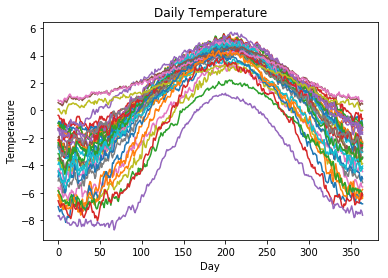

In [47]:
# Plot univariate data
fig, ax = plot(dailyTemp, main='Daily Temperature', xlab='Day', ylab='Temperature')
plt.show()

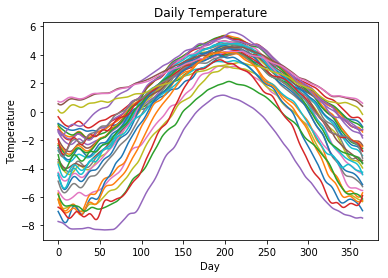

In [48]:
# Plot univariate smooth data
fig, ax = plot(dailyTempSmooth, main='Daily Temperature', xlab='Day', ylab='Temperature')
plt.show()

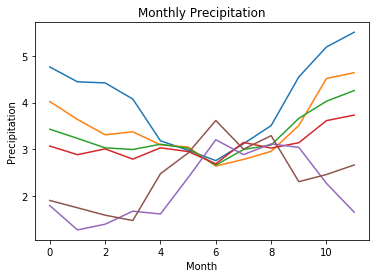

In [49]:
# Plot sample of univariate data
fig, ax = plot(monthlyPrec[2:8], main='Monthly Precipitation', xlab='Month', ylab='Precipitation')
plt.show()

### Tests

In [54]:
dailyTemp.mean(method='smooth', bandwith=5)

0 fait
1 fait
2 fait
3 fait
4 fait
5 fait
6 fait
7 fait
8 fait
9 fait
10 fait
11 fait
12 fait
13 fait
14 fait
15 fait
16 fait
17 fait
18 fait
19 fait
20 fait
21 fait
22 fait
23 fait
24 fait
25 fait
26 fait
27 fait
28 fait
29 fait
30 fait
31 fait
32 fait
33 fait
34 fait
35 fait
36 fait
37 fait
38 fait
39 fait
40 fait
41 fait
42 fait
43 fait
44 fait
45 fait
46 fait
47 fait
48 fait
49 fait
50 fait
51 fait
52 fait
53 fait
54 fait
55 fait
56 fait
57 fait
58 fait
59 fait
60 fait
61 fait
62 fait
63 fait
64 fait
65 fait
66 fait
67 fait
68 fait
69 fait
70 fait
71 fait
72 fait
73 fait
74 fait
75 fait
76 fait
77 fait
78 fait
79 fait
80 fait
81 fait
82 fait
83 fait
84 fait
85 fait
86 fait
87 fait
88 fait
89 fait
90 fait
91 fait
92 fait
93 fait
94 fait
95 fait
96 fait
97 fait
98 fait
99 fait
100 fait
101 fait
102 fait
103 fait
104 fait
105 fait
106 fait
107 fait
108 fait
109 fait
110 fait
111 fait
112 fait
113 fait
114 fait
115 fait
116 fait
117 fait
118 fait
119 fait
120 fait
121 fait
122 fait
123

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efeb5a86710>)

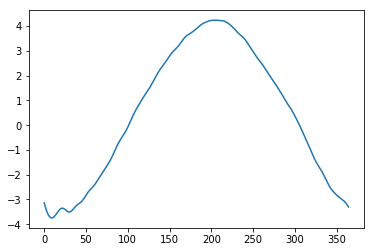

In [56]:
plot(dailyTemp.mean_)

In [58]:
dailyTemp.mean()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efeb5a34e80>)

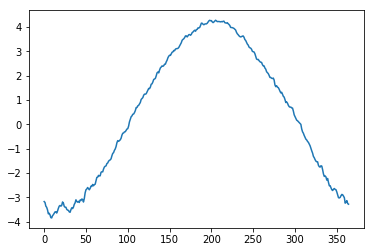

In [59]:
plot(dailyTemp.mean_)

In [54]:
# Perform a univariate FPCA on dailyTemp.
fpca = UFPCA(n_components=5, whiten=False)
fpca.fit(dailyTempSmooth)

NameError: name 'dailyTempSmooth' is not defined

In [ ]:
fpca.eigenvalues

In [ ]:
np.var(dailyTemp_proj, axis=0)

In [ ]:
res = []
for idx, eigenfunction in enumerate(fpca.eigenfunctions):
    res.append(fpca.eigenvalues[idx] * np.outer(eigenfunction, eigenfunction))
cova = np.sum(res, axis=0)

In [ ]:
fig, ax = plt.subplots()
a = plt.contour(cova)
ax.clabel(a, inline=1)
plt.show()

In [ ]:
plot(dailyTemp.covariance())

In [ ]:
# Plot the results of the FPCA
for idx, eigenfunction in enumerate(fpca.eigenfunctions):
    plt.plot(eigenfunction, label=' '.join(['Eigenfunction', str(idx+1)]))
plt.legend()
plt.show()

In [ ]:
dailyTemp_proj = fpca.transform(dailyTempSmooth)

In [ ]:
pd.plotting.scatter_matrix(pd.DataFrame(dailyTemp_proj), diagonal='kde')
plt.show()

In [ ]:
plt.scatter(dailyTemp_proj[:,1], dailyTemp_proj[:,2])

In [ ]:
proj = np.empty((35, 5))
proj_ = []
for idx2, b in enumerate(dailyTempSmooth.values):
    for idx, a in enumerate(fpca.eigenfunctions):
        proj_.append(scipy.integrate.trapz(dailyTempSmooth.argvals, dailyTempSmooth.values[idx2,] * fpca.eigenfunctions[idx,]))
    proj[idx2] = proj_
    proj_ = []

In [ ]:
pd.plotting.scatter_matrix(pd.DataFrame(proj), diagonal='kde')
plt.show()

In [ ]:
np.corrcoef(proj.T)